In [12]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install opencv-python-headless


Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D, Input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

In [15]:
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.0


In [16]:
# Define the model with the input shape
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False

#model.summary()


In [17]:
# Define the input layer
inputs = Input(shape=(224, 224, 3))

# Pass the inputs through the base model
x = model(inputs, training=False)

# Add a MaxPooling2D layer
x = GlobalMaxPooling2D()(x)

# Define the model
model = Model(inputs, x)

In [18]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_2               │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Current Working Directory: C:\Users\MANASWINI KARNATAKA\Desktop\FinalMini
Image Path: C:/Users/MANASWINI KARNATAKA/Desktop/data/Footwear/Women/Images/images_with_product_ids/11496.jpg


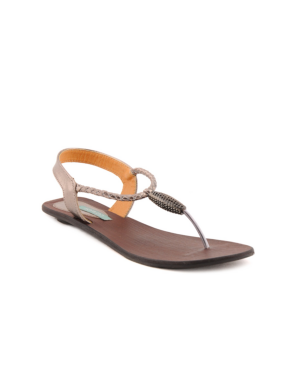

In [19]:
import cv2
import os
import matplotlib.pyplot as plt

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# Update the image path according to your current working directory
img_path = "C:/Users/MANASWINI KARNATAKA/Desktop/data/Footwear/Women/Images/images_with_product_ids/11496.jpg"
print("Image Path:", img_path)

# Load the image
img = cv2.imread(img_path)

if img is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert the image to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display the image using matplotlib
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()


In [20]:
import cv2
import numpy as np
from numpy.linalg import norm

In [21]:
#resizing the img
img_path = "C:/Users/MANASWINI KARNATAKA/Desktop/data/Footwear/Women/Images/images_with_product_ids/11496.jpg"
img = cv2.imread(img_path)

print("Before :",img.shape)
img=cv2.resize(img,(224,224))
#img=np.array(img)
print("After :",img.shape)

Before : (2400, 1800, 3)
After : (224, 224, 3)


In [22]:
#(no_of_img,224,224,3)
expand_img=np.expand_dims(img,axis=0)
expand_img.shape

(1, 224, 224, 3)

In [23]:
pre_img=preprocess_input(expand_img)
pre_img.shape

(1, 224, 224, 3)

In [24]:
pre_img

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [25]:
result = model.predict(pre_img).flatten()
print("shape:",result.shape)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
shape: (2048,)
[2.47897   0.        6.6309924 ... 6.1029053 1.147077  3.145158 ]


In [28]:
#normalization
normalized=result/norm(result)
print("shape:",normalized.shape)
print("normalized result:",normalized)

shape: (2048,)
normalized result: [0.00770904 0.         0.02062088 ... 0.01897865 0.00356715 0.00978073]


In [29]:
#preprocessing 
def extract_feature(img_path, model):
    try:
        img=cv2.imread(img_path)
        # Check if the image is loaded
        if img is None:
            print(f"Error: Unable to load image at {img_path}")
            return None
            
        img=cv2.resize(img,(224,224))
        img=np.array(img)
        expand_img=np.expand_dims(img,axis=0)
        pre_img=preprocess_input(expand_img)
        # Extract features using the model
        result=model.predict(pre_img).flatten()
        normalized=result/norm(result)
        normalized = np.squeeze(normalized)
        return normalized
    except Exception as e:
        print(f"Exception occurred for image {img_path}: {e}")
        return None
    

In [30]:
extract_feature('C:/Users/MANASWINI KARNATAKA/Desktop/data/Footwear/Women/Images/images_with_product_ids/11496.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([0.00770904, 0.        , 0.02062088, ..., 0.01897865, 0.00356715,
       0.00978073], dtype=float32)

In [31]:
import os
from tqdm import tqdm

In [32]:
filename = []



# Append paths from each directory
directories = [
    'C:/Users/MANASWINI KARNATAKA/Desktop/data/Apparel/Boys/Images/images_with_product_ids',
    'C:/Users/MANASWINI KARNATAKA/Desktop/data/Apparel/Girls/Images/images_with_product_ids',
    'C:/Users/MANASWINI KARNATAKA/Desktop/data/Footwear/Men/Images/images_with_product_ids',
    'C:/Users/MANASWINI KARNATAKA/Desktop/data/Footwear/Women/Images/images_with_product_ids'
]

for directory in directories:
    for file in os.listdir(directory):
        filename.append(os.path.join(directory, file))



In [33]:
import sys
# Check the memory usage of the filename list
memory_usage = sys.getsizeof(filename) / (1024 ** 2)  # Convert bytes to megabytes
print(f"Memory usage of filename list: {memory_usage:.2f} MB")

Memory usage of filename list: 0.02 MB


In [34]:
filename[0:5]
#len(filename)

['C:/Users/MANASWINI KARNATAKA/Desktop/data/Apparel/Boys/Images/images_with_product_ids\\10054.jpg',
 'C:/Users/MANASWINI KARNATAKA/Desktop/data/Apparel/Boys/Images/images_with_product_ids\\10649.jpg',
 'C:/Users/MANASWINI KARNATAKA/Desktop/data/Apparel/Boys/Images/images_with_product_ids\\10671.jpg',
 'C:/Users/MANASWINI KARNATAKA/Desktop/data/Apparel/Boys/Images/images_with_product_ids\\12840.jpg',
 'C:/Users/MANASWINI KARNATAKA/Desktop/data/Apparel/Boys/Images/images_with_product_ids\\12844.jpg']

In [35]:
# Initialize feature_list
feature_list = []

# Process each file
for file in tqdm(filename):
    feature = extract_feature(file, model)
    if feature is not None:
        feature_list.append(feature)


  0%|                                                                                         | 0/2906 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  0%|                                                                                 | 1/2906 [00:00<09:09,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  0%|                                                                                 | 2/2906 [00:00<08:06,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  0%|                                                                                 | 3/2906 [00:00<08:39,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  0%|                                                                                 | 4/2906 [00:00<08:02,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  0%|▏                                                                                | 5/2906 [00:00<07:52,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  0%|▏                                                                                | 6/2906 [00:01<08:07,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  0%|▏                                                                                | 7/2906 [00:01<08:22,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  0%|▏                                                                                | 8/2906 [00:01<08:32,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  0%|▎                                                                                | 9/2906 [00:01<08:35,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  0%|▎                                                                               | 10/2906 [00:01<08:18,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  0%|▎                                                                               | 11/2906 [00:01<08:16,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  0%|▎                                                                               | 12/2906 [00:02<08:18,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  0%|▎                                                                               | 13/2906 [00:02<08:14,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  0%|▍                                                                               | 14/2906 [00:02<08:14,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  1%|▍                                                                               | 15/2906 [00:02<08:17,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  1%|▍                                                                               | 16/2906 [00:02<08:24,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  1%|▍                                                                               | 17/2906 [00:02<08:02,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  1%|▍                                                                               | 18/2906 [00:03<08:09,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  1%|▌                                                                               | 19/2906 [00:03<08:13,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  1%|▌                                                                               | 20/2906 [00:03<08:19,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  1%|▌                                                                               | 21/2906 [00:03<08:17,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  1%|▌                                                                               | 22/2906 [00:03<08:15,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  1%|▋                                                                               | 23/2906 [00:03<08:10,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  1%|▋                                                                               | 24/2906 [00:04<08:08,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  1%|▋                                                                               | 25/2906 [00:04<08:12,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  1%|▋                                                                               | 26/2906 [00:04<08:27,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  1%|▋                                                                               | 27/2906 [00:04<08:30,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  1%|▊                                                                               | 28/2906 [00:04<08:25,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  1%|▊                                                                               | 29/2906 [00:05<08:20,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  1%|▊                                                                               | 30/2906 [00:05<08:09,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  1%|▊                                                                               | 31/2906 [00:05<08:12,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  1%|▉                                                                               | 32/2906 [00:05<08:18,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  1%|▉                                                                               | 33/2906 [00:05<07:49,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  1%|▉                                                                               | 34/2906 [00:05<08:04,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  1%|▉                                                                               | 35/2906 [00:06<08:10,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  1%|▉                                                                               | 36/2906 [00:06<08:10,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  1%|█                                                                               | 37/2906 [00:06<08:08,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


  1%|█                                                                               | 38/2906 [00:06<08:06,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  1%|█                                                                               | 39/2906 [00:06<07:41,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  1%|█                                                                               | 40/2906 [00:06<07:17,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  1%|█▏                                                                              | 41/2906 [00:06<06:56,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  1%|█▏                                                                              | 42/2906 [00:07<07:18,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  1%|█▏                                                                              | 43/2906 [00:07<07:04,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  2%|█▏                                                                              | 44/2906 [00:07<07:18,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  2%|█▏                                                                              | 45/2906 [00:07<07:33,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  2%|█▎                                                                              | 46/2906 [00:07<07:40,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  2%|█▎                                                                              | 47/2906 [00:07<07:55,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  2%|█▎                                                                              | 48/2906 [00:08<07:52,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  2%|█▎                                                                              | 49/2906 [00:08<07:56,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  2%|█▍                                                                              | 50/2906 [00:08<07:54,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  2%|█▍                                                                              | 51/2906 [00:08<08:06,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  2%|█▍                                                                              | 52/2906 [00:08<07:56,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  2%|█▍                                                                              | 53/2906 [00:08<08:00,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  2%|█▍                                                                              | 54/2906 [00:09<08:05,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  2%|█▌                                                                              | 55/2906 [00:09<08:02,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  2%|█▌                                                                              | 56/2906 [00:09<07:51,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  2%|█▌                                                                              | 57/2906 [00:09<07:56,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  2%|█▌                                                                              | 58/2906 [00:09<08:05,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  2%|█▌                                                                              | 59/2906 [00:09<08:01,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  2%|█▋                                                                              | 60/2906 [00:10<08:01,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  2%|█▋                                                                              | 61/2906 [00:10<08:03,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  2%|█▋                                                                              | 62/2906 [00:10<07:35,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  2%|█▋                                                                              | 63/2906 [00:10<07:49,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  2%|█▊                                                                              | 64/2906 [00:10<07:42,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  2%|█▊                                                                              | 65/2906 [00:10<07:43,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  2%|█▊                                                                              | 66/2906 [00:11<07:15,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  2%|█▊                                                                              | 67/2906 [00:11<06:48,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  2%|█▊                                                                              | 68/2906 [00:11<06:25,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  2%|█▉                                                                              | 69/2906 [00:11<06:09,  7.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  2%|█▉                                                                              | 70/2906 [00:11<06:05,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  2%|█▉                                                                              | 71/2906 [00:11<05:55,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  2%|█▉                                                                              | 72/2906 [00:11<05:54,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  3%|██                                                                              | 73/2906 [00:11<05:58,  7.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  3%|██                                                                              | 74/2906 [00:12<06:06,  7.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  3%|██                                                                              | 75/2906 [00:12<05:59,  7.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  3%|██                                                                              | 76/2906 [00:12<05:57,  7.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  3%|██                                                                              | 77/2906 [00:12<05:54,  7.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  3%|██▏                                                                             | 78/2906 [00:12<06:26,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  3%|██▏                                                                             | 79/2906 [00:12<06:54,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  3%|██▏                                                                             | 80/2906 [00:12<07:14,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  3%|██▏                                                                             | 81/2906 [00:13<07:11,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  3%|██▎                                                                             | 82/2906 [00:13<07:11,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  3%|██▎                                                                             | 83/2906 [00:13<07:19,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  3%|██▎                                                                             | 84/2906 [00:13<07:30,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  3%|██▎                                                                             | 85/2906 [00:13<07:19,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  3%|██▎                                                                             | 86/2906 [00:13<07:22,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  3%|██▍                                                                             | 87/2906 [00:14<07:34,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  3%|██▍                                                                             | 88/2906 [00:14<07:51,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  3%|██▍                                                                             | 89/2906 [00:14<07:56,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  3%|██▍                                                                             | 90/2906 [00:14<07:41,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  3%|██▌                                                                             | 91/2906 [00:14<07:48,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  3%|██▌                                                                             | 92/2906 [00:14<07:31,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  3%|██▌                                                                             | 93/2906 [00:15<07:39,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


  3%|██▌                                                                             | 94/2906 [00:15<07:40,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  3%|██▌                                                                             | 95/2906 [00:15<07:10,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  3%|██▋                                                                             | 96/2906 [00:15<07:20,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  3%|██▋                                                                             | 97/2906 [00:15<07:00,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  3%|██▋                                                                             | 98/2906 [00:15<06:50,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  3%|██▋                                                                             | 99/2906 [00:15<06:40,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  3%|██▋                                                                            | 100/2906 [00:16<06:26,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  3%|██▋                                                                            | 101/2906 [00:16<06:21,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|██▊                                                                            | 102/2906 [00:16<06:18,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|██▊                                                                            | 103/2906 [00:16<06:20,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|██▊                                                                            | 104/2906 [00:16<06:16,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|██▊                                                                            | 105/2906 [00:16<06:17,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  4%|██▉                                                                            | 106/2906 [00:16<06:35,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  4%|██▉                                                                            | 107/2906 [00:16<06:20,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  4%|██▉                                                                            | 108/2906 [00:17<06:44,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|██▉                                                                            | 109/2906 [00:17<07:00,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|██▉                                                                            | 110/2906 [00:17<06:45,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|███                                                                            | 111/2906 [00:17<06:57,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|███                                                                            | 112/2906 [00:17<07:08,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  4%|███                                                                            | 113/2906 [00:17<06:44,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|███                                                                            | 114/2906 [00:18<06:51,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  4%|███▏                                                                           | 115/2906 [00:18<07:07,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  4%|███▏                                                                           | 116/2906 [00:18<06:55,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|███▏                                                                           | 117/2906 [00:18<07:06,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  4%|███▏                                                                           | 118/2906 [00:18<06:59,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  4%|███▏                                                                           | 119/2906 [00:18<06:46,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  4%|███▎                                                                           | 120/2906 [00:18<06:39,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  4%|███▎                                                                           | 121/2906 [00:19<06:32,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  4%|███▎                                                                           | 122/2906 [00:19<06:47,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  4%|███▎                                                                           | 123/2906 [00:19<06:38,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  4%|███▎                                                                           | 124/2906 [00:19<06:30,  7.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  4%|███▍                                                                           | 125/2906 [00:19<06:51,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|███▍                                                                           | 126/2906 [00:19<06:38,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  4%|███▍                                                                           | 127/2906 [00:19<06:27,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  4%|███▍                                                                           | 128/2906 [00:20<06:16,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  4%|███▌                                                                           | 129/2906 [00:20<06:13,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  4%|███▌                                                                           | 130/2906 [00:20<06:26,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|███▌                                                                           | 131/2906 [00:20<06:22,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|███▌                                                                           | 132/2906 [00:20<06:19,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  5%|███▌                                                                           | 133/2906 [00:20<06:12,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|███▋                                                                           | 134/2906 [00:20<06:36,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|███▋                                                                           | 135/2906 [00:20<06:22,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|███▋                                                                           | 136/2906 [00:21<06:20,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|███▋                                                                           | 137/2906 [00:21<06:13,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|███▊                                                                           | 138/2906 [00:21<06:18,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  5%|███▊                                                                           | 139/2906 [00:21<06:07,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  5%|███▊                                                                           | 140/2906 [00:21<06:06,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  5%|███▊                                                                           | 141/2906 [00:21<05:55,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  5%|███▊                                                                           | 142/2906 [00:21<05:55,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|███▉                                                                           | 143/2906 [00:22<06:10,  7.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|███▉                                                                           | 144/2906 [00:22<06:30,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|███▉                                                                           | 145/2906 [00:22<06:45,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|███▉                                                                           | 146/2906 [00:22<06:55,  6.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|███▉                                                                           | 147/2906 [00:22<07:09,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  5%|████                                                                           | 148/2906 [00:22<07:11,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|████                                                                           | 149/2906 [00:22<07:00,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  5%|████                                                                           | 150/2906 [00:23<06:58,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  5%|████                                                                           | 151/2906 [00:23<06:57,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|████▏                                                                          | 152/2906 [00:23<06:38,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  5%|████▏                                                                          | 153/2906 [00:23<06:24,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|████▏                                                                          | 154/2906 [00:23<06:31,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  5%|████▏                                                                          | 155/2906 [00:23<06:45,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|████▏                                                                          | 156/2906 [00:24<06:57,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  5%|████▎                                                                          | 157/2906 [00:24<06:59,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  5%|████▎                                                                          | 158/2906 [00:24<07:06,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  5%|████▎                                                                          | 159/2906 [00:24<07:16,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|████▎                                                                          | 160/2906 [00:24<07:17,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|████▍                                                                          | 161/2906 [00:24<07:21,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  6%|████▍                                                                          | 162/2906 [00:24<07:04,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|████▍                                                                          | 163/2906 [00:25<07:08,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|████▍                                                                          | 164/2906 [00:25<07:01,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|████▍                                                                          | 165/2906 [00:25<06:43,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|████▌                                                                          | 166/2906 [00:25<07:13,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|████▌                                                                          | 167/2906 [00:25<07:26,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|████▌                                                                          | 168/2906 [00:25<07:45,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  6%|████▌                                                                          | 169/2906 [00:26<08:06,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  6%|████▌                                                                          | 170/2906 [00:26<08:20,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  6%|████▋                                                                          | 171/2906 [00:26<07:56,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|████▋                                                                          | 172/2906 [00:26<07:53,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  6%|████▋                                                                          | 173/2906 [00:26<07:42,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  6%|████▋                                                                          | 174/2906 [00:26<07:27,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  6%|████▊                                                                          | 175/2906 [00:27<07:03,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  6%|████▊                                                                          | 176/2906 [00:27<07:02,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|████▊                                                                          | 177/2906 [00:27<07:03,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|████▊                                                                          | 178/2906 [00:27<06:46,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  6%|████▊                                                                          | 179/2906 [00:27<06:53,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|████▉                                                                          | 180/2906 [00:27<07:06,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  6%|████▉                                                                          | 181/2906 [00:28<07:19,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  6%|████▉                                                                          | 182/2906 [00:28<07:14,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  6%|████▉                                                                          | 183/2906 [00:28<06:56,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  6%|█████                                                                          | 184/2906 [00:28<06:43,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  6%|█████                                                                          | 185/2906 [00:28<06:26,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  6%|█████                                                                          | 186/2906 [00:28<06:24,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  6%|█████                                                                          | 187/2906 [00:28<06:10,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  6%|█████                                                                          | 188/2906 [00:28<05:55,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|█████▏                                                                         | 189/2906 [00:29<05:57,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|█████▏                                                                         | 190/2906 [00:29<05:56,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  7%|█████▏                                                                         | 191/2906 [00:29<05:57,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|█████▏                                                                         | 192/2906 [00:29<06:00,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


  7%|█████▏                                                                         | 193/2906 [00:29<06:27,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|█████▎                                                                         | 194/2906 [00:29<06:19,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  7%|█████▎                                                                         | 195/2906 [00:29<06:24,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|█████▎                                                                         | 196/2906 [00:30<06:22,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  7%|█████▎                                                                         | 197/2906 [00:30<06:14,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  7%|█████▍                                                                         | 198/2906 [00:30<06:11,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|█████▍                                                                         | 199/2906 [00:30<06:16,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|█████▍                                                                         | 200/2906 [00:30<06:12,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  7%|█████▍                                                                         | 201/2906 [00:30<06:03,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|█████▍                                                                         | 202/2906 [00:30<06:04,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  7%|█████▌                                                                         | 203/2906 [00:31<05:55,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|█████▌                                                                         | 204/2906 [00:31<06:10,  7.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


  7%|█████▌                                                                         | 205/2906 [00:31<06:14,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  7%|█████▌                                                                         | 206/2906 [00:31<06:08,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  7%|█████▋                                                                         | 207/2906 [00:31<06:06,  7.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|█████▋                                                                         | 208/2906 [00:31<05:57,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  7%|█████▋                                                                         | 209/2906 [00:31<05:51,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  7%|█████▋                                                                         | 210/2906 [00:31<05:46,  7.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  7%|█████▋                                                                         | 211/2906 [00:32<05:50,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  7%|█████▊                                                                         | 212/2906 [00:32<05:53,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  7%|█████▊                                                                         | 213/2906 [00:32<05:52,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  7%|█████▊                                                                         | 214/2906 [00:32<06:18,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  7%|█████▊                                                                         | 215/2906 [00:32<06:11,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  7%|█████▊                                                                         | 216/2906 [00:32<06:09,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  7%|█████▉                                                                         | 217/2906 [00:32<06:29,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|█████▉                                                                         | 218/2906 [00:33<06:47,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  8%|█████▉                                                                         | 219/2906 [00:33<06:43,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


  8%|█████▉                                                                         | 220/2906 [00:33<06:40,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


  8%|██████                                                                         | 221/2906 [00:33<06:45,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|██████                                                                         | 222/2906 [00:33<07:04,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|██████                                                                         | 223/2906 [00:33<07:04,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|██████                                                                         | 224/2906 [00:34<06:51,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|██████                                                                         | 225/2906 [00:34<06:47,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|██████▏                                                                        | 226/2906 [00:34<06:50,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


  8%|██████▏                                                                        | 227/2906 [00:34<06:28,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|██████▏                                                                        | 228/2906 [00:34<06:15,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  8%|██████▏                                                                        | 229/2906 [00:34<06:04,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  8%|██████▎                                                                        | 230/2906 [00:34<06:06,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|██████▎                                                                        | 231/2906 [00:35<06:09,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


  8%|██████▎                                                                        | 232/2906 [00:35<05:59,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


  8%|██████▎                                                                        | 233/2906 [00:35<06:04,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|██████▎                                                                        | 234/2906 [00:35<05:59,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


  8%|██████▍                                                                        | 235/2906 [00:35<06:40,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|██████▍                                                                        | 236/2906 [00:35<06:49,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  8%|██████▍                                                                        | 237/2906 [00:35<06:37,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|██████▍                                                                        | 238/2906 [00:36<06:25,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


  8%|██████▍                                                                        | 239/2906 [00:36<06:23,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|██████▌                                                                        | 240/2906 [00:36<06:22,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|██████▌                                                                        | 241/2906 [00:36<06:12,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  8%|██████▌                                                                        | 242/2906 [00:36<06:09,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|██████▌                                                                        | 243/2906 [00:36<06:31,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  8%|██████▋                                                                        | 244/2906 [00:36<06:25,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  8%|██████▋                                                                        | 245/2906 [00:37<06:13,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  8%|██████▋                                                                        | 246/2906 [00:37<06:31,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  8%|██████▋                                                                        | 247/2906 [00:37<06:19,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|██████▋                                                                        | 248/2906 [00:37<06:09,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  9%|██████▊                                                                        | 249/2906 [00:37<06:26,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|██████▊                                                                        | 250/2906 [00:37<06:39,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|██████▊                                                                        | 251/2906 [00:37<06:36,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|██████▊                                                                        | 252/2906 [00:38<06:56,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|██████▉                                                                        | 253/2906 [00:38<07:00,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|██████▉                                                                        | 254/2906 [00:38<06:58,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|██████▉                                                                        | 255/2906 [00:38<06:58,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  9%|██████▉                                                                        | 256/2906 [00:38<06:43,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


  9%|██████▉                                                                        | 257/2906 [00:38<06:36,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


  9%|███████                                                                        | 258/2906 [00:39<06:43,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|███████                                                                        | 259/2906 [00:39<06:49,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|███████                                                                        | 260/2906 [00:39<06:49,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|███████                                                                        | 261/2906 [00:39<06:51,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|███████                                                                        | 262/2906 [00:39<06:54,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


  9%|███████▏                                                                       | 263/2906 [00:39<06:54,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


  9%|███████▏                                                                       | 264/2906 [00:39<06:58,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


  9%|███████▏                                                                       | 265/2906 [00:40<07:01,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  9%|███████▏                                                                       | 266/2906 [00:40<06:56,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|███████▎                                                                       | 267/2906 [00:40<07:02,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


  9%|███████▎                                                                       | 268/2906 [00:40<06:55,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


  9%|███████▎                                                                       | 269/2906 [00:40<06:57,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


  9%|███████▎                                                                       | 270/2906 [00:40<07:00,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


  9%|███████▎                                                                       | 271/2906 [00:41<07:16,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  9%|███████▍                                                                       | 272/2906 [00:41<07:11,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


  9%|███████▍                                                                       | 273/2906 [00:41<07:05,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


  9%|███████▍                                                                       | 274/2906 [00:41<07:02,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


  9%|███████▍                                                                       | 275/2906 [00:41<07:06,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


  9%|███████▌                                                                       | 276/2906 [00:41<07:06,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 10%|███████▌                                                                       | 277/2906 [00:42<06:38,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 10%|███████▌                                                                       | 278/2906 [00:42<06:49,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 10%|███████▌                                                                       | 279/2906 [00:42<06:57,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|███████▌                                                                       | 280/2906 [00:42<06:58,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|███████▋                                                                       | 281/2906 [00:42<06:59,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|███████▋                                                                       | 282/2906 [00:42<06:56,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|███████▋                                                                       | 283/2906 [00:42<06:46,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|███████▋                                                                       | 284/2906 [00:43<07:00,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|███████▋                                                                       | 285/2906 [00:43<06:52,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 10%|███████▊                                                                       | 286/2906 [00:43<06:44,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|███████▊                                                                       | 287/2906 [00:43<06:45,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|███████▊                                                                       | 288/2906 [00:43<06:41,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|███████▊                                                                       | 289/2906 [00:43<06:39,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|███████▉                                                                       | 290/2906 [00:44<06:37,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|███████▉                                                                       | 291/2906 [00:44<06:40,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 10%|███████▉                                                                       | 292/2906 [00:44<06:47,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|███████▉                                                                       | 293/2906 [00:44<06:52,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|███████▉                                                                       | 294/2906 [00:44<06:55,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|████████                                                                       | 295/2906 [00:44<06:52,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 10%|████████                                                                       | 296/2906 [00:45<06:55,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 10%|████████                                                                       | 297/2906 [00:45<06:56,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|████████                                                                       | 298/2906 [00:45<07:00,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|████████▏                                                                      | 299/2906 [00:45<06:53,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 10%|████████▏                                                                      | 300/2906 [00:45<07:01,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 10%|████████▏                                                                      | 301/2906 [00:45<06:57,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 10%|████████▏                                                                      | 302/2906 [00:45<07:03,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 10%|████████▏                                                                      | 303/2906 [00:46<06:58,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 10%|████████▎                                                                      | 304/2906 [00:46<07:00,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 10%|████████▎                                                                      | 305/2906 [00:46<06:59,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|████████▎                                                                      | 306/2906 [00:46<06:58,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|████████▎                                                                      | 307/2906 [00:46<06:39,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|████████▎                                                                      | 308/2906 [00:46<06:45,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 11%|████████▍                                                                      | 309/2906 [00:47<06:50,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|████████▍                                                                      | 310/2906 [00:47<06:45,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|████████▍                                                                      | 311/2906 [00:47<06:42,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 11%|████████▍                                                                      | 312/2906 [00:47<06:49,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|████████▌                                                                      | 313/2906 [00:47<06:39,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|████████▌                                                                      | 314/2906 [00:47<06:43,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|████████▌                                                                      | 315/2906 [00:48<06:49,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 11%|████████▌                                                                      | 316/2906 [00:48<06:47,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|████████▌                                                                      | 317/2906 [00:48<06:51,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 11%|████████▋                                                                      | 318/2906 [00:48<06:45,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|████████▋                                                                      | 319/2906 [00:48<06:48,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|████████▋                                                                      | 320/2906 [00:48<06:48,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 11%|████████▋                                                                      | 321/2906 [00:48<06:43,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|████████▊                                                                      | 322/2906 [00:49<06:47,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 11%|████████▊                                                                      | 323/2906 [00:49<06:46,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|████████▊                                                                      | 324/2906 [00:49<06:46,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 11%|████████▊                                                                      | 325/2906 [00:49<06:52,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 11%|████████▊                                                                      | 326/2906 [00:49<06:46,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|████████▉                                                                      | 327/2906 [00:49<06:47,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 11%|████████▉                                                                      | 328/2906 [00:50<06:39,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 11%|████████▉                                                                      | 329/2906 [00:50<06:45,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|████████▉                                                                      | 330/2906 [00:50<06:48,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 11%|████████▉                                                                      | 331/2906 [00:50<06:47,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 11%|█████████                                                                      | 332/2906 [00:50<06:42,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 11%|█████████                                                                      | 333/2906 [00:50<06:53,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 11%|█████████                                                                      | 334/2906 [00:51<06:48,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█████████                                                                      | 335/2906 [00:51<06:47,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█████████▏                                                                     | 336/2906 [00:51<06:48,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█████████▏                                                                     | 337/2906 [00:51<06:45,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█████████▏                                                                     | 338/2906 [00:51<06:48,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 12%|█████████▏                                                                     | 339/2906 [00:51<06:45,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█████████▏                                                                     | 340/2906 [00:51<06:48,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█████████▎                                                                     | 341/2906 [00:52<06:48,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█████████▎                                                                     | 342/2906 [00:52<06:46,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 12%|█████████▎                                                                     | 343/2906 [00:52<06:53,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█████████▎                                                                     | 344/2906 [00:52<06:41,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 12%|█████████▍                                                                     | 345/2906 [00:52<06:46,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█████████▍                                                                     | 346/2906 [00:52<06:45,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 12%|█████████▍                                                                     | 347/2906 [00:53<06:46,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█████████▍                                                                     | 348/2906 [00:53<06:39,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 12%|█████████▍                                                                     | 349/2906 [00:53<06:34,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 12%|█████████▌                                                                     | 350/2906 [00:53<06:35,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█████████▌                                                                     | 351/2906 [00:53<06:42,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 12%|█████████▌                                                                     | 352/2906 [00:53<06:43,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█████████▌                                                                     | 353/2906 [00:54<06:28,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 12%|█████████▌                                                                     | 354/2906 [00:54<06:19,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 12%|█████████▋                                                                     | 355/2906 [00:54<06:08,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 12%|█████████▋                                                                     | 356/2906 [00:54<05:56,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 12%|█████████▋                                                                     | 357/2906 [00:54<05:51,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█████████▋                                                                     | 358/2906 [00:54<05:47,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 12%|█████████▊                                                                     | 359/2906 [00:54<05:45,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 12%|█████████▊                                                                     | 360/2906 [00:54<05:39,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█████████▊                                                                     | 361/2906 [00:55<05:38,  7.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 12%|█████████▊                                                                     | 362/2906 [00:55<05:36,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 12%|█████████▊                                                                     | 363/2906 [00:55<05:32,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|█████████▉                                                                     | 364/2906 [00:55<05:34,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 13%|█████████▉                                                                     | 365/2906 [00:55<05:51,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|█████████▉                                                                     | 366/2906 [00:55<06:02,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|█████████▉                                                                     | 367/2906 [00:55<06:00,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 13%|██████████                                                                     | 368/2906 [00:56<05:53,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 13%|██████████                                                                     | 369/2906 [00:56<05:57,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|██████████                                                                     | 370/2906 [00:56<06:05,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 13%|██████████                                                                     | 371/2906 [00:56<06:02,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|██████████                                                                     | 372/2906 [00:56<05:54,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|██████████▏                                                                    | 373/2906 [00:56<05:48,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 13%|██████████▏                                                                    | 374/2906 [00:56<05:56,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 13%|██████████▏                                                                    | 375/2906 [00:57<05:58,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|██████████▏                                                                    | 376/2906 [00:57<05:50,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 13%|██████████▏                                                                    | 377/2906 [00:57<05:45,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|██████████▎                                                                    | 378/2906 [00:57<05:42,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|██████████▎                                                                    | 379/2906 [00:57<05:41,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|██████████▎                                                                    | 380/2906 [00:57<05:47,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 13%|██████████▎                                                                    | 381/2906 [00:57<05:45,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 13%|██████████▍                                                                    | 382/2906 [00:57<05:50,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|██████████▍                                                                    | 383/2906 [00:58<05:49,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 13%|██████████▍                                                                    | 384/2906 [00:58<05:48,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 13%|██████████▍                                                                    | 385/2906 [00:58<05:56,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 13%|██████████▍                                                                    | 386/2906 [00:58<05:52,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 13%|██████████▌                                                                    | 387/2906 [00:58<06:07,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 13%|██████████▌                                                                    | 388/2906 [00:58<06:13,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 13%|██████████▌                                                                    | 389/2906 [00:58<05:56,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|██████████▌                                                                    | 390/2906 [00:59<05:48,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 13%|██████████▋                                                                    | 391/2906 [00:59<05:41,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 13%|██████████▋                                                                    | 392/2906 [00:59<05:47,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|██████████▋                                                                    | 393/2906 [00:59<05:45,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|██████████▋                                                                    | 394/2906 [00:59<05:39,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 14%|██████████▋                                                                    | 395/2906 [00:59<05:45,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|██████████▊                                                                    | 396/2906 [00:59<05:45,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|██████████▊                                                                    | 397/2906 [01:00<05:39,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 14%|██████████▊                                                                    | 398/2906 [01:00<05:37,  7.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 14%|██████████▊                                                                    | 399/2906 [01:00<05:40,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|██████████▊                                                                    | 400/2906 [01:00<05:34,  7.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|██████████▉                                                                    | 401/2906 [01:00<05:55,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 14%|██████████▉                                                                    | 402/2906 [01:00<05:52,  7.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|██████████▉                                                                    | 403/2906 [01:00<06:00,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 14%|██████████▉                                                                    | 404/2906 [01:01<06:14,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 14%|███████████                                                                    | 405/2906 [01:01<06:05,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 14%|███████████                                                                    | 406/2906 [01:01<06:13,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|███████████                                                                    | 407/2906 [01:01<06:23,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|███████████                                                                    | 408/2906 [01:01<06:30,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 14%|███████████                                                                    | 409/2906 [01:01<06:46,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|███████████▏                                                                   | 410/2906 [01:02<06:42,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 14%|███████████▏                                                                   | 411/2906 [01:02<06:38,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 14%|███████████▏                                                                   | 412/2906 [01:02<06:39,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|███████████▏                                                                   | 413/2906 [01:02<06:40,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|███████████▎                                                                   | 414/2906 [01:02<06:40,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 14%|███████████▎                                                                   | 415/2906 [01:02<06:40,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|███████████▎                                                                   | 416/2906 [01:03<06:41,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 14%|███████████▎                                                                   | 417/2906 [01:03<06:18,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|███████████▎                                                                   | 418/2906 [01:03<06:22,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 14%|███████████▍                                                                   | 419/2906 [01:03<06:25,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 14%|███████████▍                                                                   | 420/2906 [01:03<06:28,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 14%|███████████▍                                                                   | 421/2906 [01:03<06:09,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|███████████▍                                                                   | 422/2906 [01:03<06:19,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|███████████▍                                                                   | 423/2906 [01:04<06:28,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|███████████▌                                                                   | 424/2906 [01:04<06:30,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|███████████▌                                                                   | 425/2906 [01:04<06:34,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|███████████▌                                                                   | 426/2906 [01:04<06:39,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 15%|███████████▌                                                                   | 427/2906 [01:04<06:37,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|███████████▋                                                                   | 428/2906 [01:04<06:40,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 15%|███████████▋                                                                   | 429/2906 [01:05<06:51,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|███████████▋                                                                   | 430/2906 [01:05<06:34,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 15%|███████████▋                                                                   | 431/2906 [01:05<06:32,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|███████████▋                                                                   | 432/2906 [01:05<06:17,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|███████████▊                                                                   | 433/2906 [01:05<06:25,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|███████████▊                                                                   | 434/2906 [01:05<06:25,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 15%|███████████▊                                                                   | 435/2906 [01:05<06:27,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 15%|███████████▊                                                                   | 436/2906 [01:06<06:19,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 15%|███████████▉                                                                   | 437/2906 [01:06<06:13,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 15%|███████████▉                                                                   | 438/2906 [01:06<06:15,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 15%|███████████▉                                                                   | 439/2906 [01:06<06:21,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 15%|███████████▉                                                                   | 440/2906 [01:06<06:19,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 15%|███████████▉                                                                   | 441/2906 [01:06<06:22,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|████████████                                                                   | 442/2906 [01:07<06:19,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 15%|████████████                                                                   | 443/2906 [01:07<06:28,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|████████████                                                                   | 444/2906 [01:07<06:29,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|████████████                                                                   | 445/2906 [01:07<06:27,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 15%|████████████                                                                   | 446/2906 [01:07<06:34,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|████████████▏                                                                  | 447/2906 [01:07<06:27,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 15%|████████████▏                                                                  | 448/2906 [01:08<06:28,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 15%|████████████▏                                                                  | 449/2906 [01:08<06:27,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 15%|████████████▏                                                                  | 450/2906 [01:08<06:21,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|████████████▎                                                                  | 451/2906 [01:08<06:32,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 16%|████████████▎                                                                  | 452/2906 [01:08<06:36,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 16%|████████████▎                                                                  | 453/2906 [01:08<06:40,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 16%|████████████▎                                                                  | 454/2906 [01:08<06:43,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 16%|████████████▎                                                                  | 455/2906 [01:09<06:35,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|████████████▍                                                                  | 456/2906 [01:09<06:27,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 16%|████████████▍                                                                  | 457/2906 [01:09<06:34,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 16%|████████████▍                                                                  | 458/2906 [01:09<06:28,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|████████████▍                                                                  | 459/2906 [01:09<06:32,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|████████████▌                                                                  | 460/2906 [01:09<06:34,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 16%|████████████▌                                                                  | 461/2906 [01:10<06:32,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|████████████▌                                                                  | 462/2906 [01:10<06:45,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 16%|████████████▌                                                                  | 463/2906 [01:10<06:43,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 16%|████████████▌                                                                  | 464/2906 [01:10<06:39,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|████████████▋                                                                  | 465/2906 [01:10<06:25,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 16%|████████████▋                                                                  | 466/2906 [01:10<06:23,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|████████████▋                                                                  | 467/2906 [01:11<06:22,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|████████████▋                                                                  | 468/2906 [01:11<06:16,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 16%|████████████▋                                                                  | 469/2906 [01:11<06:18,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|████████████▊                                                                  | 470/2906 [01:11<06:14,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 16%|████████████▊                                                                  | 471/2906 [01:11<06:07,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|████████████▊                                                                  | 472/2906 [01:11<06:13,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|████████████▊                                                                  | 473/2906 [01:11<06:08,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 16%|████████████▉                                                                  | 474/2906 [01:12<06:11,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 16%|████████████▉                                                                  | 475/2906 [01:12<06:18,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 16%|████████████▉                                                                  | 476/2906 [01:12<06:21,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 16%|████████████▉                                                                  | 477/2906 [01:12<06:14,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 16%|████████████▉                                                                  | 478/2906 [01:12<06:13,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 16%|█████████████                                                                  | 479/2906 [01:12<06:24,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 17%|█████████████                                                                  | 480/2906 [01:13<06:20,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 17%|█████████████                                                                  | 481/2906 [01:13<06:33,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 17%|█████████████                                                                  | 482/2906 [01:13<06:30,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 17%|█████████████▏                                                                 | 483/2906 [01:13<06:43,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 17%|█████████████▏                                                                 | 484/2906 [01:13<06:41,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 17%|█████████████▏                                                                 | 485/2906 [01:13<06:41,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 17%|█████████████▏                                                                 | 486/2906 [01:14<06:47,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█████████████▏                                                                 | 487/2906 [01:14<06:49,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█████████████▎                                                                 | 488/2906 [01:14<06:55,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█████████████▎                                                                 | 489/2906 [01:14<07:05,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 17%|█████████████▎                                                                 | 490/2906 [01:14<07:06,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█████████████▎                                                                 | 491/2906 [01:14<07:04,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 17%|█████████████▍                                                                 | 492/2906 [01:15<07:00,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█████████████▍                                                                 | 493/2906 [01:15<06:55,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█████████████▍                                                                 | 494/2906 [01:15<07:12,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█████████████▍                                                                 | 495/2906 [01:15<07:12,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 17%|█████████████▍                                                                 | 496/2906 [01:16<09:56,  4.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 17%|█████████████▌                                                                 | 497/2906 [01:16<09:22,  4.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 17%|█████████████▌                                                                 | 498/2906 [01:16<08:53,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█████████████▌                                                                 | 499/2906 [01:16<08:30,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 17%|█████████████▌                                                                 | 500/2906 [01:16<08:10,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 17%|█████████████▌                                                                 | 501/2906 [01:17<07:58,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 17%|█████████████▋                                                                 | 502/2906 [01:17<07:40,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 17%|█████████████▋                                                                 | 503/2906 [01:17<07:32,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 17%|█████████████▋                                                                 | 504/2906 [01:17<07:31,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█████████████▋                                                                 | 505/2906 [01:17<07:08,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 17%|█████████████▊                                                                 | 506/2906 [01:17<06:50,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 17%|█████████████▊                                                                 | 507/2906 [01:18<06:50,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 17%|█████████████▊                                                                 | 508/2906 [01:18<06:53,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|█████████████▊                                                                 | 509/2906 [01:18<06:54,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|█████████████▊                                                                 | 510/2906 [01:18<06:57,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 18%|█████████████▉                                                                 | 511/2906 [01:18<07:09,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 18%|█████████████▉                                                                 | 512/2906 [01:18<07:11,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 18%|█████████████▉                                                                 | 513/2906 [01:19<07:09,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|█████████████▉                                                                 | 514/2906 [01:19<07:10,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|██████████████                                                                 | 515/2906 [01:19<07:12,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|██████████████                                                                 | 516/2906 [01:19<07:01,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 18%|██████████████                                                                 | 517/2906 [01:19<06:56,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|██████████████                                                                 | 518/2906 [01:20<06:58,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|██████████████                                                                 | 519/2906 [01:20<07:13,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|██████████████▏                                                                | 520/2906 [01:20<07:13,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|██████████████▏                                                                | 521/2906 [01:20<07:17,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 18%|██████████████▏                                                                | 522/2906 [01:20<07:16,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 18%|██████████████▏                                                                | 523/2906 [01:20<07:19,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 18%|██████████████▏                                                                | 524/2906 [01:21<07:14,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|██████████████▎                                                                | 525/2906 [01:21<07:24,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|██████████████▎                                                                | 526/2906 [01:21<07:32,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 18%|██████████████▎                                                                | 527/2906 [01:21<07:28,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 18%|██████████████▎                                                                | 528/2906 [01:21<07:31,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 18%|██████████████▍                                                                | 529/2906 [01:22<07:33,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 18%|██████████████▍                                                                | 530/2906 [01:22<07:30,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|██████████████▍                                                                | 531/2906 [01:22<07:23,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 18%|██████████████▍                                                                | 532/2906 [01:22<07:01,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 18%|██████████████▍                                                                | 533/2906 [01:22<07:04,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|██████████████▌                                                                | 534/2906 [01:22<07:13,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 18%|██████████████▌                                                                | 535/2906 [01:23<07:13,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|██████████████▌                                                                | 536/2906 [01:23<07:11,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 18%|██████████████▌                                                                | 537/2906 [01:23<07:06,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 19%|██████████████▋                                                                | 538/2906 [01:23<07:10,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|██████████████▋                                                                | 539/2906 [01:23<07:19,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|██████████████▋                                                                | 540/2906 [01:24<07:21,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|██████████████▋                                                                | 541/2906 [01:24<07:24,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|██████████████▋                                                                | 542/2906 [01:24<07:30,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|██████████████▊                                                                | 543/2906 [01:24<07:24,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|██████████████▊                                                                | 544/2906 [01:24<07:32,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 19%|██████████████▊                                                                | 545/2906 [01:25<07:14,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|██████████████▊                                                                | 546/2906 [01:25<07:00,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|██████████████▊                                                                | 547/2906 [01:25<06:59,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|██████████████▉                                                                | 548/2906 [01:25<07:09,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|██████████████▉                                                                | 549/2906 [01:25<07:14,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|██████████████▉                                                                | 550/2906 [01:25<07:20,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 19%|██████████████▉                                                                | 551/2906 [01:26<07:29,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 19%|███████████████                                                                | 552/2906 [01:26<07:32,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|███████████████                                                                | 553/2906 [01:26<07:33,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|███████████████                                                                | 554/2906 [01:26<07:27,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 19%|███████████████                                                                | 555/2906 [01:26<07:27,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|███████████████                                                                | 556/2906 [01:27<07:16,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 19%|███████████████▏                                                               | 557/2906 [01:27<07:07,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|███████████████▏                                                               | 558/2906 [01:27<07:01,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 19%|███████████████▏                                                               | 559/2906 [01:27<07:05,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 19%|███████████████▏                                                               | 560/2906 [01:27<07:08,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 19%|███████████████▎                                                               | 561/2906 [01:28<07:13,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|███████████████▎                                                               | 562/2906 [01:28<07:20,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 19%|███████████████▎                                                               | 563/2906 [01:28<07:08,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|███████████████▎                                                               | 564/2906 [01:28<06:57,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 19%|███████████████▎                                                               | 565/2906 [01:28<06:57,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 19%|███████████████▍                                                               | 566/2906 [01:28<06:49,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 20%|███████████████▍                                                               | 567/2906 [01:29<07:01,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|███████████████▍                                                               | 568/2906 [01:29<07:10,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|███████████████▍                                                               | 569/2906 [01:29<07:04,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 20%|███████████████▍                                                               | 570/2906 [01:29<07:13,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 20%|███████████████▌                                                               | 571/2906 [01:29<07:15,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|███████████████▌                                                               | 572/2906 [01:29<06:51,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|███████████████▌                                                               | 573/2906 [01:30<06:49,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 20%|███████████████▌                                                               | 574/2906 [01:30<07:02,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 20%|███████████████▋                                                               | 575/2906 [01:30<06:41,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|███████████████▋                                                               | 576/2906 [01:30<06:57,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 20%|███████████████▋                                                               | 577/2906 [01:30<06:53,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|███████████████▋                                                               | 578/2906 [01:31<06:51,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 20%|███████████████▋                                                               | 579/2906 [01:31<07:00,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|███████████████▊                                                               | 580/2906 [01:31<07:07,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 20%|███████████████▊                                                               | 581/2906 [01:31<07:13,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|███████████████▊                                                               | 582/2906 [01:31<07:14,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 20%|███████████████▊                                                               | 583/2906 [01:31<07:12,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 20%|███████████████▉                                                               | 584/2906 [01:32<07:07,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 20%|███████████████▉                                                               | 585/2906 [01:32<07:09,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 20%|███████████████▉                                                               | 586/2906 [01:32<07:15,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 20%|███████████████▉                                                               | 587/2906 [01:32<07:15,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 20%|███████████████▉                                                               | 588/2906 [01:32<07:14,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|████████████████                                                               | 589/2906 [01:33<07:12,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 20%|████████████████                                                               | 590/2906 [01:33<07:16,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 20%|████████████████                                                               | 591/2906 [01:33<07:04,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 20%|████████████████                                                               | 592/2906 [01:33<07:05,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|████████████████                                                               | 593/2906 [01:33<07:10,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 20%|████████████████▏                                                              | 594/2906 [01:34<06:49,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 20%|████████████████▏                                                              | 595/2906 [01:34<06:30,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 21%|████████████████▏                                                              | 596/2906 [01:34<06:37,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|████████████████▏                                                              | 597/2906 [01:34<06:49,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|████████████████▎                                                              | 598/2906 [01:34<06:46,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|████████████████▎                                                              | 599/2906 [01:34<06:49,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|████████████████▎                                                              | 600/2906 [01:35<07:00,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|████████████████▎                                                              | 601/2906 [01:35<07:03,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 21%|████████████████▎                                                              | 602/2906 [01:35<06:47,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 21%|████████████████▍                                                              | 603/2906 [01:35<07:05,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|████████████████▍                                                              | 604/2906 [01:35<07:02,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|████████████████▍                                                              | 605/2906 [01:35<07:05,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 21%|████████████████▍                                                              | 606/2906 [01:36<07:10,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 21%|████████████████▌                                                              | 607/2906 [01:36<07:04,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|████████████████▌                                                              | 608/2906 [01:36<07:06,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|████████████████▌                                                              | 609/2906 [01:36<07:04,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|████████████████▌                                                              | 610/2906 [01:36<07:08,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 21%|████████████████▌                                                              | 611/2906 [01:37<07:10,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 21%|████████████████▋                                                              | 612/2906 [01:37<07:14,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 21%|████████████████▋                                                              | 613/2906 [01:37<07:14,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 21%|████████████████▋                                                              | 614/2906 [01:37<07:24,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 21%|████████████████▋                                                              | 615/2906 [01:37<07:24,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 21%|████████████████▋                                                              | 616/2906 [01:38<07:19,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 21%|████████████████▊                                                              | 617/2906 [01:38<07:14,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|████████████████▊                                                              | 618/2906 [01:38<07:08,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|████████████████▊                                                              | 619/2906 [01:38<07:09,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 21%|████████████████▊                                                              | 620/2906 [01:38<07:03,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 21%|████████████████▉                                                              | 621/2906 [01:39<07:18,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 21%|████████████████▉                                                              | 622/2906 [01:39<07:21,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 21%|████████████████▉                                                              | 623/2906 [01:39<07:21,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 21%|████████████████▉                                                              | 624/2906 [01:39<07:18,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|████████████████▉                                                              | 625/2906 [01:39<07:14,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 22%|█████████████████                                                              | 626/2906 [01:39<07:20,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|█████████████████                                                              | 627/2906 [01:40<07:20,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|█████████████████                                                              | 628/2906 [01:40<07:12,  5.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|█████████████████                                                              | 629/2906 [01:40<07:20,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|█████████████████▏                                                             | 630/2906 [01:40<07:20,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|█████████████████▏                                                             | 631/2906 [01:40<07:16,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|█████████████████▏                                                             | 632/2906 [01:41<07:15,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|█████████████████▏                                                             | 633/2906 [01:41<07:20,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|█████████████████▏                                                             | 634/2906 [01:41<06:51,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 22%|█████████████████▎                                                             | 635/2906 [01:41<06:29,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|█████████████████▎                                                             | 636/2906 [01:41<06:16,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|█████████████████▎                                                             | 637/2906 [01:41<06:07,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 22%|█████████████████▎                                                             | 638/2906 [01:42<06:30,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|█████████████████▎                                                             | 639/2906 [01:42<06:39,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|█████████████████▍                                                             | 640/2906 [01:42<06:27,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|█████████████████▍                                                             | 641/2906 [01:42<06:18,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 22%|█████████████████▍                                                             | 642/2906 [01:42<06:08,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 22%|█████████████████▍                                                             | 643/2906 [01:42<06:28,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|█████████████████▌                                                             | 644/2906 [01:43<06:29,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|█████████████████▌                                                             | 645/2906 [01:43<06:40,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 22%|█████████████████▌                                                             | 646/2906 [01:43<06:50,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 22%|█████████████████▌                                                             | 647/2906 [01:43<07:21,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 22%|█████████████████▌                                                             | 648/2906 [01:43<07:22,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|█████████████████▋                                                             | 649/2906 [01:44<07:14,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 22%|█████████████████▋                                                             | 650/2906 [01:44<07:12,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 22%|█████████████████▋                                                             | 651/2906 [01:44<07:08,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 22%|█████████████████▋                                                             | 652/2906 [01:44<07:04,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 22%|█████████████████▊                                                             | 653/2906 [01:44<06:52,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|█████████████████▊                                                             | 654/2906 [01:45<06:50,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|█████████████████▊                                                             | 655/2906 [01:45<06:54,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|█████████████████▊                                                             | 656/2906 [01:45<06:26,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|█████████████████▊                                                             | 657/2906 [01:45<06:10,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 23%|█████████████████▉                                                             | 658/2906 [01:45<06:05,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 23%|█████████████████▉                                                             | 659/2906 [01:45<06:06,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|█████████████████▉                                                             | 660/2906 [01:46<06:17,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|█████████████████▉                                                             | 661/2906 [01:46<06:34,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 23%|█████████████████▉                                                             | 662/2906 [01:46<06:43,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██████████████████                                                             | 663/2906 [01:46<06:50,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██████████████████                                                             | 664/2906 [01:46<06:48,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██████████████████                                                             | 665/2906 [01:46<06:47,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██████████████████                                                             | 666/2906 [01:47<06:44,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██████████████████▏                                                            | 667/2906 [01:47<06:23,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██████████████████▏                                                            | 668/2906 [01:47<06:11,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██████████████████▏                                                            | 669/2906 [01:47<05:56,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 23%|██████████████████▏                                                            | 670/2906 [01:47<05:51,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██████████████████▏                                                            | 671/2906 [01:47<05:49,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██████████████████▎                                                            | 672/2906 [01:48<05:47,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 23%|██████████████████▎                                                            | 673/2906 [01:48<05:46,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██████████████████▎                                                            | 674/2906 [01:48<05:44,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 23%|██████████████████▎                                                            | 675/2906 [01:48<05:51,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██████████████████▍                                                            | 676/2906 [01:48<05:51,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██████████████████▍                                                            | 677/2906 [01:48<05:49,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 23%|██████████████████▍                                                            | 678/2906 [01:49<05:46,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██████████████████▍                                                            | 679/2906 [01:49<05:47,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██████████████████▍                                                            | 680/2906 [01:49<05:48,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 23%|██████████████████▌                                                            | 681/2906 [01:49<05:47,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 23%|██████████████████▌                                                            | 682/2906 [01:49<05:47,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 24%|██████████████████▌                                                            | 683/2906 [01:49<05:41,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██████████████████▌                                                            | 684/2906 [01:49<05:41,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██████████████████▌                                                            | 685/2906 [01:50<05:43,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 24%|██████████████████▋                                                            | 686/2906 [01:50<05:44,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██████████████████▋                                                            | 687/2906 [01:50<05:44,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██████████████████▋                                                            | 688/2906 [01:50<05:44,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██████████████████▋                                                            | 689/2906 [01:50<05:41,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██████████████████▊                                                            | 690/2906 [01:50<05:37,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██████████████████▊                                                            | 691/2906 [01:51<05:37,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|██████████████████▊                                                            | 692/2906 [01:51<05:42,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██████████████████▊                                                            | 693/2906 [01:51<05:43,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|██████████████████▊                                                            | 694/2906 [01:51<05:44,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|██████████████████▉                                                            | 695/2906 [01:51<05:43,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 24%|██████████████████▉                                                            | 696/2906 [01:51<06:06,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|██████████████████▉                                                            | 697/2906 [01:51<06:04,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 24%|██████████████████▉                                                            | 698/2906 [01:52<05:49,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|███████████████████                                                            | 699/2906 [01:52<05:39,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 24%|███████████████████                                                            | 700/2906 [01:52<05:45,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 24%|███████████████████                                                            | 701/2906 [01:52<06:11,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 24%|███████████████████                                                            | 702/2906 [01:52<05:48,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|███████████████████                                                            | 703/2906 [01:52<06:08,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|███████████████████▏                                                           | 704/2906 [01:53<06:18,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 24%|███████████████████▏                                                           | 705/2906 [01:53<06:28,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|███████████████████▏                                                           | 706/2906 [01:53<06:37,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|███████████████████▏                                                           | 707/2906 [01:53<06:42,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|███████████████████▏                                                           | 708/2906 [01:53<06:40,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 24%|███████████████████▎                                                           | 709/2906 [01:54<06:26,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 24%|███████████████████▎                                                           | 710/2906 [01:54<06:37,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 24%|███████████████████▎                                                           | 711/2906 [01:54<06:31,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|███████████████████▎                                                           | 712/2906 [01:54<06:38,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|███████████████████▍                                                           | 713/2906 [01:54<06:42,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 25%|███████████████████▍                                                           | 714/2906 [01:54<06:51,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|███████████████████▍                                                           | 715/2906 [01:55<06:54,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|███████████████████▍                                                           | 716/2906 [01:55<06:48,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 25%|███████████████████▍                                                           | 717/2906 [01:55<06:37,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 25%|███████████████████▌                                                           | 718/2906 [01:55<06:18,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 25%|███████████████████▌                                                           | 719/2906 [01:55<06:04,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|███████████████████▌                                                           | 720/2906 [01:55<05:53,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|███████████████████▌                                                           | 721/2906 [01:56<05:45,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|███████████████████▋                                                           | 722/2906 [01:56<05:45,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|███████████████████▋                                                           | 723/2906 [01:56<05:42,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|███████████████████▋                                                           | 724/2906 [01:56<05:42,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 25%|███████████████████▋                                                           | 725/2906 [01:56<05:31,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|███████████████████▋                                                           | 726/2906 [01:56<05:21,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 25%|███████████████████▊                                                           | 727/2906 [01:57<05:22,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 25%|███████████████████▊                                                           | 728/2906 [01:57<05:46,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|███████████████████▊                                                           | 729/2906 [01:57<06:02,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 25%|███████████████████▊                                                           | 730/2906 [01:57<06:17,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 25%|███████████████████▊                                                           | 731/2906 [01:57<06:31,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|███████████████████▉                                                           | 732/2906 [01:57<06:35,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|███████████████████▉                                                           | 733/2906 [01:58<06:37,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 25%|███████████████████▉                                                           | 734/2906 [01:58<06:40,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|███████████████████▉                                                           | 735/2906 [01:58<06:40,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|████████████████████                                                           | 736/2906 [01:58<06:44,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 25%|████████████████████                                                           | 737/2906 [01:58<06:42,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 25%|████████████████████                                                           | 738/2906 [01:59<06:41,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 25%|████████████████████                                                           | 739/2906 [01:59<06:43,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 25%|████████████████████                                                           | 740/2906 [01:59<06:43,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 25%|████████████████████▏                                                          | 741/2906 [01:59<06:43,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|████████████████████▏                                                          | 742/2906 [01:59<06:42,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|████████████████████▏                                                          | 743/2906 [02:00<06:44,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|████████████████████▏                                                          | 744/2906 [02:00<06:40,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|████████████████████▎                                                          | 745/2906 [02:00<06:43,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 26%|████████████████████▎                                                          | 746/2906 [02:00<06:29,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|████████████████████▎                                                          | 747/2906 [02:00<06:20,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|████████████████████▎                                                          | 748/2906 [02:00<06:27,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|████████████████████▎                                                          | 749/2906 [02:01<06:34,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 26%|████████████████████▍                                                          | 750/2906 [02:01<06:34,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|████████████████████▍                                                          | 751/2906 [02:01<06:37,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|████████████████████▍                                                          | 752/2906 [02:01<06:36,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 26%|████████████████████▍                                                          | 753/2906 [02:01<06:43,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|████████████████████▍                                                          | 754/2906 [02:02<06:40,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|████████████████████▌                                                          | 755/2906 [02:02<06:41,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 26%|████████████████████▌                                                          | 756/2906 [02:02<06:42,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 26%|████████████████████▌                                                          | 757/2906 [02:02<06:45,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 26%|████████████████████▌                                                          | 758/2906 [02:02<06:42,  5.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|████████████████████▋                                                          | 759/2906 [02:02<06:37,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|████████████████████▋                                                          | 760/2906 [02:03<06:31,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|████████████████████▋                                                          | 761/2906 [02:03<06:16,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|████████████████████▋                                                          | 762/2906 [02:03<05:49,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 26%|████████████████████▋                                                          | 763/2906 [02:03<05:30,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|████████████████████▊                                                          | 764/2906 [02:03<05:37,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 26%|████████████████████▊                                                          | 765/2906 [02:03<05:41,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 26%|████████████████████▊                                                          | 766/2906 [02:04<05:48,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 26%|████████████████████▊                                                          | 767/2906 [02:04<05:45,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 26%|████████████████████▉                                                          | 768/2906 [02:04<05:45,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|████████████████████▉                                                          | 769/2906 [02:04<05:44,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 26%|████████████████████▉                                                          | 770/2906 [02:04<05:40,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 27%|████████████████████▉                                                          | 771/2906 [02:04<05:44,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|████████████████████▉                                                          | 772/2906 [02:05<05:48,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|█████████████████████                                                          | 773/2906 [02:05<05:47,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|█████████████████████                                                          | 774/2906 [02:05<05:50,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|█████████████████████                                                          | 775/2906 [02:05<05:52,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 27%|█████████████████████                                                          | 776/2906 [02:05<05:56,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 27%|█████████████████████                                                          | 777/2906 [02:05<05:52,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 27%|█████████████████████▏                                                         | 778/2906 [02:06<05:58,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|█████████████████████▏                                                         | 779/2906 [02:06<05:55,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|█████████████████████▏                                                         | 780/2906 [02:06<06:03,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|█████████████████████▏                                                         | 781/2906 [02:06<05:59,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|█████████████████████▎                                                         | 782/2906 [02:06<05:34,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|█████████████████████▎                                                         | 783/2906 [02:06<05:16,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|█████████████████████▎                                                         | 784/2906 [02:06<05:27,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|█████████████████████▎                                                         | 785/2906 [02:07<05:33,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 27%|█████████████████████▎                                                         | 786/2906 [02:07<05:30,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|█████████████████████▍                                                         | 787/2906 [02:07<05:34,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 27%|█████████████████████▍                                                         | 788/2906 [02:07<05:38,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|█████████████████████▍                                                         | 789/2906 [02:07<05:41,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|█████████████████████▍                                                         | 790/2906 [02:07<05:50,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|█████████████████████▌                                                         | 791/2906 [02:08<05:44,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 27%|█████████████████████▌                                                         | 792/2906 [02:08<05:55,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 27%|█████████████████████▌                                                         | 793/2906 [02:08<05:37,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|█████████████████████▌                                                         | 794/2906 [02:08<05:43,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 27%|█████████████████████▌                                                         | 795/2906 [02:08<05:42,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 27%|█████████████████████▋                                                         | 796/2906 [02:08<05:27,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 27%|█████████████████████▋                                                         | 797/2906 [02:09<05:38,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 27%|█████████████████████▋                                                         | 798/2906 [02:09<05:38,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 27%|█████████████████████▋                                                         | 799/2906 [02:09<05:33,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 28%|█████████████████████▋                                                         | 800/2906 [02:09<05:44,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|█████████████████████▊                                                         | 801/2906 [02:09<05:45,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|█████████████████████▊                                                         | 802/2906 [02:09<05:25,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|█████████████████████▊                                                         | 803/2906 [02:10<05:34,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|█████████████████████▊                                                         | 804/2906 [02:10<05:32,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|█████████████████████▉                                                         | 805/2906 [02:10<05:23,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|█████████████████████▉                                                         | 806/2906 [02:10<05:21,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 28%|█████████████████████▉                                                         | 807/2906 [02:10<04:56,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 28%|█████████████████████▉                                                         | 808/2906 [02:10<05:04,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 28%|█████████████████████▉                                                         | 809/2906 [02:10<04:48,  7.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██████████████████████                                                         | 810/2906 [02:11<04:34,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██████████████████████                                                         | 811/2906 [02:11<04:24,  7.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 28%|██████████████████████                                                         | 812/2906 [02:11<04:26,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 28%|██████████████████████                                                         | 813/2906 [02:11<04:26,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 28%|██████████████████████▏                                                        | 814/2906 [02:11<04:17,  8.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██████████████████████▏                                                        | 815/2906 [02:11<04:14,  8.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██████████████████████▏                                                        | 816/2906 [02:11<04:13,  8.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 28%|██████████████████████▏                                                        | 817/2906 [02:11<04:07,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 28%|██████████████████████▏                                                        | 818/2906 [02:11<04:04,  8.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██████████████████████▎                                                        | 819/2906 [02:12<04:06,  8.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 28%|██████████████████████▎                                                        | 820/2906 [02:12<04:06,  8.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 28%|██████████████████████▎                                                        | 821/2906 [02:12<04:02,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 28%|██████████████████████▎                                                        | 822/2906 [02:12<04:05,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 28%|██████████████████████▎                                                        | 823/2906 [02:12<04:06,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 28%|██████████████████████▍                                                        | 824/2906 [02:12<04:04,  8.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 28%|██████████████████████▍                                                        | 825/2906 [02:12<04:04,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 28%|██████████████████████▍                                                        | 826/2906 [02:12<04:15,  8.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 28%|██████████████████████▍                                                        | 827/2906 [02:13<04:26,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 28%|██████████████████████▌                                                        | 828/2906 [02:13<04:19,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 29%|██████████████████████▌                                                        | 829/2906 [02:13<04:13,  8.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██████████████████████▌                                                        | 830/2906 [02:13<04:10,  8.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██████████████████████▌                                                        | 831/2906 [02:13<04:11,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██████████████████████▌                                                        | 832/2906 [02:13<04:09,  8.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|██████████████████████▋                                                        | 833/2906 [02:13<04:08,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 29%|██████████████████████▋                                                        | 834/2906 [02:13<04:08,  8.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██████████████████████▋                                                        | 835/2906 [02:13<04:07,  8.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██████████████████████▋                                                        | 836/2906 [02:14<04:26,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 29%|██████████████████████▊                                                        | 837/2906 [02:14<04:23,  7.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██████████████████████▊                                                        | 838/2906 [02:14<04:43,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██████████████████████▊                                                        | 839/2906 [02:14<04:52,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 29%|██████████████████████▊                                                        | 840/2906 [02:14<04:54,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 29%|██████████████████████▊                                                        | 841/2906 [02:14<05:07,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|██████████████████████▉                                                        | 842/2906 [02:15<05:14,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 29%|██████████████████████▉                                                        | 843/2906 [02:15<05:20,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|██████████████████████▉                                                        | 844/2906 [02:15<05:19,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|██████████████████████▉                                                        | 845/2906 [02:15<05:20,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|██████████████████████▉                                                        | 846/2906 [02:15<05:24,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|███████████████████████                                                        | 847/2906 [02:15<05:23,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 29%|███████████████████████                                                        | 848/2906 [02:16<05:23,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|███████████████████████                                                        | 849/2906 [02:16<05:15,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 29%|███████████████████████                                                        | 850/2906 [02:16<04:56,  6.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|███████████████████████▏                                                       | 851/2906 [02:16<04:48,  7.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|███████████████████████▏                                                       | 852/2906 [02:16<05:01,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 29%|███████████████████████▏                                                       | 853/2906 [02:16<04:49,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|███████████████████████▏                                                       | 854/2906 [02:16<04:40,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 29%|███████████████████████▏                                                       | 855/2906 [02:16<04:34,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 29%|███████████████████████▎                                                       | 856/2906 [02:17<04:49,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 29%|███████████████████████▎                                                       | 857/2906 [02:17<04:43,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 30%|███████████████████████▎                                                       | 858/2906 [02:17<04:38,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███████████████████████▎                                                       | 859/2906 [02:17<04:52,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███████████████████████▍                                                       | 860/2906 [02:17<04:44,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███████████████████████▍                                                       | 861/2906 [02:17<04:36,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███████████████████████▍                                                       | 862/2906 [02:17<04:32,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|███████████████████████▍                                                       | 863/2906 [02:18<04:29,  7.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|███████████████████████▍                                                       | 864/2906 [02:18<04:27,  7.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███████████████████████▌                                                       | 865/2906 [02:18<04:23,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|███████████████████████▌                                                       | 866/2906 [02:18<04:32,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███████████████████████▌                                                       | 867/2906 [02:18<04:24,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███████████████████████▌                                                       | 868/2906 [02:18<04:27,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███████████████████████▌                                                       | 869/2906 [02:18<04:23,  7.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███████████████████████▋                                                       | 870/2906 [02:18<04:25,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███████████████████████▋                                                       | 871/2906 [02:19<04:24,  7.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|███████████████████████▋                                                       | 872/2906 [02:19<04:22,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 30%|███████████████████████▋                                                       | 873/2906 [02:19<04:17,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███████████████████████▊                                                       | 874/2906 [02:19<04:19,  7.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 30%|███████████████████████▊                                                       | 875/2906 [02:19<04:29,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 30%|███████████████████████▊                                                       | 876/2906 [02:19<04:40,  7.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 30%|███████████████████████▊                                                       | 877/2906 [02:19<04:43,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|███████████████████████▊                                                       | 878/2906 [02:20<04:47,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 30%|███████████████████████▉                                                       | 879/2906 [02:20<04:49,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|███████████████████████▉                                                       | 880/2906 [02:20<04:58,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 30%|███████████████████████▉                                                       | 881/2906 [02:20<05:05,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 30%|███████████████████████▉                                                       | 882/2906 [02:20<05:08,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 30%|████████████████████████                                                       | 883/2906 [02:20<05:12,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 30%|████████████████████████                                                       | 884/2906 [02:20<05:09,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 30%|████████████████████████                                                       | 885/2906 [02:21<05:05,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 30%|████████████████████████                                                       | 886/2906 [02:21<05:08,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|████████████████████████                                                       | 887/2906 [02:21<05:08,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|████████████████████████▏                                                      | 888/2906 [02:21<05:05,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|████████████████████████▏                                                      | 889/2906 [02:21<04:58,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|████████████████████████▏                                                      | 890/2906 [02:21<04:59,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|████████████████████████▏                                                      | 891/2906 [02:22<04:55,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|████████████████████████▏                                                      | 892/2906 [02:22<04:46,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|████████████████████████▎                                                      | 893/2906 [02:22<04:33,  7.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|████████████████████████▎                                                      | 894/2906 [02:22<04:41,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 31%|████████████████████████▎                                                      | 895/2906 [02:22<04:45,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|████████████████████████▎                                                      | 896/2906 [02:22<04:35,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 31%|████████████████████████▍                                                      | 897/2906 [02:22<04:25,  7.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 31%|████████████████████████▍                                                      | 898/2906 [02:22<04:21,  7.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|████████████████████████▍                                                      | 899/2906 [02:23<04:22,  7.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|████████████████████████▍                                                      | 900/2906 [02:23<04:22,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|████████████████████████▍                                                      | 901/2906 [02:23<04:22,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 31%|████████████████████████▌                                                      | 902/2906 [02:23<04:38,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 31%|████████████████████████▌                                                      | 903/2906 [02:23<04:30,  7.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 31%|████████████████████████▌                                                      | 904/2906 [02:23<04:29,  7.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 31%|████████████████████████▌                                                      | 905/2906 [02:23<04:24,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 31%|████████████████████████▋                                                      | 906/2906 [02:23<04:25,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|████████████████████████▋                                                      | 907/2906 [02:24<04:24,  7.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 31%|████████████████████████▋                                                      | 908/2906 [02:24<04:24,  7.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 31%|████████████████████████▋                                                      | 909/2906 [02:24<04:41,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|████████████████████████▋                                                      | 910/2906 [02:24<04:36,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 31%|████████████████████████▊                                                      | 911/2906 [02:24<04:44,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|████████████████████████▊                                                      | 912/2906 [02:24<04:50,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|████████████████████████▊                                                      | 913/2906 [02:25<04:54,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 31%|████████████████████████▊                                                      | 914/2906 [02:25<04:43,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 31%|████████████████████████▊                                                      | 915/2906 [02:25<04:48,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|████████████████████████▉                                                      | 916/2906 [02:25<04:50,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|████████████████████████▉                                                      | 917/2906 [02:25<04:55,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 32%|████████████████████████▉                                                      | 918/2906 [02:25<04:59,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|████████████████████████▉                                                      | 919/2906 [02:25<05:07,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 32%|█████████████████████████                                                      | 920/2906 [02:26<05:03,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|█████████████████████████                                                      | 921/2906 [02:26<05:08,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|█████████████████████████                                                      | 922/2906 [02:26<05:00,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|█████████████████████████                                                      | 923/2906 [02:26<05:07,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|█████████████████████████                                                      | 924/2906 [02:26<05:14,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|█████████████████████████▏                                                     | 925/2906 [02:26<05:07,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 32%|█████████████████████████▏                                                     | 926/2906 [02:26<05:03,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|█████████████████████████▏                                                     | 927/2906 [02:27<05:05,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 32%|█████████████████████████▏                                                     | 928/2906 [02:27<04:57,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|█████████████████████████▎                                                     | 929/2906 [02:27<04:47,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|█████████████████████████▎                                                     | 930/2906 [02:27<04:41,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 32%|█████████████████████████▎                                                     | 931/2906 [02:27<04:39,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|█████████████████████████▎                                                     | 932/2906 [02:27<04:42,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|█████████████████████████▎                                                     | 933/2906 [02:27<04:46,  6.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|█████████████████████████▍                                                     | 934/2906 [02:28<04:39,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 32%|█████████████████████████▍                                                     | 935/2906 [02:28<04:30,  7.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|█████████████████████████▍                                                     | 936/2906 [02:28<04:21,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 32%|█████████████████████████▍                                                     | 937/2906 [02:28<04:21,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 32%|█████████████████████████▍                                                     | 938/2906 [02:28<04:25,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 32%|█████████████████████████▌                                                     | 939/2906 [02:28<04:22,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|█████████████████████████▌                                                     | 940/2906 [02:28<04:20,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 32%|█████████████████████████▌                                                     | 941/2906 [02:29<04:21,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 32%|█████████████████████████▌                                                     | 942/2906 [02:29<04:13,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 32%|█████████████████████████▋                                                     | 943/2906 [02:29<04:25,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 32%|█████████████████████████▋                                                     | 944/2906 [02:29<04:36,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|█████████████████████████▋                                                     | 945/2906 [02:29<04:44,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 33%|█████████████████████████▋                                                     | 946/2906 [02:29<04:41,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 33%|█████████████████████████▋                                                     | 947/2906 [02:29<04:50,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|█████████████████████████▊                                                     | 948/2906 [02:30<04:54,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|█████████████████████████▊                                                     | 949/2906 [02:30<04:53,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|█████████████████████████▊                                                     | 950/2906 [02:30<04:57,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|█████████████████████████▊                                                     | 951/2906 [02:30<04:58,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|█████████████████████████▉                                                     | 952/2906 [02:30<05:05,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|█████████████████████████▉                                                     | 953/2906 [02:30<05:01,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|█████████████████████████▉                                                     | 954/2906 [02:31<04:59,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 33%|█████████████████████████▉                                                     | 955/2906 [02:31<05:05,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|█████████████████████████▉                                                     | 956/2906 [02:31<05:08,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|██████████████████████████                                                     | 957/2906 [02:31<05:09,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|██████████████████████████                                                     | 958/2906 [02:31<05:11,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|██████████████████████████                                                     | 959/2906 [02:31<05:01,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|██████████████████████████                                                     | 960/2906 [02:31<04:56,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 33%|██████████████████████████                                                     | 961/2906 [02:32<04:54,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 33%|██████████████████████████▏                                                    | 962/2906 [02:32<04:54,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 33%|██████████████████████████▏                                                    | 963/2906 [02:32<04:55,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 33%|██████████████████████████▏                                                    | 964/2906 [02:32<04:57,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|██████████████████████████▏                                                    | 965/2906 [02:32<04:52,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|██████████████████████████▎                                                    | 966/2906 [02:32<04:55,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|██████████████████████████▎                                                    | 967/2906 [02:33<04:55,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 33%|██████████████████████████▎                                                    | 968/2906 [02:33<04:50,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 33%|██████████████████████████▎                                                    | 969/2906 [02:33<04:52,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 33%|██████████████████████████▎                                                    | 970/2906 [02:33<04:54,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 33%|██████████████████████████▍                                                    | 971/2906 [02:33<04:52,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 33%|██████████████████████████▍                                                    | 972/2906 [02:33<05:03,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 33%|██████████████████████████▍                                                    | 973/2906 [02:33<04:56,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|██████████████████████████▍                                                    | 974/2906 [02:34<05:03,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|██████████████████████████▌                                                    | 975/2906 [02:34<05:07,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|██████████████████████████▌                                                    | 976/2906 [02:34<05:05,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|██████████████████████████▌                                                    | 977/2906 [02:34<05:06,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 34%|██████████████████████████▌                                                    | 978/2906 [02:34<05:00,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|██████████████████████████▌                                                    | 979/2906 [02:34<05:00,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|██████████████████████████▋                                                    | 980/2906 [02:35<05:03,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|██████████████████████████▋                                                    | 981/2906 [02:35<05:00,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|██████████████████████████▋                                                    | 982/2906 [02:35<04:54,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|██████████████████████████▋                                                    | 983/2906 [02:35<04:57,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|██████████████████████████▊                                                    | 984/2906 [02:35<05:02,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|██████████████████████████▊                                                    | 985/2906 [02:35<04:56,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 34%|██████████████████████████▊                                                    | 986/2906 [02:35<04:51,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|██████████████████████████▊                                                    | 987/2906 [02:36<04:57,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|██████████████████████████▊                                                    | 988/2906 [02:36<04:45,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 34%|██████████████████████████▉                                                    | 989/2906 [02:36<04:36,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 34%|██████████████████████████▉                                                    | 990/2906 [02:36<04:33,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|██████████████████████████▉                                                    | 991/2906 [02:36<04:44,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|██████████████████████████▉                                                    | 992/2906 [02:36<04:49,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|██████████████████████████▉                                                    | 993/2906 [02:36<04:51,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███████████████████████████                                                    | 994/2906 [02:37<04:43,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 34%|███████████████████████████                                                    | 995/2906 [02:37<04:40,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 34%|███████████████████████████                                                    | 996/2906 [02:37<04:40,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███████████████████████████                                                    | 997/2906 [02:37<04:32,  7.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|███████████████████████████▏                                                   | 998/2906 [02:37<04:25,  7.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 34%|███████████████████████████▏                                                   | 999/2906 [02:37<04:21,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 34%|██████████████████████████▊                                                   | 1000/2906 [02:37<04:22,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 34%|██████████████████████████▊                                                   | 1001/2906 [02:38<04:19,  7.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 34%|██████████████████████████▉                                                   | 1002/2906 [02:38<04:25,  7.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|██████████████████████████▉                                                   | 1003/2906 [02:38<04:29,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|██████████████████████████▉                                                   | 1004/2906 [02:38<04:26,  7.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|██████████████████████████▉                                                   | 1005/2906 [02:38<04:25,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███████████████████████████                                                   | 1006/2906 [02:38<04:23,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███████████████████████████                                                   | 1007/2906 [02:38<04:21,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███████████████████████████                                                   | 1008/2906 [02:39<04:24,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███████████████████████████                                                   | 1009/2906 [02:39<04:29,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███████████████████████████                                                   | 1010/2906 [02:39<04:27,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███████████████████████████▏                                                  | 1011/2906 [02:39<04:21,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███████████████████████████▏                                                  | 1012/2906 [02:39<04:22,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███████████████████████████▏                                                  | 1013/2906 [02:39<04:26,  7.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 35%|███████████████████████████▏                                                  | 1014/2906 [02:39<04:22,  7.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 35%|███████████████████████████▏                                                  | 1015/2906 [02:40<04:24,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 35%|███████████████████████████▎                                                  | 1016/2906 [02:40<04:28,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███████████████████████████▎                                                  | 1017/2906 [02:40<04:31,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 35%|███████████████████████████▎                                                  | 1018/2906 [02:40<04:26,  7.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 35%|███████████████████████████▎                                                  | 1019/2906 [02:40<04:26,  7.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███████████████████████████▍                                                  | 1020/2906 [02:40<04:21,  7.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███████████████████████████▍                                                  | 1021/2906 [02:40<04:20,  7.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 35%|███████████████████████████▍                                                  | 1022/2906 [02:41<04:18,  7.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 35%|███████████████████████████▍                                                  | 1023/2906 [02:41<04:21,  7.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 35%|███████████████████████████▍                                                  | 1024/2906 [02:41<04:28,  7.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███████████████████████████▌                                                  | 1025/2906 [02:41<04:27,  7.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 35%|███████████████████████████▌                                                  | 1026/2906 [02:41<04:27,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███████████████████████████▌                                                  | 1027/2906 [02:41<04:29,  6.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 35%|███████████████████████████▌                                                  | 1028/2906 [02:41<04:32,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███████████████████████████▌                                                  | 1029/2906 [02:42<04:33,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 35%|███████████████████████████▋                                                  | 1030/2906 [02:42<04:29,  6.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 35%|███████████████████████████▋                                                  | 1031/2906 [02:42<04:31,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███████████████████████████▋                                                  | 1032/2906 [02:42<04:29,  6.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███████████████████████████▋                                                  | 1033/2906 [02:42<04:26,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|███████████████████████████▊                                                  | 1034/2906 [02:42<04:36,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|███████████████████████████▊                                                  | 1035/2906 [02:42<04:42,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 36%|███████████████████████████▊                                                  | 1036/2906 [02:43<04:53,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███████████████████████████▊                                                  | 1037/2906 [02:43<05:01,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███████████████████████████▊                                                  | 1038/2906 [02:43<04:47,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|███████████████████████████▉                                                  | 1039/2906 [02:43<04:51,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 36%|███████████████████████████▉                                                  | 1040/2906 [02:43<04:54,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 36%|███████████████████████████▉                                                  | 1041/2906 [02:43<04:49,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|███████████████████████████▉                                                  | 1042/2906 [02:44<05:02,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|███████████████████████████▉                                                  | 1043/2906 [02:44<05:02,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|████████████████████████████                                                  | 1044/2906 [02:44<05:01,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 36%|████████████████████████████                                                  | 1045/2906 [02:44<05:07,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|████████████████████████████                                                  | 1046/2906 [02:44<05:08,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|████████████████████████████                                                  | 1047/2906 [02:44<04:52,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 36%|████████████████████████████▏                                                 | 1048/2906 [02:45<05:00,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|████████████████████████████▏                                                 | 1049/2906 [02:45<04:53,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|████████████████████████████▏                                                 | 1050/2906 [02:45<04:57,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|████████████████████████████▏                                                 | 1051/2906 [02:45<04:56,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 36%|████████████████████████████▏                                                 | 1052/2906 [02:45<04:56,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 36%|████████████████████████████▎                                                 | 1053/2906 [02:45<04:56,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 36%|████████████████████████████▎                                                 | 1054/2906 [02:45<04:45,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 36%|████████████████████████████▎                                                 | 1055/2906 [02:46<04:33,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|████████████████████████████▎                                                 | 1056/2906 [02:46<04:27,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|████████████████████████████▎                                                 | 1057/2906 [02:46<04:35,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 36%|████████████████████████████▍                                                 | 1058/2906 [02:46<04:42,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 36%|████████████████████████████▍                                                 | 1059/2906 [02:46<04:39,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 36%|████████████████████████████▍                                                 | 1060/2906 [02:46<04:50,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|████████████████████████████▍                                                 | 1061/2906 [02:47<05:02,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 37%|████████████████████████████▌                                                 | 1062/2906 [02:47<05:03,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 37%|████████████████████████████▌                                                 | 1063/2906 [02:47<05:01,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|████████████████████████████▌                                                 | 1064/2906 [02:47<04:55,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 37%|████████████████████████████▌                                                 | 1065/2906 [02:47<04:59,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|████████████████████████████▌                                                 | 1066/2906 [02:47<04:59,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|████████████████████████████▋                                                 | 1067/2906 [02:48<05:01,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|████████████████████████████▋                                                 | 1068/2906 [02:48<05:04,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|████████████████████████████▋                                                 | 1069/2906 [02:48<05:05,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|████████████████████████████▋                                                 | 1070/2906 [02:48<05:06,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|████████████████████████████▋                                                 | 1071/2906 [02:48<05:02,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 37%|████████████████████████████▊                                                 | 1072/2906 [02:48<05:03,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 37%|████████████████████████████▊                                                 | 1073/2906 [02:49<04:57,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|████████████████████████████▊                                                 | 1074/2906 [02:49<04:55,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|████████████████████████████▊                                                 | 1075/2906 [02:49<05:02,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|████████████████████████████▉                                                 | 1076/2906 [02:49<05:04,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 37%|████████████████████████████▉                                                 | 1077/2906 [02:49<05:06,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|████████████████████████████▉                                                 | 1078/2906 [02:49<05:06,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 37%|████████████████████████████▉                                                 | 1079/2906 [02:50<05:07,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 37%|████████████████████████████▉                                                 | 1080/2906 [02:50<05:06,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|█████████████████████████████                                                 | 1081/2906 [02:50<05:09,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 37%|█████████████████████████████                                                 | 1082/2906 [02:50<04:56,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 37%|█████████████████████████████                                                 | 1083/2906 [02:50<04:41,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 37%|█████████████████████████████                                                 | 1084/2906 [02:50<04:43,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|█████████████████████████████                                                 | 1085/2906 [02:50<04:45,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|█████████████████████████████▏                                                | 1086/2906 [02:51<04:42,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|█████████████████████████████▏                                                | 1087/2906 [02:51<04:41,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 37%|█████████████████████████████▏                                                | 1088/2906 [02:51<04:47,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 37%|█████████████████████████████▏                                                | 1089/2906 [02:51<04:45,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|█████████████████████████████▎                                                | 1090/2906 [02:51<04:43,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|█████████████████████████████▎                                                | 1091/2906 [02:51<04:43,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 38%|█████████████████████████████▎                                                | 1092/2906 [02:52<04:45,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|█████████████████████████████▎                                                | 1093/2906 [02:52<04:46,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|█████████████████████████████▎                                                | 1094/2906 [02:52<04:48,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 38%|█████████████████████████████▍                                                | 1095/2906 [02:52<04:46,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|█████████████████████████████▍                                                | 1096/2906 [02:52<04:44,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|█████████████████████████████▍                                                | 1097/2906 [02:52<04:41,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|█████████████████████████████▍                                                | 1098/2906 [02:53<04:48,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|█████████████████████████████▍                                                | 1099/2906 [02:53<04:49,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|█████████████████████████████▌                                                | 1100/2906 [02:53<04:50,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|█████████████████████████████▌                                                | 1101/2906 [02:53<04:50,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|█████████████████████████████▌                                                | 1102/2906 [02:53<04:50,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 38%|█████████████████████████████▌                                                | 1103/2906 [02:53<04:43,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 38%|█████████████████████████████▋                                                | 1104/2906 [02:53<04:40,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|█████████████████████████████▋                                                | 1105/2906 [02:54<04:40,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|█████████████████████████████▋                                                | 1106/2906 [02:54<04:45,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 38%|█████████████████████████████▋                                                | 1107/2906 [02:54<04:40,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 38%|█████████████████████████████▋                                                | 1108/2906 [02:54<04:32,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 38%|█████████████████████████████▊                                                | 1109/2906 [02:54<04:24,  6.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 38%|█████████████████████████████▊                                                | 1110/2906 [02:54<04:35,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 38%|█████████████████████████████▊                                                | 1111/2906 [02:55<04:47,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|█████████████████████████████▊                                                | 1112/2906 [02:55<04:52,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 38%|█████████████████████████████▊                                                | 1113/2906 [02:55<04:54,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 38%|█████████████████████████████▉                                                | 1114/2906 [02:55<04:47,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 38%|█████████████████████████████▉                                                | 1115/2906 [02:55<04:47,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 38%|█████████████████████████████▉                                                | 1116/2906 [02:55<04:51,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 38%|█████████████████████████████▉                                                | 1117/2906 [02:56<04:46,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 38%|██████████████████████████████                                                | 1118/2906 [02:56<04:47,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|██████████████████████████████                                                | 1119/2906 [02:56<04:42,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|██████████████████████████████                                                | 1120/2906 [02:56<04:43,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|██████████████████████████████                                                | 1121/2906 [02:56<04:45,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 39%|██████████████████████████████                                                | 1122/2906 [02:56<04:49,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|██████████████████████████████▏                                               | 1123/2906 [02:56<04:40,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|██████████████████████████████▏                                               | 1124/2906 [02:57<04:37,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|██████████████████████████████▏                                               | 1125/2906 [02:57<04:40,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|██████████████████████████████▏                                               | 1126/2906 [02:57<04:52,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 39%|██████████████████████████████▏                                               | 1127/2906 [02:57<04:51,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|██████████████████████████████▎                                               | 1128/2906 [02:57<04:43,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 39%|██████████████████████████████▎                                               | 1129/2906 [02:57<04:51,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|██████████████████████████████▎                                               | 1130/2906 [02:58<04:44,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|██████████████████████████████▎                                               | 1131/2906 [02:58<04:41,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|██████████████████████████████▍                                               | 1132/2906 [02:58<04:52,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|██████████████████████████████▍                                               | 1133/2906 [02:58<04:51,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 39%|██████████████████████████████▍                                               | 1134/2906 [02:58<04:49,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|██████████████████████████████▍                                               | 1135/2906 [02:58<04:43,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 39%|██████████████████████████████▍                                               | 1136/2906 [02:59<04:54,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 39%|██████████████████████████████▌                                               | 1137/2906 [02:59<04:47,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|██████████████████████████████▌                                               | 1138/2906 [02:59<04:53,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 39%|██████████████████████████████▌                                               | 1139/2906 [02:59<04:56,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 39%|██████████████████████████████▌                                               | 1140/2906 [02:59<04:53,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|██████████████████████████████▋                                               | 1141/2906 [02:59<04:47,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 39%|██████████████████████████████▋                                               | 1142/2906 [03:00<04:44,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 39%|██████████████████████████████▋                                               | 1143/2906 [03:00<04:42,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 39%|██████████████████████████████▋                                               | 1144/2906 [03:00<04:44,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 39%|██████████████████████████████▋                                               | 1145/2906 [03:00<04:41,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 39%|██████████████████████████████▊                                               | 1146/2906 [03:00<04:48,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 39%|██████████████████████████████▊                                               | 1147/2906 [03:00<04:45,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 40%|██████████████████████████████▊                                               | 1148/2906 [03:01<04:45,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|██████████████████████████████▊                                               | 1149/2906 [03:01<04:47,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|██████████████████████████████▊                                               | 1150/2906 [03:01<04:43,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|██████████████████████████████▉                                               | 1151/2906 [03:01<04:39,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 40%|██████████████████████████████▉                                               | 1152/2906 [03:01<05:02,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 40%|██████████████████████████████▉                                               | 1153/2906 [03:01<05:00,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|██████████████████████████████▉                                               | 1154/2906 [03:02<04:57,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███████████████████████████████                                               | 1155/2906 [03:02<04:58,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███████████████████████████████                                               | 1156/2906 [03:02<04:59,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███████████████████████████████                                               | 1157/2906 [03:02<04:56,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███████████████████████████████                                               | 1158/2906 [03:02<04:49,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███████████████████████████████                                               | 1159/2906 [03:02<04:46,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███████████████████████████████▏                                              | 1160/2906 [03:03<04:42,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███████████████████████████████▏                                              | 1161/2906 [03:03<04:40,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 40%|███████████████████████████████▏                                              | 1162/2906 [03:03<04:41,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███████████████████████████████▏                                              | 1163/2906 [03:03<04:39,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███████████████████████████████▏                                              | 1164/2906 [03:03<04:43,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███████████████████████████████▎                                              | 1165/2906 [03:03<04:45,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 40%|███████████████████████████████▎                                              | 1166/2906 [03:04<04:32,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 40%|███████████████████████████████▎                                              | 1167/2906 [03:04<04:58,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


 40%|███████████████████████████████▎                                              | 1168/2906 [03:04<05:00,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 40%|███████████████████████████████▍                                              | 1169/2906 [03:04<04:57,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███████████████████████████████▍                                              | 1170/2906 [03:04<04:48,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 40%|███████████████████████████████▍                                              | 1171/2906 [03:04<04:50,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 40%|███████████████████████████████▍                                              | 1172/2906 [03:05<04:44,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███████████████████████████████▍                                              | 1173/2906 [03:05<04:43,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 40%|███████████████████████████████▌                                              | 1174/2906 [03:05<04:37,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 40%|███████████████████████████████▌                                              | 1175/2906 [03:05<04:32,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 40%|███████████████████████████████▌                                              | 1176/2906 [03:05<04:36,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|███████████████████████████████▌                                              | 1177/2906 [03:05<04:36,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|███████████████████████████████▌                                              | 1178/2906 [03:05<04:34,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|███████████████████████████████▋                                              | 1179/2906 [03:06<04:33,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|███████████████████████████████▋                                              | 1180/2906 [03:06<04:35,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|███████████████████████████████▋                                              | 1181/2906 [03:06<04:34,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|███████████████████████████████▋                                              | 1182/2906 [03:06<04:37,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|███████████████████████████████▊                                              | 1183/2906 [03:06<04:23,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 41%|███████████████████████████████▊                                              | 1184/2906 [03:06<04:35,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|███████████████████████████████▊                                              | 1185/2906 [03:07<04:24,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|███████████████████████████████▊                                              | 1186/2906 [03:07<04:16,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|███████████████████████████████▊                                              | 1187/2906 [03:07<04:17,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|███████████████████████████████▉                                              | 1188/2906 [03:07<04:26,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|███████████████████████████████▉                                              | 1189/2906 [03:07<04:47,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 41%|███████████████████████████████▉                                              | 1190/2906 [03:07<04:56,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 41%|███████████████████████████████▉                                              | 1191/2906 [03:08<04:58,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|███████████████████████████████▉                                              | 1192/2906 [03:08<04:57,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 41%|████████████████████████████████                                              | 1193/2906 [03:08<05:06,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 41%|████████████████████████████████                                              | 1194/2906 [03:08<05:13,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████████████████████████████████                                              | 1195/2906 [03:08<05:07,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 41%|████████████████████████████████                                              | 1196/2906 [03:09<05:10,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████████████████████████████████▏                                             | 1197/2906 [03:09<05:07,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████████████████████████████████▏                                             | 1198/2906 [03:09<05:05,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 41%|████████████████████████████████▏                                             | 1199/2906 [03:09<05:03,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 41%|████████████████████████████████▏                                             | 1200/2906 [03:09<05:03,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 41%|████████████████████████████████▏                                             | 1201/2906 [03:09<05:06,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████████████████████████████████▎                                             | 1202/2906 [03:10<04:59,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████████████████████████████████▎                                             | 1203/2906 [03:10<04:56,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 41%|████████████████████████████████▎                                             | 1204/2906 [03:10<04:50,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 41%|████████████████████████████████▎                                             | 1205/2906 [03:10<04:43,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 42%|████████████████████████████████▎                                             | 1206/2906 [03:10<04:36,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 42%|████████████████████████████████▍                                             | 1207/2906 [03:10<04:38,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 42%|████████████████████████████████▍                                             | 1208/2906 [03:11<04:41,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 42%|████████████████████████████████▍                                             | 1209/2906 [03:11<04:36,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████████████████████████████████▍                                             | 1210/2906 [03:11<04:35,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 42%|████████████████████████████████▌                                             | 1211/2906 [03:11<04:32,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████████████████████████████████▌                                             | 1212/2906 [03:11<04:35,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 42%|████████████████████████████████▌                                             | 1213/2906 [03:11<04:36,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 42%|████████████████████████████████▌                                             | 1214/2906 [03:12<04:32,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 42%|████████████████████████████████▌                                             | 1215/2906 [03:12<04:27,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 42%|████████████████████████████████▋                                             | 1216/2906 [03:12<04:28,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████████████████████████████████▋                                             | 1217/2906 [03:12<04:32,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████████████████████████████████▋                                             | 1218/2906 [03:12<04:33,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████████████████████████████████▋                                             | 1219/2906 [03:12<04:38,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 42%|████████████████████████████████▋                                             | 1220/2906 [03:13<04:39,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 42%|████████████████████████████████▊                                             | 1221/2906 [03:13<04:37,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 42%|████████████████████████████████▊                                             | 1222/2906 [03:13<04:39,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|████████████████████████████████▊                                             | 1223/2906 [03:13<04:30,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████████████████████████████████▊                                             | 1224/2906 [03:13<04:18,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 42%|████████████████████████████████▉                                             | 1225/2906 [03:13<04:30,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████████████████████████████████▉                                             | 1226/2906 [03:13<04:24,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 42%|████████████████████████████████▉                                             | 1227/2906 [03:14<04:25,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 42%|████████████████████████████████▉                                             | 1228/2906 [03:14<04:32,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|████████████████████████████████▉                                             | 1229/2906 [03:14<04:35,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 42%|█████████████████████████████████                                             | 1230/2906 [03:14<04:35,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 42%|█████████████████████████████████                                             | 1231/2906 [03:14<04:38,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 42%|█████████████████████████████████                                             | 1232/2906 [03:14<04:24,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 42%|█████████████████████████████████                                             | 1233/2906 [03:15<04:19,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 42%|█████████████████████████████████                                             | 1234/2906 [03:15<04:21,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 42%|█████████████████████████████████▏                                            | 1235/2906 [03:15<04:34,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 43%|█████████████████████████████████▏                                            | 1236/2906 [03:15<04:29,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 43%|█████████████████████████████████▏                                            | 1237/2906 [03:15<04:22,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 43%|█████████████████████████████████▏                                            | 1238/2906 [03:15<04:20,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 43%|█████████████████████████████████▎                                            | 1239/2906 [03:16<04:19,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 43%|█████████████████████████████████▎                                            | 1240/2906 [03:16<04:28,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 43%|█████████████████████████████████▎                                            | 1241/2906 [03:16<04:30,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 43%|█████████████████████████████████▎                                            | 1242/2906 [03:16<04:20,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 43%|█████████████████████████████████▎                                            | 1243/2906 [03:16<04:13,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 43%|█████████████████████████████████▍                                            | 1244/2906 [03:16<04:19,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 43%|█████████████████████████████████▍                                            | 1245/2906 [03:16<04:26,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 43%|█████████████████████████████████▍                                            | 1246/2906 [03:17<04:33,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 43%|█████████████████████████████████▍                                            | 1247/2906 [03:17<04:40,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 43%|█████████████████████████████████▍                                            | 1248/2906 [03:17<04:37,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 43%|█████████████████████████████████▌                                            | 1249/2906 [03:17<04:50,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 43%|█████████████████████████████████▌                                            | 1250/2906 [03:17<04:44,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 43%|█████████████████████████████████▌                                            | 1251/2906 [03:18<04:33,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 43%|█████████████████████████████████▌                                            | 1252/2906 [03:18<04:23,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 43%|█████████████████████████████████▋                                            | 1253/2906 [03:18<04:21,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|█████████████████████████████████▋                                            | 1254/2906 [03:18<04:17,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 43%|█████████████████████████████████▋                                            | 1255/2906 [03:18<04:18,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 43%|█████████████████████████████████▋                                            | 1256/2906 [03:18<04:17,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 43%|█████████████████████████████████▋                                            | 1257/2906 [03:18<04:15,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 43%|█████████████████████████████████▊                                            | 1258/2906 [03:19<04:11,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 43%|█████████████████████████████████▊                                            | 1259/2906 [03:19<04:01,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 43%|█████████████████████████████████▊                                            | 1260/2906 [03:19<03:58,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 43%|█████████████████████████████████▊                                            | 1261/2906 [03:19<04:06,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 43%|█████████████████████████████████▊                                            | 1262/2906 [03:19<04:11,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 43%|█████████████████████████████████▉                                            | 1263/2906 [03:19<04:20,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 43%|█████████████████████████████████▉                                            | 1264/2906 [03:20<04:25,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 44%|█████████████████████████████████▉                                            | 1265/2906 [03:20<04:30,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 44%|█████████████████████████████████▉                                            | 1266/2906 [03:20<04:35,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 44%|██████████████████████████████████                                            | 1267/2906 [03:20<04:36,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 44%|██████████████████████████████████                                            | 1268/2906 [03:20<04:22,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 44%|██████████████████████████████████                                            | 1269/2906 [03:20<04:14,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 44%|██████████████████████████████████                                            | 1270/2906 [03:20<04:07,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 44%|██████████████████████████████████                                            | 1271/2906 [03:21<04:02,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 44%|██████████████████████████████████▏                                           | 1272/2906 [03:21<03:59,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 44%|██████████████████████████████████▏                                           | 1273/2906 [03:21<03:59,  6.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 44%|██████████████████████████████████▏                                           | 1274/2906 [03:21<03:56,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 44%|██████████████████████████████████▏                                           | 1275/2906 [03:21<03:57,  6.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 44%|██████████████████████████████████▏                                           | 1276/2906 [03:21<03:56,  6.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 44%|██████████████████████████████████▎                                           | 1277/2906 [03:21<03:53,  6.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 44%|██████████████████████████████████▎                                           | 1278/2906 [03:22<03:55,  6.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 44%|██████████████████████████████████▎                                           | 1279/2906 [03:22<04:02,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 44%|██████████████████████████████████▎                                           | 1280/2906 [03:22<04:01,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 44%|██████████████████████████████████▍                                           | 1281/2906 [03:22<04:02,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 44%|██████████████████████████████████▍                                           | 1282/2906 [03:22<04:22,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 44%|██████████████████████████████████▍                                           | 1283/2906 [03:22<04:35,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 44%|██████████████████████████████████▍                                           | 1284/2906 [03:23<04:45,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 44%|██████████████████████████████████▍                                           | 1285/2906 [03:23<04:44,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 44%|██████████████████████████████████▌                                           | 1286/2906 [03:23<04:27,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 44%|██████████████████████████████████▌                                           | 1287/2906 [03:23<04:32,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 44%|██████████████████████████████████▌                                           | 1288/2906 [03:23<04:34,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 44%|██████████████████████████████████▌                                           | 1289/2906 [03:23<04:36,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 44%|██████████████████████████████████▌                                           | 1290/2906 [03:24<04:41,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 44%|██████████████████████████████████▋                                           | 1291/2906 [03:24<04:37,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 44%|██████████████████████████████████▋                                           | 1292/2906 [03:24<04:21,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 44%|██████████████████████████████████▋                                           | 1293/2906 [03:24<04:24,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 45%|██████████████████████████████████▋                                           | 1294/2906 [03:24<04:22,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 45%|██████████████████████████████████▊                                           | 1295/2906 [03:24<04:22,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|██████████████████████████████████▊                                           | 1296/2906 [03:25<04:32,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|██████████████████████████████████▊                                           | 1297/2906 [03:25<04:20,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|██████████████████████████████████▊                                           | 1298/2906 [03:25<04:28,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|██████████████████████████████████▊                                           | 1299/2906 [03:25<04:31,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 45%|██████████████████████████████████▉                                           | 1300/2906 [03:25<04:31,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|██████████████████████████████████▉                                           | 1301/2906 [03:25<04:30,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|██████████████████████████████████▉                                           | 1302/2906 [03:26<04:23,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 45%|██████████████████████████████████▉                                           | 1303/2906 [03:26<04:25,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 45%|███████████████████████████████████                                           | 1304/2906 [03:26<04:24,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 45%|███████████████████████████████████                                           | 1305/2906 [03:26<04:21,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 45%|███████████████████████████████████                                           | 1306/2906 [03:26<04:22,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 45%|███████████████████████████████████                                           | 1307/2906 [03:26<04:25,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 45%|███████████████████████████████████                                           | 1308/2906 [03:27<04:27,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 45%|███████████████████████████████████▏                                          | 1309/2906 [03:27<04:37,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|███████████████████████████████████▏                                          | 1310/2906 [03:27<04:39,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 45%|███████████████████████████████████▏                                          | 1311/2906 [03:27<04:38,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|███████████████████████████████████▏                                          | 1312/2906 [03:27<04:44,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 45%|███████████████████████████████████▏                                          | 1313/2906 [03:27<04:31,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|███████████████████████████████████▎                                          | 1314/2906 [03:28<04:34,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 45%|███████████████████████████████████▎                                          | 1315/2906 [03:28<04:40,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 45%|███████████████████████████████████▎                                          | 1316/2906 [03:28<04:39,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 45%|███████████████████████████████████▎                                          | 1317/2906 [03:28<04:40,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 45%|███████████████████████████████████▍                                          | 1318/2906 [03:28<04:38,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 45%|███████████████████████████████████▍                                          | 1319/2906 [03:29<04:34,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 45%|███████████████████████████████████▍                                          | 1320/2906 [03:29<04:31,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 45%|███████████████████████████████████▍                                          | 1321/2906 [03:29<04:27,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 45%|███████████████████████████████████▍                                          | 1322/2906 [03:29<04:39,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 46%|███████████████████████████████████▌                                          | 1323/2906 [03:29<04:44,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step


 46%|███████████████████████████████████▌                                          | 1324/2906 [03:31<13:38,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 706ms/step


 46%|███████████████████████████████████▌                                          | 1325/2906 [03:32<22:28,  1.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step


 46%|███████████████████████████████████▌                                          | 1326/2906 [03:34<31:28,  1.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


 46%|███████████████████████████████████▌                                          | 1327/2906 [03:35<27:03,  1.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


 46%|███████████████████████████████████▋                                          | 1328/2906 [03:35<21:31,  1.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


 46%|███████████████████████████████████▋                                          | 1329/2906 [03:35<17:08,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


 46%|███████████████████████████████████▋                                          | 1330/2906 [03:36<14:09,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|███████████████████████████████████▋                                          | 1331/2906 [03:36<11:26,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


 46%|███████████████████████████████████▊                                          | 1332/2906 [03:36<09:35,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|███████████████████████████████████▊                                          | 1333/2906 [03:36<08:13,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|███████████████████████████████████▊                                          | 1334/2906 [03:37<07:25,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


 46%|███████████████████████████████████▊                                          | 1335/2906 [03:37<06:57,  3.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


 46%|███████████████████████████████████▊                                          | 1336/2906 [03:37<06:38,  3.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 46%|███████████████████████████████████▉                                          | 1337/2906 [03:37<06:18,  4.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


 46%|███████████████████████████████████▉                                          | 1338/2906 [03:37<06:02,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


 46%|███████████████████████████████████▉                                          | 1339/2906 [03:38<05:51,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|███████████████████████████████████▉                                          | 1340/2906 [03:38<05:49,  4.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


 46%|███████████████████████████████████▉                                          | 1341/2906 [03:38<05:42,  4.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████████████████████████████████████                                          | 1342/2906 [03:38<05:43,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 46%|████████████████████████████████████                                          | 1343/2906 [03:38<05:55,  4.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 46%|████████████████████████████████████                                          | 1344/2906 [03:39<05:59,  4.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|████████████████████████████████████                                          | 1345/2906 [03:39<05:51,  4.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 46%|████████████████████████████████████▏                                         | 1346/2906 [03:39<05:33,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


 46%|████████████████████████████████████▏                                         | 1347/2906 [03:39<05:33,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 46%|████████████████████████████████████▏                                         | 1348/2906 [03:40<05:59,  4.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 46%|████████████████████████████████████▏                                         | 1349/2906 [03:40<05:45,  4.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 46%|████████████████████████████████████▏                                         | 1350/2906 [03:40<05:19,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 46%|████████████████████████████████████▎                                         | 1351/2906 [03:40<05:12,  4.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████████████████████████████████████▎                                         | 1352/2906 [03:40<05:06,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████████████████████████████████████▎                                         | 1353/2906 [03:41<05:11,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 47%|████████████████████████████████████▎                                         | 1354/2906 [03:41<05:09,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████████████████████████████████████▎                                         | 1355/2906 [03:41<05:07,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


 47%|████████████████████████████████████▍                                         | 1356/2906 [03:41<05:01,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 47%|████████████████████████████████████▍                                         | 1357/2906 [03:41<05:00,  5.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 47%|████████████████████████████████████▍                                         | 1358/2906 [03:42<05:07,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████████████████████████████████████▍                                         | 1359/2906 [03:42<05:06,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████████████████████████████████████▌                                         | 1360/2906 [03:42<05:11,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 47%|████████████████████████████████████▌                                         | 1361/2906 [03:42<05:21,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 47%|████████████████████████████████████▌                                         | 1362/2906 [03:42<05:23,  4.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████████████████████████████████████▌                                         | 1363/2906 [03:43<05:16,  4.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████████████████████████████████████▌                                         | 1364/2906 [03:43<05:13,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████████████████████████████████████▋                                         | 1365/2906 [03:43<05:07,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


 47%|████████████████████████████████████▋                                         | 1366/2906 [03:43<05:16,  4.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 47%|████████████████████████████████████▋                                         | 1367/2906 [03:43<05:14,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 47%|████████████████████████████████████▋                                         | 1368/2906 [03:44<05:19,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 47%|████████████████████████████████████▋                                         | 1369/2906 [03:44<05:13,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████████████████████████████████████▊                                         | 1370/2906 [03:44<05:11,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 47%|████████████████████████████████████▊                                         | 1371/2906 [03:44<05:06,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|████████████████████████████████████▊                                         | 1372/2906 [03:44<05:05,  5.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 47%|████████████████████████████████████▊                                         | 1373/2906 [03:45<05:06,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 47%|████████████████████████████████████▉                                         | 1374/2906 [03:45<05:02,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 47%|████████████████████████████████████▉                                         | 1375/2906 [03:45<04:54,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 47%|████████████████████████████████████▉                                         | 1376/2906 [03:45<04:51,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|████████████████████████████████████▉                                         | 1377/2906 [03:45<04:52,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 47%|████████████████████████████████████▉                                         | 1378/2906 [03:46<04:53,  5.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 47%|█████████████████████████████████████                                         | 1379/2906 [03:46<04:52,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 47%|█████████████████████████████████████                                         | 1380/2906 [03:46<04:47,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 48%|█████████████████████████████████████                                         | 1381/2906 [03:46<04:44,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 48%|█████████████████████████████████████                                         | 1382/2906 [03:46<04:42,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 48%|█████████████████████████████████████                                         | 1383/2906 [03:46<04:45,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|█████████████████████████████████████▏                                        | 1384/2906 [03:47<04:45,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|█████████████████████████████████████▏                                        | 1385/2906 [03:47<04:44,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|█████████████████████████████████████▏                                        | 1386/2906 [03:47<04:36,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|█████████████████████████████████████▏                                        | 1387/2906 [03:47<04:37,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 48%|█████████████████████████████████████▎                                        | 1388/2906 [03:47<04:36,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 48%|█████████████████████████████████████▎                                        | 1389/2906 [03:48<04:43,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|█████████████████████████████████████▎                                        | 1390/2906 [03:48<04:41,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|█████████████████████████████████████▎                                        | 1391/2906 [03:48<04:37,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 48%|█████████████████████████████████████▎                                        | 1392/2906 [03:48<04:35,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|█████████████████████████████████████▍                                        | 1393/2906 [03:48<04:38,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|█████████████████████████████████████▍                                        | 1394/2906 [03:48<04:42,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|█████████████████████████████████████▍                                        | 1395/2906 [03:49<04:42,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|█████████████████████████████████████▍                                        | 1396/2906 [03:49<04:43,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|█████████████████████████████████████▍                                        | 1397/2906 [03:49<04:48,  5.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|█████████████████████████████████████▌                                        | 1398/2906 [03:49<04:44,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|█████████████████████████████████████▌                                        | 1399/2906 [03:49<04:38,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|█████████████████████████████████████▌                                        | 1400/2906 [03:50<04:42,  5.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 48%|█████████████████████████████████████▌                                        | 1401/2906 [03:50<04:36,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 48%|█████████████████████████████████████▋                                        | 1402/2906 [03:50<04:33,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 48%|█████████████████████████████████████▋                                        | 1403/2906 [03:50<04:35,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 48%|█████████████████████████████████████▋                                        | 1404/2906 [03:50<04:33,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 48%|█████████████████████████████████████▋                                        | 1405/2906 [03:51<04:31,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 48%|█████████████████████████████████████▋                                        | 1406/2906 [03:51<04:30,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 48%|█████████████████████████████████████▊                                        | 1407/2906 [03:51<04:28,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 48%|█████████████████████████████████████▊                                        | 1408/2906 [03:51<04:29,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 48%|█████████████████████████████████████▊                                        | 1409/2906 [03:51<04:30,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 49%|█████████████████████████████████████▊                                        | 1410/2906 [03:51<04:31,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 49%|█████████████████████████████████████▊                                        | 1411/2906 [03:52<04:27,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 49%|█████████████████████████████████████▉                                        | 1412/2906 [03:52<04:27,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 49%|█████████████████████████████████████▉                                        | 1413/2906 [03:52<04:26,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 49%|█████████████████████████████████████▉                                        | 1414/2906 [03:52<04:25,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 49%|█████████████████████████████████████▉                                        | 1415/2906 [03:52<04:26,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 49%|██████████████████████████████████████                                        | 1416/2906 [03:52<04:28,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 49%|██████████████████████████████████████                                        | 1417/2906 [03:53<04:31,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 49%|██████████████████████████████████████                                        | 1418/2906 [03:53<04:41,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 49%|██████████████████████████████████████                                        | 1419/2906 [03:53<04:41,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 49%|██████████████████████████████████████                                        | 1420/2906 [03:53<04:32,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 49%|██████████████████████████████████████▏                                       | 1421/2906 [03:53<04:23,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 49%|██████████████████████████████████████▏                                       | 1422/2906 [03:54<04:19,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 49%|██████████████████████████████████████▏                                       | 1423/2906 [03:54<04:28,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 49%|██████████████████████████████████████▏                                       | 1424/2906 [03:54<04:27,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 49%|██████████████████████████████████████▏                                       | 1425/2906 [03:54<04:26,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 49%|██████████████████████████████████████▎                                       | 1426/2906 [03:54<04:29,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 49%|██████████████████████████████████████▎                                       | 1427/2906 [03:55<04:33,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 49%|██████████████████████████████████████▎                                       | 1428/2906 [03:55<04:35,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 49%|██████████████████████████████████████▎                                       | 1429/2906 [03:55<04:32,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 49%|██████████████████████████████████████▍                                       | 1430/2906 [03:55<04:35,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 49%|██████████████████████████████████████▍                                       | 1431/2906 [03:55<04:38,  5.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 49%|██████████████████████████████████████▍                                       | 1432/2906 [03:55<04:35,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 49%|██████████████████████████████████████▍                                       | 1433/2906 [03:56<04:30,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 49%|██████████████████████████████████████▍                                       | 1434/2906 [03:56<04:32,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 49%|██████████████████████████████████████▌                                       | 1435/2906 [03:56<04:25,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 49%|██████████████████████████████████████▌                                       | 1436/2906 [03:56<04:09,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 49%|██████████████████████████████████████▌                                       | 1437/2906 [03:56<04:12,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 49%|██████████████████████████████████████▌                                       | 1438/2906 [03:56<04:14,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 50%|██████████████████████████████████████▌                                       | 1439/2906 [03:57<04:14,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 50%|██████████████████████████████████████▋                                       | 1440/2906 [03:57<04:22,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 50%|██████████████████████████████████████▋                                       | 1441/2906 [03:57<04:20,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 50%|██████████████████████████████████████▋                                       | 1442/2906 [03:57<04:25,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 50%|██████████████████████████████████████▋                                       | 1443/2906 [03:57<04:29,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 50%|██████████████████████████████████████▊                                       | 1444/2906 [03:58<04:40,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 50%|██████████████████████████████████████▊                                       | 1445/2906 [03:58<04:53,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


 50%|██████████████████████████████████████▊                                       | 1446/2906 [03:58<05:08,  4.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 50%|██████████████████████████████████████▊                                       | 1447/2906 [03:58<05:09,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 50%|██████████████████████████████████████▊                                       | 1448/2906 [03:58<05:09,  4.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 50%|██████████████████████████████████████▉                                       | 1449/2906 [03:59<04:46,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 50%|██████████████████████████████████████▉                                       | 1450/2906 [03:59<04:55,  4.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 50%|██████████████████████████████████████▉                                       | 1451/2906 [03:59<04:53,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 50%|██████████████████████████████████████▉                                       | 1452/2906 [03:59<04:53,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 50%|███████████████████████████████████████                                       | 1453/2906 [03:59<04:50,  5.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 50%|███████████████████████████████████████                                       | 1454/2906 [04:00<04:45,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 50%|███████████████████████████████████████                                       | 1455/2906 [04:00<04:33,  5.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 50%|███████████████████████████████████████                                       | 1456/2906 [04:00<04:29,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 50%|███████████████████████████████████████                                       | 1457/2906 [04:00<04:29,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 50%|███████████████████████████████████████▏                                      | 1458/2906 [04:00<04:09,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 50%|███████████████████████████████████████▏                                      | 1459/2906 [04:00<04:01,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 50%|███████████████████████████████████████▏                                      | 1460/2906 [04:01<03:59,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 50%|███████████████████████████████████████▏                                      | 1461/2906 [04:01<04:05,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 50%|███████████████████████████████████████▏                                      | 1462/2906 [04:01<04:06,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 50%|███████████████████████████████████████▎                                      | 1463/2906 [04:01<04:26,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 50%|███████████████████████████████████████▎                                      | 1464/2906 [04:01<04:32,  5.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 50%|███████████████████████████████████████▎                                      | 1465/2906 [04:02<04:25,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 50%|███████████████████████████████████████▎                                      | 1466/2906 [04:02<04:29,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 50%|███████████████████████████████████████▍                                      | 1467/2906 [04:02<04:35,  5.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 51%|███████████████████████████████████████▍                                      | 1468/2906 [04:02<04:27,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 51%|███████████████████████████████████████▍                                      | 1469/2906 [04:02<04:33,  5.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 51%|███████████████████████████████████████▍                                      | 1470/2906 [04:03<04:35,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 51%|███████████████████████████████████████▍                                      | 1471/2906 [04:03<04:37,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 51%|███████████████████████████████████████▌                                      | 1472/2906 [04:03<04:35,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 51%|███████████████████████████████████████▌                                      | 1473/2906 [04:03<04:38,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 51%|███████████████████████████████████████▌                                      | 1474/2906 [04:03<04:36,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 51%|███████████████████████████████████████▌                                      | 1475/2906 [04:04<04:40,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 51%|███████████████████████████████████████▌                                      | 1476/2906 [04:04<04:41,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 51%|███████████████████████████████████████▋                                      | 1477/2906 [04:04<04:43,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 51%|███████████████████████████████████████▋                                      | 1478/2906 [04:04<04:34,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 51%|███████████████████████████████████████▋                                      | 1479/2906 [04:04<04:27,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 51%|███████████████████████████████████████▋                                      | 1480/2906 [04:04<04:30,  5.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 51%|███████████████████████████████████████▊                                      | 1481/2906 [04:05<04:35,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 51%|███████████████████████████████████████▊                                      | 1482/2906 [04:05<04:40,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 51%|███████████████████████████████████████▊                                      | 1483/2906 [04:05<04:42,  5.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


 51%|███████████████████████████████████████▊                                      | 1484/2906 [04:05<05:13,  4.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 51%|███████████████████████████████████████▊                                      | 1485/2906 [04:06<05:03,  4.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 51%|███████████████████████████████████████▉                                      | 1486/2906 [04:06<04:51,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 51%|███████████████████████████████████████▉                                      | 1487/2906 [04:06<04:50,  4.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 51%|███████████████████████████████████████▉                                      | 1488/2906 [04:06<04:41,  5.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 51%|███████████████████████████████████████▉                                      | 1489/2906 [04:06<04:30,  5.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 51%|███████████████████████████████████████▉                                      | 1490/2906 [04:07<04:37,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 51%|████████████████████████████████████████                                      | 1491/2906 [04:07<04:35,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 51%|████████████████████████████████████████                                      | 1492/2906 [04:07<04:36,  5.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 51%|████████████████████████████████████████                                      | 1493/2906 [04:07<04:37,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 51%|████████████████████████████████████████                                      | 1494/2906 [04:07<04:36,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 51%|████████████████████████████████████████▏                                     | 1495/2906 [04:08<04:41,  5.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 51%|████████████████████████████████████████▏                                     | 1496/2906 [04:08<04:47,  4.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 52%|████████████████████████████████████████▏                                     | 1497/2906 [04:08<04:44,  4.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 52%|████████████████████████████████████████▏                                     | 1498/2906 [04:08<04:48,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 52%|████████████████████████████████████████▏                                     | 1499/2906 [04:08<04:41,  4.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 52%|████████████████████████████████████████▎                                     | 1500/2906 [04:08<04:23,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 52%|████████████████████████████████████████▎                                     | 1501/2906 [04:09<04:20,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 52%|████████████████████████████████████████▎                                     | 1502/2906 [04:09<04:21,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 52%|████████████████████████████████████████▎                                     | 1503/2906 [04:09<04:23,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 52%|████████████████████████████████████████▎                                     | 1504/2906 [04:09<04:35,  5.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 52%|████████████████████████████████████████▍                                     | 1505/2906 [04:09<04:26,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 52%|████████████████████████████████████████▍                                     | 1506/2906 [04:10<04:10,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 52%|████████████████████████████████████████▍                                     | 1507/2906 [04:10<04:18,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 52%|████████████████████████████████████████▍                                     | 1508/2906 [04:10<04:12,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 52%|████████████████████████████████████████▌                                     | 1509/2906 [04:10<04:10,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 52%|████████████████████████████████████████▌                                     | 1510/2906 [04:10<04:07,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 52%|████████████████████████████████████████▌                                     | 1511/2906 [04:10<03:54,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 52%|████████████████████████████████████████▌                                     | 1512/2906 [04:11<03:56,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 52%|████████████████████████████████████████▌                                     | 1513/2906 [04:11<03:58,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 52%|████████████████████████████████████████▋                                     | 1514/2906 [04:11<04:00,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 52%|████████████████████████████████████████▋                                     | 1515/2906 [04:11<04:04,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 52%|████████████████████████████████████████▋                                     | 1516/2906 [04:11<04:03,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 52%|████████████████████████████████████████▋                                     | 1517/2906 [04:12<04:08,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 52%|████████████████████████████████████████▋                                     | 1518/2906 [04:12<04:08,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 52%|████████████████████████████████████████▊                                     | 1519/2906 [04:12<04:10,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 52%|████████████████████████████████████████▊                                     | 1520/2906 [04:12<04:10,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 52%|████████████████████████████████████████▊                                     | 1521/2906 [04:12<04:09,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 52%|████████████████████████████████████████▊                                     | 1522/2906 [04:12<04:06,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 52%|████████████████████████████████████████▉                                     | 1523/2906 [04:13<04:08,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 52%|████████████████████████████████████████▉                                     | 1524/2906 [04:13<04:07,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 52%|████████████████████████████████████████▉                                     | 1525/2906 [04:13<04:01,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 53%|████████████████████████████████████████▉                                     | 1526/2906 [04:13<03:53,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 53%|████████████████████████████████████████▉                                     | 1527/2906 [04:13<03:51,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 53%|█████████████████████████████████████████                                     | 1528/2906 [04:13<03:46,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 53%|█████████████████████████████████████████                                     | 1529/2906 [04:14<03:38,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 53%|█████████████████████████████████████████                                     | 1530/2906 [04:14<03:43,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 53%|█████████████████████████████████████████                                     | 1531/2906 [04:14<03:38,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 53%|█████████████████████████████████████████                                     | 1532/2906 [04:14<03:34,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 53%|█████████████████████████████████████████▏                                    | 1533/2906 [04:14<03:34,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 53%|█████████████████████████████████████████▏                                    | 1534/2906 [04:14<03:33,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 53%|█████████████████████████████████████████▏                                    | 1535/2906 [04:14<03:31,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 53%|█████████████████████████████████████████▏                                    | 1536/2906 [04:15<03:27,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 53%|█████████████████████████████████████████▎                                    | 1537/2906 [04:15<03:27,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 53%|█████████████████████████████████████████▎                                    | 1538/2906 [04:15<03:27,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 53%|█████████████████████████████████████████▎                                    | 1539/2906 [04:15<03:22,  6.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 53%|█████████████████████████████████████████▎                                    | 1540/2906 [04:15<03:32,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 53%|█████████████████████████████████████████▎                                    | 1541/2906 [04:15<03:40,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 53%|█████████████████████████████████████████▍                                    | 1542/2906 [04:16<03:43,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 53%|█████████████████████████████████████████▍                                    | 1543/2906 [04:16<03:39,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 53%|█████████████████████████████████████████▍                                    | 1544/2906 [04:16<03:44,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 53%|█████████████████████████████████████████▍                                    | 1545/2906 [04:16<03:40,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 53%|█████████████████████████████████████████▍                                    | 1546/2906 [04:16<03:36,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 53%|█████████████████████████████████████████▌                                    | 1547/2906 [04:16<03:35,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 53%|█████████████████████████████████████████▌                                    | 1548/2906 [04:17<03:30,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 53%|█████████████████████████████████████████▌                                    | 1549/2906 [04:17<03:39,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 53%|█████████████████████████████████████████▌                                    | 1550/2906 [04:17<03:33,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 53%|█████████████████████████████████████████▋                                    | 1551/2906 [04:17<03:29,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 53%|█████████████████████████████████████████▋                                    | 1552/2906 [04:17<03:42,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 53%|█████████████████████████████████████████▋                                    | 1553/2906 [04:17<03:46,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 53%|█████████████████████████████████████████▋                                    | 1554/2906 [04:18<03:40,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 54%|█████████████████████████████████████████▋                                    | 1555/2906 [04:18<03:37,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 54%|█████████████████████████████████████████▊                                    | 1556/2906 [04:18<03:49,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 54%|█████████████████████████████████████████▊                                    | 1557/2906 [04:18<03:42,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 54%|█████████████████████████████████████████▊                                    | 1558/2906 [04:18<03:41,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 54%|█████████████████████████████████████████▊                                    | 1559/2906 [04:18<03:36,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 54%|█████████████████████████████████████████▊                                    | 1560/2906 [04:19<03:33,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 54%|█████████████████████████████████████████▉                                    | 1561/2906 [04:19<03:31,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 54%|█████████████████████████████████████████▉                                    | 1562/2906 [04:19<03:30,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 54%|█████████████████████████████████████████▉                                    | 1563/2906 [04:19<03:40,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 54%|█████████████████████████████████████████▉                                    | 1564/2906 [04:19<03:45,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 54%|██████████████████████████████████████████                                    | 1565/2906 [04:19<03:55,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 54%|██████████████████████████████████████████                                    | 1566/2906 [04:20<03:51,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 54%|██████████████████████████████████████████                                    | 1567/2906 [04:20<03:40,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 54%|██████████████████████████████████████████                                    | 1568/2906 [04:20<03:39,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 54%|██████████████████████████████████████████                                    | 1569/2906 [04:20<03:34,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 54%|██████████████████████████████████████████▏                                   | 1570/2906 [04:20<03:31,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 54%|██████████████████████████████████████████▏                                   | 1571/2906 [04:20<03:30,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 54%|██████████████████████████████████████████▏                                   | 1572/2906 [04:20<03:27,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 54%|██████████████████████████████████████████▏                                   | 1573/2906 [04:21<03:27,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 54%|██████████████████████████████████████████▏                                   | 1574/2906 [04:21<03:23,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 54%|██████████████████████████████████████████▎                                   | 1575/2906 [04:21<03:23,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 54%|██████████████████████████████████████████▎                                   | 1576/2906 [04:21<03:25,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 54%|██████████████████████████████████████████▎                                   | 1577/2906 [04:21<03:23,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 54%|██████████████████████████████████████████▎                                   | 1578/2906 [04:21<03:22,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 54%|██████████████████████████████████████████▍                                   | 1579/2906 [04:22<03:21,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 54%|██████████████████████████████████████████▍                                   | 1580/2906 [04:22<03:15,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 54%|██████████████████████████████████████████▍                                   | 1581/2906 [04:22<03:16,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 54%|██████████████████████████████████████████▍                                   | 1582/2906 [04:22<03:17,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 54%|██████████████████████████████████████████▍                                   | 1583/2906 [04:22<03:17,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 55%|██████████████████████████████████████████▌                                   | 1584/2906 [04:22<03:17,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 55%|██████████████████████████████████████████▌                                   | 1585/2906 [04:22<03:17,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 55%|██████████████████████████████████████████▌                                   | 1586/2906 [04:23<03:19,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 55%|██████████████████████████████████████████▌                                   | 1587/2906 [04:23<03:20,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 55%|██████████████████████████████████████████▌                                   | 1588/2906 [04:23<03:26,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 55%|██████████████████████████████████████████▋                                   | 1589/2906 [04:23<03:23,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 55%|██████████████████████████████████████████▋                                   | 1590/2906 [04:23<03:21,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 55%|██████████████████████████████████████████▋                                   | 1591/2906 [04:23<03:30,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 55%|██████████████████████████████████████████▋                                   | 1592/2906 [04:23<03:23,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 55%|██████████████████████████████████████████▊                                   | 1593/2906 [04:24<03:23,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 55%|██████████████████████████████████████████▊                                   | 1594/2906 [04:24<03:21,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 55%|██████████████████████████████████████████▊                                   | 1595/2906 [04:24<03:19,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 55%|██████████████████████████████████████████▊                                   | 1596/2906 [04:24<03:14,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 55%|██████████████████████████████████████████▊                                   | 1597/2906 [04:24<03:17,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 55%|██████████████████████████████████████████▉                                   | 1598/2906 [04:24<03:19,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 55%|██████████████████████████████████████████▉                                   | 1599/2906 [04:25<03:22,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 55%|██████████████████████████████████████████▉                                   | 1600/2906 [04:25<03:21,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 55%|██████████████████████████████████████████▉                                   | 1601/2906 [04:25<03:22,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 55%|██████████████████████████████████████████▉                                   | 1602/2906 [04:25<03:21,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 55%|███████████████████████████████████████████                                   | 1603/2906 [04:25<03:22,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 55%|███████████████████████████████████████████                                   | 1604/2906 [04:25<03:21,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 55%|███████████████████████████████████████████                                   | 1605/2906 [04:25<03:21,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 55%|███████████████████████████████████████████                                   | 1606/2906 [04:26<03:17,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 55%|███████████████████████████████████████████▏                                  | 1607/2906 [04:26<03:18,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 55%|███████████████████████████████████████████▏                                  | 1608/2906 [04:26<03:16,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 55%|███████████████████████████████████████████▏                                  | 1609/2906 [04:26<03:16,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 55%|███████████████████████████████████████████▏                                  | 1610/2906 [04:26<03:26,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 55%|███████████████████████████████████████████▏                                  | 1611/2906 [04:26<03:24,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 55%|███████████████████████████████████████████▎                                  | 1612/2906 [04:27<03:25,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 56%|███████████████████████████████████████████▎                                  | 1613/2906 [04:27<03:23,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 56%|███████████████████████████████████████████▎                                  | 1614/2906 [04:27<03:30,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 56%|███████████████████████████████████████████▎                                  | 1615/2906 [04:27<03:21,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 56%|███████████████████████████████████████████▍                                  | 1616/2906 [04:27<03:21,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 56%|███████████████████████████████████████████▍                                  | 1617/2906 [04:27<03:26,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 56%|███████████████████████████████████████████▍                                  | 1618/2906 [04:28<03:26,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 56%|███████████████████████████████████████████▍                                  | 1619/2906 [04:28<03:22,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 56%|███████████████████████████████████████████▍                                  | 1620/2906 [04:28<03:18,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 56%|███████████████████████████████████████████▌                                  | 1621/2906 [04:28<03:21,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 56%|███████████████████████████████████████████▌                                  | 1622/2906 [04:28<03:21,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 56%|███████████████████████████████████████████▌                                  | 1623/2906 [04:28<03:14,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 56%|███████████████████████████████████████████▌                                  | 1624/2906 [04:28<03:18,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 56%|███████████████████████████████████████████▌                                  | 1625/2906 [04:29<03:21,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 56%|███████████████████████████████████████████▋                                  | 1626/2906 [04:29<03:18,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 56%|███████████████████████████████████████████▋                                  | 1627/2906 [04:29<03:16,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 56%|███████████████████████████████████████████▋                                  | 1628/2906 [04:29<03:16,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 56%|███████████████████████████████████████████▋                                  | 1629/2906 [04:29<03:14,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 56%|███████████████████████████████████████████▊                                  | 1630/2906 [04:29<03:15,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 56%|███████████████████████████████████████████▊                                  | 1631/2906 [04:30<03:16,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 56%|███████████████████████████████████████████▊                                  | 1632/2906 [04:30<03:14,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 56%|███████████████████████████████████████████▊                                  | 1633/2906 [04:30<03:13,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 56%|███████████████████████████████████████████▊                                  | 1634/2906 [04:30<03:16,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 56%|███████████████████████████████████████████▉                                  | 1635/2906 [04:30<03:24,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 56%|███████████████████████████████████████████▉                                  | 1636/2906 [04:30<03:24,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 56%|███████████████████████████████████████████▉                                  | 1637/2906 [04:30<03:20,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 56%|███████████████████████████████████████████▉                                  | 1638/2906 [04:31<03:17,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 56%|███████████████████████████████████████████▉                                  | 1639/2906 [04:31<03:15,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 56%|████████████████████████████████████████████                                  | 1640/2906 [04:31<03:21,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 56%|████████████████████████████████████████████                                  | 1641/2906 [04:31<03:28,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 57%|████████████████████████████████████████████                                  | 1642/2906 [04:31<03:37,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 57%|████████████████████████████████████████████                                  | 1643/2906 [04:32<03:55,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 57%|████████████████████████████████████████████▏                                 | 1644/2906 [04:32<03:43,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 57%|████████████████████████████████████████████▏                                 | 1645/2906 [04:32<03:45,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 57%|████████████████████████████████████████████▏                                 | 1646/2906 [04:32<03:50,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 57%|████████████████████████████████████████████▏                                 | 1647/2906 [04:32<03:42,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 57%|████████████████████████████████████████████▏                                 | 1648/2906 [04:32<03:33,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 57%|████████████████████████████████████████████▎                                 | 1649/2906 [04:33<03:30,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 57%|████████████████████████████████████████████▎                                 | 1650/2906 [04:33<03:24,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 57%|████████████████████████████████████████████▎                                 | 1651/2906 [04:33<03:17,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 57%|████████████████████████████████████████████▎                                 | 1652/2906 [04:33<03:14,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 57%|████████████████████████████████████████████▎                                 | 1653/2906 [04:33<03:15,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 57%|████████████████████████████████████████████▍                                 | 1654/2906 [04:33<03:12,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 57%|████████████████████████████████████████████▍                                 | 1655/2906 [04:33<03:12,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 57%|████████████████████████████████████████████▍                                 | 1656/2906 [04:34<03:14,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 57%|████████████████████████████████████████████▍                                 | 1657/2906 [04:34<03:14,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 57%|████████████████████████████████████████████▌                                 | 1658/2906 [04:34<03:10,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 57%|████████████████████████████████████████████▌                                 | 1659/2906 [04:34<03:09,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 57%|████████████████████████████████████████████▌                                 | 1660/2906 [04:34<03:18,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 57%|████████████████████████████████████████████▌                                 | 1661/2906 [04:34<03:16,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 57%|████████████████████████████████████████████▌                                 | 1662/2906 [04:35<03:13,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 57%|████████████████████████████████████████████▋                                 | 1663/2906 [04:35<03:10,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 57%|████████████████████████████████████████████▋                                 | 1664/2906 [04:35<03:20,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 57%|████████████████████████████████████████████▋                                 | 1665/2906 [04:35<03:10,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 57%|████████████████████████████████████████████▋                                 | 1666/2906 [04:35<03:10,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 57%|████████████████████████████████████████████▋                                 | 1667/2906 [04:35<03:11,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 57%|████████████████████████████████████████████▊                                 | 1668/2906 [04:35<03:10,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 57%|████████████████████████████████████████████▊                                 | 1669/2906 [04:36<03:10,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 57%|████████████████████████████████████████████▊                                 | 1670/2906 [04:36<03:03,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 58%|████████████████████████████████████████████▊                                 | 1671/2906 [04:36<03:02,  6.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 58%|████████████████████████████████████████████▉                                 | 1672/2906 [04:36<03:04,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 58%|████████████████████████████████████████████▉                                 | 1673/2906 [04:36<03:03,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 58%|████████████████████████████████████████████▉                                 | 1674/2906 [04:36<03:05,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 58%|████████████████████████████████████████████▉                                 | 1675/2906 [04:37<03:02,  6.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 58%|████████████████████████████████████████████▉                                 | 1676/2906 [04:37<02:59,  6.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 58%|█████████████████████████████████████████████                                 | 1677/2906 [04:37<03:08,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 58%|█████████████████████████████████████████████                                 | 1678/2906 [04:37<03:14,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 58%|█████████████████████████████████████████████                                 | 1679/2906 [04:37<03:21,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 58%|█████████████████████████████████████████████                                 | 1680/2906 [04:37<03:23,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 58%|█████████████████████████████████████████████                                 | 1681/2906 [04:38<03:24,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 58%|█████████████████████████████████████████████▏                                | 1682/2906 [04:38<03:23,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 58%|█████████████████████████████████████████████▏                                | 1683/2906 [04:38<03:22,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 58%|█████████████████████████████████████████████▏                                | 1684/2906 [04:38<03:25,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 58%|█████████████████████████████████████████████▏                                | 1685/2906 [04:38<03:20,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 58%|█████████████████████████████████████████████▎                                | 1686/2906 [04:38<03:22,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 58%|█████████████████████████████████████████████▎                                | 1687/2906 [04:39<03:18,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 58%|█████████████████████████████████████████████▎                                | 1688/2906 [04:39<03:12,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 58%|█████████████████████████████████████████████▎                                | 1689/2906 [04:39<03:10,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 58%|█████████████████████████████████████████████▎                                | 1690/2906 [04:39<03:10,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 58%|█████████████████████████████████████████████▍                                | 1691/2906 [04:39<03:04,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 58%|█████████████████████████████████████████████▍                                | 1692/2906 [04:39<03:05,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 58%|█████████████████████████████████████████████▍                                | 1693/2906 [04:39<03:05,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 58%|█████████████████████████████████████████████▍                                | 1694/2906 [04:40<03:05,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 58%|█████████████████████████████████████████████▍                                | 1695/2906 [04:40<03:02,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 58%|█████████████████████████████████████████████▌                                | 1696/2906 [04:40<03:04,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 58%|█████████████████████████████████████████████▌                                | 1697/2906 [04:40<03:06,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 58%|█████████████████████████████████████████████▌                                | 1698/2906 [04:40<03:05,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 58%|█████████████████████████████████████████████▌                                | 1699/2906 [04:40<03:05,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 58%|█████████████████████████████████████████████▋                                | 1700/2906 [04:40<03:04,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 59%|█████████████████████████████████████████████▋                                | 1701/2906 [04:41<03:01,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 59%|█████████████████████████████████████████████▋                                | 1702/2906 [04:41<03:00,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 59%|█████████████████████████████████████████████▋                                | 1703/2906 [04:41<03:00,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 59%|█████████████████████████████████████████████▋                                | 1704/2906 [04:41<03:01,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 59%|█████████████████████████████████████████████▊                                | 1705/2906 [04:41<03:02,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 59%|█████████████████████████████████████████████▊                                | 1706/2906 [04:41<03:13,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 59%|█████████████████████████████████████████████▊                                | 1707/2906 [04:42<03:18,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 59%|█████████████████████████████████████████████▊                                | 1708/2906 [04:42<03:20,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 59%|█████████████████████████████████████████████▊                                | 1709/2906 [04:42<03:23,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 59%|█████████████████████████████████████████████▉                                | 1710/2906 [04:42<03:17,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 59%|█████████████████████████████████████████████▉                                | 1711/2906 [04:42<03:09,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 59%|█████████████████████████████████████████████▉                                | 1712/2906 [04:42<03:08,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 59%|█████████████████████████████████████████████▉                                | 1713/2906 [04:43<03:09,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 59%|██████████████████████████████████████████████                                | 1714/2906 [04:43<03:07,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 59%|██████████████████████████████████████████████                                | 1715/2906 [04:43<03:02,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 59%|██████████████████████████████████████████████                                | 1716/2906 [04:43<03:03,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 59%|██████████████████████████████████████████████                                | 1717/2906 [04:43<03:03,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


 59%|██████████████████████████████████████████████                                | 1718/2906 [04:43<03:16,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 59%|██████████████████████████████████████████████▏                               | 1719/2906 [04:44<03:14,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 59%|██████████████████████████████████████████████▏                               | 1720/2906 [04:44<03:11,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 59%|██████████████████████████████████████████████▏                               | 1721/2906 [04:44<03:05,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 59%|██████████████████████████████████████████████▏                               | 1722/2906 [04:44<03:04,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 59%|██████████████████████████████████████████████▏                               | 1723/2906 [04:44<03:01,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 59%|██████████████████████████████████████████████▎                               | 1724/2906 [04:44<03:03,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 59%|██████████████████████████████████████████████▎                               | 1725/2906 [04:44<03:02,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 59%|██████████████████████████████████████████████▎                               | 1726/2906 [04:45<03:01,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 59%|██████████████████████████████████████████████▎                               | 1727/2906 [04:45<02:59,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 59%|██████████████████████████████████████████████▍                               | 1728/2906 [04:45<03:01,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 59%|██████████████████████████████████████████████▍                               | 1729/2906 [04:45<03:00,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 60%|██████████████████████████████████████████████▍                               | 1730/2906 [04:45<02:54,  6.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 60%|██████████████████████████████████████████████▍                               | 1731/2906 [04:45<02:55,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 60%|██████████████████████████████████████████████▍                               | 1732/2906 [04:45<02:55,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 60%|██████████████████████████████████████████████▌                               | 1733/2906 [04:46<02:55,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 60%|██████████████████████████████████████████████▌                               | 1734/2906 [04:46<02:55,  6.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 60%|██████████████████████████████████████████████▌                               | 1735/2906 [04:46<02:57,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 60%|██████████████████████████████████████████████▌                               | 1736/2906 [04:46<02:57,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 60%|██████████████████████████████████████████████▌                               | 1737/2906 [04:46<02:58,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 60%|██████████████████████████████████████████████▋                               | 1738/2906 [04:46<03:01,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 60%|██████████████████████████████████████████████▋                               | 1739/2906 [04:47<02:56,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 60%|██████████████████████████████████████████████▋                               | 1740/2906 [04:47<02:56,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 60%|██████████████████████████████████████████████▋                               | 1741/2906 [04:47<02:53,  6.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 60%|██████████████████████████████████████████████▊                               | 1742/2906 [04:47<03:05,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 60%|██████████████████████████████████████████████▊                               | 1743/2906 [04:47<03:03,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 60%|██████████████████████████████████████████████▊                               | 1744/2906 [04:47<03:01,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 60%|██████████████████████████████████████████████▊                               | 1745/2906 [04:47<03:01,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 60%|██████████████████████████████████████████████▊                               | 1746/2906 [04:48<03:10,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 60%|██████████████████████████████████████████████▉                               | 1747/2906 [04:48<03:16,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 60%|██████████████████████████████████████████████▉                               | 1748/2906 [04:48<03:10,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 60%|██████████████████████████████████████████████▉                               | 1749/2906 [04:48<03:08,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 60%|██████████████████████████████████████████████▉                               | 1750/2906 [04:48<03:16,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 60%|██████████████████████████████████████████████▉                               | 1751/2906 [04:49<03:22,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 60%|███████████████████████████████████████████████                               | 1752/2906 [04:49<03:13,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 60%|███████████████████████████████████████████████                               | 1753/2906 [04:49<03:06,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 60%|███████████████████████████████████████████████                               | 1754/2906 [04:49<03:05,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 60%|███████████████████████████████████████████████                               | 1755/2906 [04:49<03:12,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 60%|███████████████████████████████████████████████▏                              | 1756/2906 [04:49<03:07,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 60%|███████████████████████████████████████████████▏                              | 1757/2906 [04:49<03:02,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 60%|███████████████████████████████████████████████▏                              | 1758/2906 [04:50<02:57,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 61%|███████████████████████████████████████████████▏                              | 1759/2906 [04:50<02:57,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 61%|███████████████████████████████████████████████▏                              | 1760/2906 [04:50<03:07,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 61%|███████████████████████████████████████████████▎                              | 1761/2906 [04:50<03:18,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 61%|███████████████████████████████████████████████▎                              | 1762/2906 [04:50<03:23,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 61%|███████████████████████████████████████████████▎                              | 1763/2906 [04:51<03:18,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 61%|███████████████████████████████████████████████▎                              | 1764/2906 [04:51<03:27,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 61%|███████████████████████████████████████████████▎                              | 1765/2906 [04:51<03:17,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 61%|███████████████████████████████████████████████▍                              | 1766/2906 [04:51<03:15,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 61%|███████████████████████████████████████████████▍                              | 1767/2906 [04:51<03:16,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 61%|███████████████████████████████████████████████▍                              | 1768/2906 [04:51<03:13,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 61%|███████████████████████████████████████████████▍                              | 1769/2906 [04:52<03:09,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 61%|███████████████████████████████████████████████▌                              | 1770/2906 [04:52<03:01,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 61%|███████████████████████████████████████████████▌                              | 1771/2906 [04:52<02:58,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 61%|███████████████████████████████████████████████▌                              | 1772/2906 [04:52<03:01,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 61%|███████████████████████████████████████████████▌                              | 1773/2906 [04:52<03:09,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 61%|███████████████████████████████████████████████▌                              | 1774/2906 [04:52<03:14,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 61%|███████████████████████████████████████████████▋                              | 1775/2906 [04:53<03:06,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 61%|███████████████████████████████████████████████▋                              | 1776/2906 [04:53<03:03,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 61%|███████████████████████████████████████████████▋                              | 1777/2906 [04:53<03:04,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 61%|███████████████████████████████████████████████▋                              | 1778/2906 [04:53<02:59,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 61%|███████████████████████████████████████████████▊                              | 1779/2906 [04:53<02:57,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 61%|███████████████████████████████████████████████▊                              | 1780/2906 [04:53<02:54,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 61%|███████████████████████████████████████████████▊                              | 1781/2906 [04:53<02:51,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 61%|███████████████████████████████████████████████▊                              | 1782/2906 [04:54<02:52,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 61%|███████████████████████████████████████████████▊                              | 1783/2906 [04:54<02:49,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 61%|███████████████████████████████████████████████▉                              | 1784/2906 [04:54<02:51,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 61%|███████████████████████████████████████████████▉                              | 1785/2906 [04:54<02:54,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 61%|███████████████████████████████████████████████▉                              | 1786/2906 [04:54<02:53,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 61%|███████████████████████████████████████████████▉                              | 1787/2906 [04:54<02:52,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 62%|███████████████████████████████████████████████▉                              | 1788/2906 [04:55<02:54,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 62%|████████████████████████████████████████████████                              | 1789/2906 [04:55<03:03,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 62%|████████████████████████████████████████████████                              | 1790/2906 [04:55<03:00,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 62%|████████████████████████████████████████████████                              | 1791/2906 [04:55<02:57,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 62%|████████████████████████████████████████████████                              | 1792/2906 [04:55<02:56,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 62%|████████████████████████████████████████████████▏                             | 1793/2906 [04:55<02:52,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 62%|████████████████████████████████████████████████▏                             | 1794/2906 [04:55<02:54,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 62%|████████████████████████████████████████████████▏                             | 1795/2906 [04:56<02:49,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 62%|████████████████████████████████████████████████▏                             | 1796/2906 [04:56<02:49,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 62%|████████████████████████████████████████████████▏                             | 1797/2906 [04:56<02:50,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 62%|████████████████████████████████████████████████▎                             | 1798/2906 [04:56<02:48,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 62%|████████████████████████████████████████████████▎                             | 1799/2906 [04:56<02:47,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 62%|████████████████████████████████████████████████▎                             | 1800/2906 [04:56<02:49,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


 62%|████████████████████████████████████████████████▎                             | 1801/2906 [04:57<02:48,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 62%|████████████████████████████████████████████████▎                             | 1802/2906 [04:57<02:52,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 62%|████████████████████████████████████████████████▍                             | 1803/2906 [04:57<02:50,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 62%|████████████████████████████████████████████████▍                             | 1804/2906 [04:57<02:47,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 62%|████████████████████████████████████████████████▍                             | 1805/2906 [04:57<02:47,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 62%|████████████████████████████████████████████████▍                             | 1806/2906 [04:57<02:43,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 62%|████████████████████████████████████████████████▌                             | 1807/2906 [04:57<02:42,  6.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 62%|████████████████████████████████████████████████▌                             | 1808/2906 [04:58<02:45,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 62%|████████████████████████████████████████████████▌                             | 1809/2906 [04:58<02:43,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 62%|████████████████████████████████████████████████▌                             | 1810/2906 [04:58<02:44,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 62%|████████████████████████████████████████████████▌                             | 1811/2906 [04:58<02:46,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 62%|████████████████████████████████████████████████▋                             | 1812/2906 [04:58<02:51,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 62%|████████████████████████████████████████████████▋                             | 1813/2906 [04:58<02:57,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 62%|████████████████████████████████████████████████▋                             | 1814/2906 [04:59<02:52,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 62%|████████████████████████████████████████████████▋                             | 1815/2906 [04:59<02:51,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 62%|████████████████████████████████████████████████▋                             | 1816/2906 [04:59<02:49,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 63%|████████████████████████████████████████████████▊                             | 1817/2906 [04:59<02:48,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 63%|████████████████████████████████████████████████▊                             | 1818/2906 [04:59<02:49,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 63%|████████████████████████████████████████████████▊                             | 1819/2906 [04:59<02:50,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 63%|████████████████████████████████████████████████▊                             | 1820/2906 [04:59<02:51,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 63%|████████████████████████████████████████████████▉                             | 1821/2906 [05:00<02:47,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 63%|████████████████████████████████████████████████▉                             | 1822/2906 [05:00<02:47,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 63%|████████████████████████████████████████████████▉                             | 1823/2906 [05:00<02:49,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 63%|████████████████████████████████████████████████▉                             | 1824/2906 [05:00<02:48,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 63%|████████████████████████████████████████████████▉                             | 1825/2906 [05:00<02:44,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 63%|█████████████████████████████████████████████████                             | 1826/2906 [05:00<02:45,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 63%|█████████████████████████████████████████████████                             | 1827/2906 [05:01<02:43,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 63%|█████████████████████████████████████████████████                             | 1828/2906 [05:01<02:43,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 63%|█████████████████████████████████████████████████                             | 1829/2906 [05:01<02:43,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 63%|█████████████████████████████████████████████████                             | 1830/2906 [05:01<02:42,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 63%|█████████████████████████████████████████████████▏                            | 1831/2906 [05:01<02:42,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 63%|█████████████████████████████████████████████████▏                            | 1832/2906 [05:01<02:44,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 63%|█████████████████████████████████████████████████▏                            | 1833/2906 [05:01<02:42,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 63%|█████████████████████████████████████████████████▏                            | 1834/2906 [05:02<02:38,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 63%|█████████████████████████████████████████████████▎                            | 1835/2906 [05:02<02:36,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 63%|█████████████████████████████████████████████████▎                            | 1836/2906 [05:02<02:39,  6.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 63%|█████████████████████████████████████████████████▎                            | 1837/2906 [05:02<02:40,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 63%|█████████████████████████████████████████████████▎                            | 1838/2906 [05:02<02:44,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 63%|█████████████████████████████████████████████████▎                            | 1839/2906 [05:02<02:52,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 63%|█████████████████████████████████████████████████▍                            | 1840/2906 [05:03<02:57,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 63%|█████████████████████████████████████████████████▍                            | 1841/2906 [05:03<03:02,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 63%|█████████████████████████████████████████████████▍                            | 1842/2906 [05:03<02:54,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 63%|█████████████████████████████████████████████████▍                            | 1843/2906 [05:03<02:50,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 63%|█████████████████████████████████████████████████▍                            | 1844/2906 [05:03<02:58,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 63%|█████████████████████████████████████████████████▌                            | 1845/2906 [05:03<02:53,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 64%|█████████████████████████████████████████████████▌                            | 1846/2906 [05:04<02:48,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 64%|█████████████████████████████████████████████████▌                            | 1847/2906 [05:04<02:43,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 64%|█████████████████████████████████████████████████▌                            | 1848/2906 [05:04<02:41,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 64%|█████████████████████████████████████████████████▋                            | 1849/2906 [05:04<02:41,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 64%|█████████████████████████████████████████████████▋                            | 1850/2906 [05:04<02:45,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 64%|█████████████████████████████████████████████████▋                            | 1851/2906 [05:04<02:41,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 64%|█████████████████████████████████████████████████▋                            | 1852/2906 [05:04<02:41,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 64%|█████████████████████████████████████████████████▋                            | 1853/2906 [05:05<02:52,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 64%|█████████████████████████████████████████████████▊                            | 1854/2906 [05:05<02:52,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 64%|█████████████████████████████████████████████████▊                            | 1855/2906 [05:05<02:48,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 64%|█████████████████████████████████████████████████▊                            | 1856/2906 [05:05<02:46,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 64%|█████████████████████████████████████████████████▊                            | 1857/2906 [05:05<02:43,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 64%|█████████████████████████████████████████████████▊                            | 1858/2906 [05:05<02:43,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 64%|█████████████████████████████████████████████████▉                            | 1859/2906 [05:06<02:54,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 64%|█████████████████████████████████████████████████▉                            | 1860/2906 [05:06<02:52,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 64%|█████████████████████████████████████████████████▉                            | 1861/2906 [05:06<02:49,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 64%|█████████████████████████████████████████████████▉                            | 1862/2906 [05:06<02:44,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 64%|██████████████████████████████████████████████████                            | 1863/2906 [05:06<02:43,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 64%|██████████████████████████████████████████████████                            | 1864/2906 [05:06<02:42,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 64%|██████████████████████████████████████████████████                            | 1865/2906 [05:07<02:40,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 64%|██████████████████████████████████████████████████                            | 1866/2906 [05:07<02:38,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 64%|██████████████████████████████████████████████████                            | 1867/2906 [05:07<02:38,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 64%|██████████████████████████████████████████████████▏                           | 1868/2906 [05:07<02:37,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 64%|██████████████████████████████████████████████████▏                           | 1869/2906 [05:07<02:36,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 64%|██████████████████████████████████████████████████▏                           | 1870/2906 [05:07<02:36,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 64%|██████████████████████████████████████████████████▏                           | 1871/2906 [05:07<02:36,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 64%|██████████████████████████████████████████████████▏                           | 1872/2906 [05:08<02:37,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 64%|██████████████████████████████████████████████████▎                           | 1873/2906 [05:08<02:37,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 64%|██████████████████████████████████████████████████▎                           | 1874/2906 [05:08<02:35,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 65%|██████████████████████████████████████████████████▎                           | 1875/2906 [05:08<02:34,  6.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 65%|██████████████████████████████████████████████████▎                           | 1876/2906 [05:08<02:36,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 65%|██████████████████████████████████████████████████▍                           | 1877/2906 [05:08<02:45,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 65%|██████████████████████████████████████████████████▍                           | 1878/2906 [05:09<02:43,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 65%|██████████████████████████████████████████████████▍                           | 1879/2906 [05:09<02:40,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 65%|██████████████████████████████████████████████████▍                           | 1880/2906 [05:09<02:41,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 65%|██████████████████████████████████████████████████▍                           | 1881/2906 [05:09<02:42,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 65%|██████████████████████████████████████████████████▌                           | 1882/2906 [05:09<02:42,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 65%|██████████████████████████████████████████████████▌                           | 1883/2906 [05:09<02:42,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 65%|██████████████████████████████████████████████████▌                           | 1884/2906 [05:09<02:40,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 65%|██████████████████████████████████████████████████▌                           | 1885/2906 [05:10<02:45,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 65%|██████████████████████████████████████████████████▌                           | 1886/2906 [05:10<02:45,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 65%|██████████████████████████████████████████████████▋                           | 1887/2906 [05:10<02:44,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 65%|██████████████████████████████████████████████████▋                           | 1888/2906 [05:10<02:42,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 65%|██████████████████████████████████████████████████▋                           | 1889/2906 [05:10<02:39,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 65%|██████████████████████████████████████████████████▋                           | 1890/2906 [05:10<02:48,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 65%|██████████████████████████████████████████████████▊                           | 1891/2906 [05:11<02:55,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 65%|██████████████████████████████████████████████████▊                           | 1892/2906 [05:11<02:58,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 65%|██████████████████████████████████████████████████▊                           | 1893/2906 [05:11<02:58,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 65%|██████████████████████████████████████████████████▊                           | 1894/2906 [05:11<02:49,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 65%|██████████████████████████████████████████████████▊                           | 1895/2906 [05:11<02:46,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 65%|██████████████████████████████████████████████████▉                           | 1896/2906 [05:11<02:43,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 65%|██████████████████████████████████████████████████▉                           | 1897/2906 [05:12<02:44,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 65%|██████████████████████████████████████████████████▉                           | 1898/2906 [05:12<02:41,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 65%|██████████████████████████████████████████████████▉                           | 1899/2906 [05:12<02:37,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 65%|██████████████████████████████████████████████████▉                           | 1900/2906 [05:12<02:39,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 65%|███████████████████████████████████████████████████                           | 1901/2906 [05:12<02:40,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 65%|███████████████████████████████████████████████████                           | 1902/2906 [05:12<02:35,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 65%|███████████████████████████████████████████████████                           | 1903/2906 [05:13<02:35,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 66%|███████████████████████████████████████████████████                           | 1904/2906 [05:13<02:36,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 66%|███████████████████████████████████████████████████▏                          | 1905/2906 [05:13<02:32,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 66%|███████████████████████████████████████████████████▏                          | 1906/2906 [05:13<02:32,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 66%|███████████████████████████████████████████████████▏                          | 1907/2906 [05:13<02:34,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 66%|███████████████████████████████████████████████████▏                          | 1908/2906 [05:13<02:33,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 66%|███████████████████████████████████████████████████▏                          | 1909/2906 [05:13<02:35,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 66%|███████████████████████████████████████████████████▎                          | 1910/2906 [05:14<02:41,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 66%|███████████████████████████████████████████████████▎                          | 1911/2906 [05:14<02:37,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 66%|███████████████████████████████████████████████████▎                          | 1912/2906 [05:14<02:38,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 66%|███████████████████████████████████████████████████▎                          | 1913/2906 [05:14<02:37,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 66%|███████████████████████████████████████████████████▎                          | 1914/2906 [05:14<02:36,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 66%|███████████████████████████████████████████████████▍                          | 1915/2906 [05:14<02:37,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 66%|███████████████████████████████████████████████████▍                          | 1916/2906 [05:15<02:38,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 66%|███████████████████████████████████████████████████▍                          | 1917/2906 [05:15<02:35,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 66%|███████████████████████████████████████████████████▍                          | 1918/2906 [05:15<02:33,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 66%|███████████████████████████████████████████████████▌                          | 1919/2906 [05:15<02:32,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 66%|███████████████████████████████████████████████████▌                          | 1920/2906 [05:15<02:32,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 66%|███████████████████████████████████████████████████▌                          | 1921/2906 [05:15<02:30,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 66%|███████████████████████████████████████████████████▌                          | 1922/2906 [05:16<02:32,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 66%|███████████████████████████████████████████████████▌                          | 1923/2906 [05:16<02:34,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 66%|███████████████████████████████████████████████████▋                          | 1924/2906 [05:16<02:35,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 66%|███████████████████████████████████████████████████▋                          | 1925/2906 [05:16<02:31,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 66%|███████████████████████████████████████████████████▋                          | 1926/2906 [05:16<02:30,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 66%|███████████████████████████████████████████████████▋                          | 1927/2906 [05:16<02:29,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 66%|███████████████████████████████████████████████████▋                          | 1928/2906 [05:16<02:28,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 66%|███████████████████████████████████████████████████▊                          | 1929/2906 [05:17<02:28,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 66%|███████████████████████████████████████████████████▊                          | 1930/2906 [05:17<02:25,  6.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 66%|███████████████████████████████████████████████████▊                          | 1931/2906 [05:17<02:29,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 66%|███████████████████████████████████████████████████▊                          | 1932/2906 [05:17<02:28,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 67%|███████████████████████████████████████████████████▉                          | 1933/2906 [05:17<02:28,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 67%|███████████████████████████████████████████████████▉                          | 1934/2906 [05:17<02:28,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 67%|███████████████████████████████████████████████████▉                          | 1935/2906 [05:18<02:35,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 67%|███████████████████████████████████████████████████▉                          | 1936/2906 [05:18<02:42,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 67%|███████████████████████████████████████████████████▉                          | 1937/2906 [05:18<02:43,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 67%|████████████████████████████████████████████████████                          | 1938/2906 [05:18<02:46,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 67%|████████████████████████████████████████████████████                          | 1939/2906 [05:18<02:48,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 67%|████████████████████████████████████████████████████                          | 1940/2906 [05:18<02:50,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 67%|████████████████████████████████████████████████████                          | 1941/2906 [05:19<02:50,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 67%|████████████████████████████████████████████████████▏                         | 1942/2906 [05:19<02:50,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 67%|████████████████████████████████████████████████████▏                         | 1943/2906 [05:19<02:53,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 67%|████████████████████████████████████████████████████▏                         | 1944/2906 [05:19<02:42,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 67%|████████████████████████████████████████████████████▏                         | 1945/2906 [05:19<02:33,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 67%|████████████████████████████████████████████████████▏                         | 1946/2906 [05:19<02:32,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 67%|████████████████████████████████████████████████████▎                         | 1947/2906 [05:20<02:32,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 67%|████████████████████████████████████████████████████▎                         | 1948/2906 [05:20<02:38,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 67%|████████████████████████████████████████████████████▎                         | 1949/2906 [05:20<02:43,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 67%|████████████████████████████████████████████████████▎                         | 1950/2906 [05:20<02:45,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 67%|████████████████████████████████████████████████████▎                         | 1951/2906 [05:20<02:38,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 67%|████████████████████████████████████████████████████▍                         | 1952/2906 [05:20<02:34,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 67%|████████████████████████████████████████████████████▍                         | 1953/2906 [05:21<02:33,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 67%|████████████████████████████████████████████████████▍                         | 1954/2906 [05:21<02:30,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 67%|████████████████████████████████████████████████████▍                         | 1955/2906 [05:21<02:29,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 67%|████████████████████████████████████████████████████▌                         | 1956/2906 [05:21<02:27,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 67%|████████████████████████████████████████████████████▌                         | 1957/2906 [05:21<02:26,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 67%|████████████████████████████████████████████████████▌                         | 1958/2906 [05:21<02:26,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 67%|████████████████████████████████████████████████████▌                         | 1959/2906 [05:21<02:25,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 67%|████████████████████████████████████████████████████▌                         | 1960/2906 [05:22<02:26,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 67%|████████████████████████████████████████████████████▋                         | 1961/2906 [05:22<02:23,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 68%|████████████████████████████████████████████████████▋                         | 1962/2906 [05:22<02:23,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 68%|████████████████████████████████████████████████████▋                         | 1963/2906 [05:22<02:24,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 68%|████████████████████████████████████████████████████▋                         | 1964/2906 [05:22<02:24,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 68%|████████████████████████████████████████████████████▋                         | 1965/2906 [05:22<02:24,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 68%|████████████████████████████████████████████████████▊                         | 1966/2906 [05:23<02:24,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 68%|████████████████████████████████████████████████████▊                         | 1967/2906 [05:23<02:24,  6.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 68%|████████████████████████████████████████████████████▊                         | 1968/2906 [05:23<02:25,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 68%|████████████████████████████████████████████████████▊                         | 1969/2906 [05:23<02:23,  6.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 68%|████████████████████████████████████████████████████▉                         | 1970/2906 [05:23<02:26,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 68%|████████████████████████████████████████████████████▉                         | 1971/2906 [05:23<02:23,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 68%|████████████████████████████████████████████████████▉                         | 1972/2906 [05:23<02:22,  6.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 68%|████████████████████████████████████████████████████▉                         | 1973/2906 [05:24<02:22,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 68%|████████████████████████████████████████████████████▉                         | 1974/2906 [05:24<02:22,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 68%|█████████████████████████████████████████████████████                         | 1975/2906 [05:24<02:29,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 68%|█████████████████████████████████████████████████████                         | 1976/2906 [05:24<02:26,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 68%|█████████████████████████████████████████████████████                         | 1977/2906 [05:24<02:26,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 68%|█████████████████████████████████████████████████████                         | 1978/2906 [05:24<02:24,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 68%|█████████████████████████████████████████████████████                         | 1979/2906 [05:25<02:22,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1980/2906 [05:25<02:19,  6.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1981/2906 [05:25<02:20,  6.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1982/2906 [05:25<02:20,  6.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 68%|█████████████████████████████████████████████████████▏                        | 1983/2906 [05:25<02:22,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1984/2906 [05:25<02:23,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1985/2906 [05:25<02:21,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1986/2906 [05:26<02:28,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1987/2906 [05:26<02:34,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 68%|█████████████████████████████████████████████████████▎                        | 1988/2906 [05:26<02:34,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 68%|█████████████████████████████████████████████████████▍                        | 1989/2906 [05:26<02:36,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 68%|█████████████████████████████████████████████████████▍                        | 1990/2906 [05:26<02:41,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 69%|█████████████████████████████████████████████████████▍                        | 1991/2906 [05:27<02:34,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 69%|█████████████████████████████████████████████████████▍                        | 1992/2906 [05:27<02:32,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 69%|█████████████████████████████████████████████████████▍                        | 1993/2906 [05:27<02:27,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1994/2906 [05:27<02:22,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1995/2906 [05:27<02:32,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1996/2906 [05:27<02:31,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 69%|█████████████████████████████████████████████████████▌                        | 1997/2906 [05:27<02:26,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 69%|█████████████████████████████████████████████████████▋                        | 1998/2906 [05:28<02:25,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 69%|█████████████████████████████████████████████████████▋                        | 1999/2906 [05:28<02:23,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 69%|█████████████████████████████████████████████████████▋                        | 2000/2906 [05:28<02:22,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 69%|█████████████████████████████████████████████████████▋                        | 2001/2906 [05:28<02:19,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 69%|█████████████████████████████████████████████████████▋                        | 2002/2906 [05:28<02:18,  6.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 69%|█████████████████████████████████████████████████████▊                        | 2003/2906 [05:28<02:20,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 69%|█████████████████████████████████████████████████████▊                        | 2004/2906 [05:29<02:22,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 69%|█████████████████████████████████████████████████████▊                        | 2005/2906 [05:29<02:19,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 69%|█████████████████████████████████████████████████████▊                        | 2006/2906 [05:29<02:19,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 69%|█████████████████████████████████████████████████████▊                        | 2007/2906 [05:29<02:20,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 69%|█████████████████████████████████████████████████████▉                        | 2008/2906 [05:29<02:18,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 69%|█████████████████████████████████████████████████████▉                        | 2009/2906 [05:29<02:26,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 69%|█████████████████████████████████████████████████████▉                        | 2010/2906 [05:30<02:31,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 69%|█████████████████████████████████████████████████████▉                        | 2011/2906 [05:30<02:33,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 69%|██████████████████████████████████████████████████████                        | 2012/2906 [05:30<02:36,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 69%|██████████████████████████████████████████████████████                        | 2013/2906 [05:30<02:35,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 69%|██████████████████████████████████████████████████████                        | 2014/2906 [05:30<02:28,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 69%|██████████████████████████████████████████████████████                        | 2015/2906 [05:30<02:31,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 69%|██████████████████████████████████████████████████████                        | 2016/2906 [05:31<02:33,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 69%|██████████████████████████████████████████████████████▏                       | 2017/2906 [05:31<02:34,  5.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 69%|██████████████████████████████████████████████████████▏                       | 2018/2906 [05:31<02:35,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 69%|██████████████████████████████████████████████████████▏                       | 2019/2906 [05:31<02:27,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 70%|██████████████████████████████████████████████████████▏                       | 2020/2906 [05:31<02:33,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 70%|██████████████████████████████████████████████████████▏                       | 2021/2906 [05:31<02:26,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 70%|██████████████████████████████████████████████████████▎                       | 2022/2906 [05:32<02:23,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 70%|██████████████████████████████████████████████████████▎                       | 2023/2906 [05:32<02:19,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 70%|██████████████████████████████████████████████████████▎                       | 2024/2906 [05:32<02:18,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 70%|██████████████████████████████████████████████████████▎                       | 2025/2906 [05:32<02:24,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 70%|██████████████████████████████████████████████████████▍                       | 2026/2906 [05:32<02:21,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 70%|██████████████████████████████████████████████████████▍                       | 2027/2906 [05:32<02:34,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 70%|██████████████████████████████████████████████████████▍                       | 2028/2906 [05:33<02:27,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 70%|██████████████████████████████████████████████████████▍                       | 2029/2906 [05:33<02:24,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 70%|██████████████████████████████████████████████████████▍                       | 2030/2906 [05:33<02:20,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 70%|██████████████████████████████████████████████████████▌                       | 2031/2906 [05:33<02:18,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 70%|██████████████████████████████████████████████████████▌                       | 2032/2906 [05:33<02:19,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 70%|██████████████████████████████████████████████████████▌                       | 2033/2906 [05:33<02:16,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 70%|██████████████████████████████████████████████████████▌                       | 2034/2906 [05:34<02:14,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 70%|██████████████████████████████████████████████████████▌                       | 2035/2906 [05:34<02:14,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 70%|██████████████████████████████████████████████████████▋                       | 2036/2906 [05:34<02:15,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 70%|██████████████████████████████████████████████████████▋                       | 2037/2906 [05:34<02:17,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 70%|██████████████████████████████████████████████████████▋                       | 2038/2906 [05:34<02:16,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 70%|██████████████████████████████████████████████████████▋                       | 2039/2906 [05:34<02:14,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 70%|██████████████████████████████████████████████████████▊                       | 2040/2906 [05:34<02:14,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 70%|██████████████████████████████████████████████████████▊                       | 2041/2906 [05:35<02:16,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 70%|██████████████████████████████████████████████████████▊                       | 2042/2906 [05:35<02:14,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 70%|██████████████████████████████████████████████████████▊                       | 2043/2906 [05:35<02:13,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 70%|██████████████████████████████████████████████████████▊                       | 2044/2906 [05:35<02:14,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 70%|██████████████████████████████████████████████████████▉                       | 2045/2906 [05:35<02:13,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 70%|██████████████████████████████████████████████████████▉                       | 2046/2906 [05:35<02:13,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 70%|██████████████████████████████████████████████████████▉                       | 2047/2906 [05:36<02:13,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 70%|██████████████████████████████████████████████████████▉                       | 2048/2906 [05:36<02:13,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 71%|██████████████████████████████████████████████████████▉                       | 2049/2906 [05:36<02:12,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 71%|███████████████████████████████████████████████████████                       | 2050/2906 [05:36<02:12,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 71%|███████████████████████████████████████████████████████                       | 2051/2906 [05:36<02:10,  6.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 71%|███████████████████████████████████████████████████████                       | 2052/2906 [05:36<02:19,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 71%|███████████████████████████████████████████████████████                       | 2053/2906 [05:37<02:22,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 71%|███████████████████████████████████████████████████████▏                      | 2054/2906 [05:37<02:18,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 71%|███████████████████████████████████████████████████████▏                      | 2055/2906 [05:37<02:16,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 71%|███████████████████████████████████████████████████████▏                      | 2056/2906 [05:37<02:20,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 71%|███████████████████████████████████████████████████████▏                      | 2057/2906 [05:37<02:24,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 71%|███████████████████████████████████████████████████████▏                      | 2058/2906 [05:37<02:19,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 71%|███████████████████████████████████████████████████████▎                      | 2059/2906 [05:37<02:16,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 71%|███████████████████████████████████████████████████████▎                      | 2060/2906 [05:38<02:26,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 71%|███████████████████████████████████████████████████████▎                      | 2061/2906 [05:38<02:29,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 71%|███████████████████████████████████████████████████████▎                      | 2062/2906 [05:38<02:30,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 71%|███████████████████████████████████████████████████████▎                      | 2063/2906 [05:38<02:30,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 71%|███████████████████████████████████████████████████████▍                      | 2064/2906 [05:38<02:30,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 71%|███████████████████████████████████████████████████████▍                      | 2065/2906 [05:39<02:28,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 71%|███████████████████████████████████████████████████████▍                      | 2066/2906 [05:39<02:31,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


 71%|███████████████████████████████████████████████████████▍                      | 2067/2906 [05:39<02:28,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 71%|███████████████████████████████████████████████████████▌                      | 2068/2906 [05:39<02:30,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 71%|███████████████████████████████████████████████████████▌                      | 2069/2906 [05:39<02:24,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 71%|███████████████████████████████████████████████████████▌                      | 2070/2906 [05:39<02:17,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 71%|███████████████████████████████████████████████████████▌                      | 2071/2906 [05:40<02:21,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 71%|███████████████████████████████████████████████████████▌                      | 2072/2906 [05:40<02:23,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 71%|███████████████████████████████████████████████████████▋                      | 2073/2906 [05:40<02:18,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 71%|███████████████████████████████████████████████████████▋                      | 2074/2906 [05:40<02:24,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 71%|███████████████████████████████████████████████████████▋                      | 2075/2906 [05:40<02:27,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 71%|███████████████████████████████████████████████████████▋                      | 2076/2906 [05:40<02:22,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 71%|███████████████████████████████████████████████████████▋                      | 2077/2906 [05:41<02:21,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 72%|███████████████████████████████████████████████████████▊                      | 2078/2906 [05:41<02:24,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 72%|███████████████████████████████████████████████████████▊                      | 2079/2906 [05:41<02:27,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 72%|███████████████████████████████████████████████████████▊                      | 2080/2906 [05:41<02:25,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 72%|███████████████████████████████████████████████████████▊                      | 2081/2906 [05:41<02:24,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 72%|███████████████████████████████████████████████████████▉                      | 2082/2906 [05:42<02:25,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 72%|███████████████████████████████████████████████████████▉                      | 2083/2906 [05:42<02:18,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 72%|███████████████████████████████████████████████████████▉                      | 2084/2906 [05:42<02:19,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 72%|███████████████████████████████████████████████████████▉                      | 2085/2906 [05:42<02:21,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 72%|███████████████████████████████████████████████████████▉                      | 2086/2906 [05:42<02:22,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 72%|████████████████████████████████████████████████████████                      | 2087/2906 [05:42<02:21,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 72%|████████████████████████████████████████████████████████                      | 2088/2906 [05:43<02:24,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 72%|████████████████████████████████████████████████████████                      | 2089/2906 [05:43<02:25,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 72%|████████████████████████████████████████████████████████                      | 2090/2906 [05:43<02:24,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 72%|████████████████████████████████████████████████████████                      | 2091/2906 [05:43<02:23,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 72%|████████████████████████████████████████████████████████▏                     | 2092/2906 [05:43<02:22,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 72%|████████████████████████████████████████████████████████▏                     | 2093/2906 [05:43<02:22,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 72%|████████████████████████████████████████████████████████▏                     | 2094/2906 [05:44<02:23,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 72%|████████████████████████████████████████████████████████▏                     | 2095/2906 [05:44<02:24,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 72%|████████████████████████████████████████████████████████▎                     | 2096/2906 [05:44<02:21,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 72%|████████████████████████████████████████████████████████▎                     | 2097/2906 [05:44<02:21,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 72%|████████████████████████████████████████████████████████▎                     | 2098/2906 [05:44<02:22,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 72%|████████████████████████████████████████████████████████▎                     | 2099/2906 [05:45<02:20,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 72%|████████████████████████████████████████████████████████▎                     | 2100/2906 [05:45<02:21,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 72%|████████████████████████████████████████████████████████▍                     | 2101/2906 [05:45<02:20,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 72%|████████████████████████████████████████████████████████▍                     | 2102/2906 [05:45<02:18,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 72%|████████████████████████████████████████████████████████▍                     | 2103/2906 [05:45<02:18,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 72%|████████████████████████████████████████████████████████▍                     | 2104/2906 [05:45<02:17,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 72%|████████████████████████████████████████████████████████▌                     | 2105/2906 [05:46<02:19,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 72%|████████████████████████████████████████████████████████▌                     | 2106/2906 [05:46<02:25,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 73%|████████████████████████████████████████████████████████▌                     | 2107/2906 [05:46<02:25,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 73%|████████████████████████████████████████████████████████▌                     | 2108/2906 [05:46<02:25,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 73%|████████████████████████████████████████████████████████▌                     | 2109/2906 [05:46<02:26,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2110/2906 [05:46<02:25,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2111/2906 [05:47<02:24,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2112/2906 [05:47<02:20,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2113/2906 [05:47<02:20,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 73%|████████████████████████████████████████████████████████▋                     | 2114/2906 [05:47<02:22,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2115/2906 [05:47<02:23,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2116/2906 [05:48<02:23,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2117/2906 [05:48<02:24,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 73%|████████████████████████████████████████████████████████▊                     | 2118/2906 [05:48<02:23,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2119/2906 [05:48<02:20,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2120/2906 [05:48<02:19,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2121/2906 [05:48<02:19,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2122/2906 [05:49<02:19,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 73%|████████████████████████████████████████████████████████▉                     | 2123/2906 [05:49<02:18,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 73%|█████████████████████████████████████████████████████████                     | 2124/2906 [05:49<02:23,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 73%|█████████████████████████████████████████████████████████                     | 2125/2906 [05:49<02:22,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 73%|█████████████████████████████████████████████████████████                     | 2126/2906 [05:49<02:20,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 73%|█████████████████████████████████████████████████████████                     | 2127/2906 [05:50<02:20,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 73%|█████████████████████████████████████████████████████████                     | 2128/2906 [05:50<02:20,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2129/2906 [05:50<02:19,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2130/2906 [05:50<02:17,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2131/2906 [05:50<02:14,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 73%|█████████████████████████████████████████████████████████▏                    | 2132/2906 [05:50<02:16,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 2133/2906 [05:51<02:16,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 2134/2906 [05:51<02:18,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 73%|█████████████████████████████████████████████████████████▎                    | 2135/2906 [05:51<02:11,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 2136/2906 [05:51<02:13,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 74%|█████████████████████████████████████████████████████████▎                    | 2137/2906 [05:51<02:15,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2138/2906 [05:51<02:07,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2139/2906 [05:52<02:02,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2140/2906 [05:52<02:04,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2141/2906 [05:52<02:03,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 74%|█████████████████████████████████████████████████████████▍                    | 2142/2906 [05:52<02:05,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2143/2906 [05:52<02:07,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2144/2906 [05:52<02:10,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2145/2906 [05:53<02:07,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 74%|█████████████████████████████████████████████████████████▌                    | 2146/2906 [05:53<02:09,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2147/2906 [05:53<02:12,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2148/2906 [05:53<02:13,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2149/2906 [05:53<02:17,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2150/2906 [05:54<02:19,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 74%|█████████████████████████████████████████████████████████▋                    | 2151/2906 [05:54<02:15,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2152/2906 [05:54<02:17,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2153/2906 [05:54<02:15,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2154/2906 [05:54<02:16,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2155/2906 [05:54<02:16,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 74%|█████████████████████████████████████████████████████████▊                    | 2156/2906 [05:55<02:15,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2157/2906 [05:55<02:13,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2158/2906 [05:55<02:07,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2159/2906 [05:55<02:09,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 74%|█████████████████████████████████████████████████████████▉                    | 2160/2906 [05:55<02:11,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 74%|██████████████████████████████████████████████████████████                    | 2161/2906 [05:55<02:12,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 74%|██████████████████████████████████████████████████████████                    | 2162/2906 [05:56<02:14,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 74%|██████████████████████████████████████████████████████████                    | 2163/2906 [05:56<02:14,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 74%|██████████████████████████████████████████████████████████                    | 2164/2906 [05:56<02:15,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 75%|██████████████████████████████████████████████████████████                    | 2165/2906 [05:56<02:15,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2166/2906 [05:56<02:14,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2167/2906 [05:57<02:13,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2168/2906 [05:57<02:12,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2169/2906 [05:57<02:10,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 75%|██████████████████████████████████████████████████████████▏                   | 2170/2906 [05:57<02:11,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2171/2906 [05:57<02:09,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2172/2906 [05:57<02:01,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2173/2906 [05:58<02:04,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 75%|██████████████████████████████████████████████████████████▎                   | 2174/2906 [05:58<02:08,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2175/2906 [05:58<02:07,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2176/2906 [05:58<02:10,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2177/2906 [05:58<02:12,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2178/2906 [05:58<02:11,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 75%|██████████████████████████████████████████████████████████▍                   | 2179/2906 [05:59<02:11,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2180/2906 [05:59<02:12,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2181/2906 [05:59<02:14,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2182/2906 [05:59<02:15,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2183/2906 [05:59<02:14,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 75%|██████████████████████████████████████████████████████████▌                   | 2184/2906 [06:00<02:12,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2185/2906 [06:00<02:13,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2186/2906 [06:00<02:10,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2187/2906 [06:00<02:12,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 75%|██████████████████████████████████████████████████████████▋                   | 2188/2906 [06:00<02:11,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2189/2906 [06:01<02:10,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2190/2906 [06:01<02:08,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2191/2906 [06:01<02:07,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2192/2906 [06:01<02:06,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 75%|██████████████████████████████████████████████████████████▊                   | 2193/2906 [06:01<02:07,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 75%|██████████████████████████████████████████████████████████▉                   | 2194/2906 [06:01<02:07,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2195/2906 [06:02<02:07,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2196/2906 [06:02<02:05,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2197/2906 [06:02<02:00,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 76%|██████████████████████████████████████████████████████████▉                   | 2198/2906 [06:02<02:03,  5.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 76%|███████████████████████████████████████████████████████████                   | 2199/2906 [06:02<02:01,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 76%|███████████████████████████████████████████████████████████                   | 2200/2906 [06:02<02:04,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 76%|███████████████████████████████████████████████████████████                   | 2201/2906 [06:03<02:06,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 76%|███████████████████████████████████████████████████████████                   | 2202/2906 [06:03<02:03,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2203/2906 [06:03<01:56,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2204/2906 [06:03<01:58,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2205/2906 [06:03<01:59,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2206/2906 [06:03<02:01,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 76%|███████████████████████████████████████████████████████████▏                  | 2207/2906 [06:04<02:02,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2208/2906 [06:04<02:03,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2209/2906 [06:04<02:03,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2210/2906 [06:04<02:03,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2211/2906 [06:04<02:08,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 76%|███████████████████████████████████████████████████████████▎                  | 2212/2906 [06:05<02:07,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2213/2906 [06:05<02:05,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2214/2906 [06:05<02:06,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2215/2906 [06:05<02:04,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 76%|███████████████████████████████████████████████████████████▍                  | 2216/2906 [06:05<02:01,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2217/2906 [06:05<02:04,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2218/2906 [06:06<02:02,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2219/2906 [06:06<02:03,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2220/2906 [06:06<02:04,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 76%|███████████████████████████████████████████████████████████▌                  | 2221/2906 [06:06<02:03,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 2222/2906 [06:06<02:03,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 76%|███████████████████████████████████████████████████████████▋                  | 2223/2906 [06:07<02:02,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 2224/2906 [06:07<02:03,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 2225/2906 [06:07<02:01,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 77%|███████████████████████████████████████████████████████████▋                  | 2226/2906 [06:07<01:59,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2227/2906 [06:07<02:00,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2228/2906 [06:07<02:01,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2229/2906 [06:08<02:01,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 77%|███████████████████████████████████████████████████████████▊                  | 2230/2906 [06:08<02:02,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2231/2906 [06:08<02:01,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2232/2906 [06:08<02:03,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2233/2906 [06:08<02:00,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2234/2906 [06:09<02:01,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 77%|███████████████████████████████████████████████████████████▉                  | 2235/2906 [06:09<02:01,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 77%|████████████████████████████████████████████████████████████                  | 2236/2906 [06:09<02:02,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 77%|████████████████████████████████████████████████████████████                  | 2237/2906 [06:09<02:01,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 77%|████████████████████████████████████████████████████████████                  | 2238/2906 [06:09<02:00,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 77%|████████████████████████████████████████████████████████████                  | 2239/2906 [06:09<02:01,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 77%|████████████████████████████████████████████████████████████                  | 2240/2906 [06:10<02:00,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2241/2906 [06:10<01:58,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2242/2906 [06:10<01:57,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2243/2906 [06:10<02:02,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 77%|████████████████████████████████████████████████████████████▏                 | 2244/2906 [06:10<02:01,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2245/2906 [06:11<02:01,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2246/2906 [06:11<02:01,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2247/2906 [06:11<02:00,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2248/2906 [06:11<02:00,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 77%|████████████████████████████████████████████████████████████▎                 | 2249/2906 [06:11<01:59,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 2250/2906 [06:11<02:08,  5.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 2251/2906 [06:12<02:07,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 77%|████████████████████████████████████████████████████████████▍                 | 2252/2906 [06:12<01:59,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 2253/2906 [06:12<01:55,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 78%|████████████████████████████████████████████████████████████▍                 | 2254/2906 [06:12<01:56,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2255/2906 [06:12<01:57,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2256/2906 [06:13<01:56,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2257/2906 [06:13<01:55,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 78%|████████████████████████████████████████████████████████████▌                 | 2258/2906 [06:13<01:56,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2259/2906 [06:13<01:56,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2260/2906 [06:13<01:55,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2261/2906 [06:13<01:55,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2262/2906 [06:14<01:55,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 78%|████████████████████████████████████████████████████████████▋                 | 2263/2906 [06:14<01:54,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2264/2906 [06:14<01:54,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2265/2906 [06:14<01:56,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2266/2906 [06:14<01:50,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 78%|████████████████████████████████████████████████████████████▊                 | 2267/2906 [06:14<01:51,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2268/2906 [06:15<01:51,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2269/2906 [06:15<01:53,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2270/2906 [06:15<01:55,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2271/2906 [06:15<01:55,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 78%|████████████████████████████████████████████████████████████▉                 | 2272/2906 [06:15<01:54,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2273/2906 [06:16<01:54,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2274/2906 [06:16<01:54,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2275/2906 [06:16<01:53,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2276/2906 [06:16<01:53,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 78%|█████████████████████████████████████████████████████████████                 | 2277/2906 [06:16<01:47,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2278/2906 [06:16<01:45,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2279/2906 [06:17<01:45,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2280/2906 [06:17<01:44,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 78%|█████████████████████████████████████████████████████████████▏                | 2281/2906 [06:17<01:44,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2282/2906 [06:17<01:46,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2283/2906 [06:17<01:49,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2284/2906 [06:17<01:50,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2285/2906 [06:18<01:51,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 79%|█████████████████████████████████████████████████████████████▎                | 2286/2906 [06:18<01:50,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2287/2906 [06:18<01:51,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2288/2906 [06:18<01:53,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2289/2906 [06:18<01:52,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2290/2906 [06:19<01:53,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 79%|█████████████████████████████████████████████████████████████▍                | 2291/2906 [06:19<01:51,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2292/2906 [06:19<01:51,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2293/2906 [06:19<01:50,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2294/2906 [06:19<01:54,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 79%|█████████████████████████████████████████████████████████████▌                | 2295/2906 [06:19<01:53,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2296/2906 [06:20<01:52,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2297/2906 [06:20<01:51,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2298/2906 [06:20<01:50,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2299/2906 [06:20<01:51,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 79%|█████████████████████████████████████████████████████████████▋                | 2300/2906 [06:20<01:49,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2301/2906 [06:21<01:50,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2302/2906 [06:21<01:51,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2303/2906 [06:21<01:49,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2304/2906 [06:21<01:50,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 79%|█████████████████████████████████████████████████████████████▊                | 2305/2906 [06:21<01:49,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2306/2906 [06:21<01:48,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2307/2906 [06:22<01:48,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2308/2906 [06:22<01:50,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 79%|█████████████████████████████████████████████████████████████▉                | 2309/2906 [06:22<01:48,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 79%|██████████████████████████████████████████████████████████████                | 2310/2906 [06:22<01:43,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 80%|██████████████████████████████████████████████████████████████                | 2311/2906 [06:22<01:45,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 80%|██████████████████████████████████████████████████████████████                | 2312/2906 [06:23<01:46,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 80%|██████████████████████████████████████████████████████████████                | 2313/2906 [06:23<01:45,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 80%|██████████████████████████████████████████████████████████████                | 2314/2906 [06:23<01:47,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2315/2906 [06:23<01:48,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2316/2906 [06:23<01:47,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2317/2906 [06:23<01:46,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2318/2906 [06:24<01:47,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 80%|██████████████████████████████████████████████████████████████▏               | 2319/2906 [06:24<01:40,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2320/2906 [06:24<01:45,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2321/2906 [06:24<01:49,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2322/2906 [06:24<01:53,  5.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 80%|██████████████████████████████████████████████████████████████▎               | 2323/2906 [06:25<01:53,  5.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2324/2906 [06:25<01:52,  5.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2325/2906 [06:25<01:45,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2326/2906 [06:25<01:42,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2327/2906 [06:25<01:43,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 80%|██████████████████████████████████████████████████████████████▍               | 2328/2906 [06:25<01:43,  5.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2329/2906 [06:26<01:44,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2330/2906 [06:26<01:45,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2331/2906 [06:26<01:40,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2332/2906 [06:26<01:37,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 80%|██████████████████████████████████████████████████████████████▌               | 2333/2906 [06:26<01:34,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2334/2906 [06:27<01:43,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2335/2906 [06:27<01:45,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2336/2906 [06:27<01:41,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 80%|██████████████████████████████████████████████████████████████▋               | 2337/2906 [06:27<01:39,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 2338/2906 [06:27<01:36,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 80%|██████████████████████████████████████████████████████████████▊               | 2339/2906 [06:27<01:37,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 2340/2906 [06:28<01:34,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 2341/2906 [06:28<01:32,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 81%|██████████████████████████████████████████████████████████████▊               | 2342/2906 [06:28<01:34,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2343/2906 [06:28<01:33,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2344/2906 [06:28<01:36,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2345/2906 [06:28<01:31,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2346/2906 [06:29<01:29,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 81%|██████████████████████████████████████████████████████████████▉               | 2347/2906 [06:29<01:29,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 81%|███████████████████████████████████████████████████████████████               | 2348/2906 [06:29<01:27,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 81%|███████████████████████████████████████████████████████████████               | 2349/2906 [06:29<01:26,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 81%|███████████████████████████████████████████████████████████████               | 2350/2906 [06:29<01:24,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 81%|███████████████████████████████████████████████████████████████               | 2351/2906 [06:29<01:24,  6.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2352/2906 [06:29<01:25,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2353/2906 [06:30<01:25,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2354/2906 [06:30<01:23,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2355/2906 [06:30<01:27,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 81%|███████████████████████████████████████████████████████████████▏              | 2356/2906 [06:30<01:29,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2357/2906 [06:30<01:30,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2358/2906 [06:30<01:28,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2359/2906 [06:31<01:31,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2360/2906 [06:31<01:35,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 81%|███████████████████████████████████████████████████████████████▎              | 2361/2906 [06:31<01:39,  5.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2362/2906 [06:31<01:34,  5.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2363/2906 [06:31<01:32,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2364/2906 [06:31<01:30,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 81%|███████████████████████████████████████████████████████████████▍              | 2365/2906 [06:32<01:30,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 2366/2906 [06:32<01:28,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 2367/2906 [06:32<01:26,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 81%|███████████████████████████████████████████████████████████████▌              | 2368/2906 [06:32<01:26,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 2369/2906 [06:32<02:00,  4.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 82%|███████████████████████████████████████████████████████████████▌              | 2370/2906 [06:33<01:50,  4.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2371/2906 [06:33<01:43,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2372/2906 [06:33<01:38,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2373/2906 [06:33<01:34,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2374/2906 [06:33<01:31,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 82%|███████████████████████████████████████████████████████████████▋              | 2375/2906 [06:33<01:33,  5.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2376/2906 [06:34<01:31,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2377/2906 [06:34<01:33,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2378/2906 [06:34<01:34,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 82%|███████████████████████████████████████████████████████████████▊              | 2379/2906 [06:34<01:32,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2380/2906 [06:34<01:34,  5.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2381/2906 [06:35<01:36,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2382/2906 [06:35<01:32,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2383/2906 [06:35<01:29,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 82%|███████████████████████████████████████████████████████████████▉              | 2384/2906 [06:35<01:30,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 82%|████████████████████████████████████████████████████████████████              | 2385/2906 [06:35<01:27,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 82%|████████████████████████████████████████████████████████████████              | 2386/2906 [06:35<01:26,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 82%|████████████████████████████████████████████████████████████████              | 2387/2906 [06:36<01:24,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 82%|████████████████████████████████████████████████████████████████              | 2388/2906 [06:36<01:22,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 82%|████████████████████████████████████████████████████████████████              | 2389/2906 [06:36<01:21,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2390/2906 [06:36<01:21,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2391/2906 [06:36<01:21,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2392/2906 [06:36<01:22,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 82%|████████████████████████████████████████████████████████████████▏             | 2393/2906 [06:36<01:20,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2394/2906 [06:37<01:23,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2395/2906 [06:37<01:26,  5.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2396/2906 [06:37<01:24,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 82%|████████████████████████████████████████████████████████████████▎             | 2397/2906 [06:37<01:24,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 83%|████████████████████████████████████████████████████████████████▎             | 2398/2906 [06:37<01:21,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2399/2906 [06:37<01:22,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2400/2906 [06:38<01:21,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2401/2906 [06:38<01:24,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2402/2906 [06:38<01:25,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 83%|████████████████████████████████████████████████████████████████▍             | 2403/2906 [06:38<01:23,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2404/2906 [06:38<01:22,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2405/2906 [06:38<01:22,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2406/2906 [06:39<01:20,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 83%|████████████████████████████████████████████████████████████████▌             | 2407/2906 [06:39<01:19,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2408/2906 [06:39<01:18,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2409/2906 [06:39<01:18,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2410/2906 [06:39<01:17,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2411/2906 [06:39<01:17,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 83%|████████████████████████████████████████████████████████████████▋             | 2412/2906 [06:40<01:19,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2413/2906 [06:40<01:17,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2414/2906 [06:40<01:17,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2415/2906 [06:40<01:17,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2416/2906 [06:40<01:17,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 83%|████████████████████████████████████████████████████████████████▊             | 2417/2906 [06:40<01:17,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2418/2906 [06:41<01:16,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2419/2906 [06:41<01:16,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2420/2906 [06:41<01:17,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 83%|████████████████████████████████████████████████████████████████▉             | 2421/2906 [06:41<01:16,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2422/2906 [06:41<01:17,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2423/2906 [06:41<01:18,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2424/2906 [06:41<01:16,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2425/2906 [06:42<01:16,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 83%|█████████████████████████████████████████████████████████████████             | 2426/2906 [06:42<01:16,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2427/2906 [06:42<01:15,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2428/2906 [06:42<01:16,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2429/2906 [06:42<01:17,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 84%|█████████████████████████████████████████████████████████████████▏            | 2430/2906 [06:42<01:15,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2431/2906 [06:43<01:14,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2432/2906 [06:43<01:13,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2433/2906 [06:43<01:13,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2434/2906 [06:43<01:13,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 84%|█████████████████████████████████████████████████████████████████▎            | 2435/2906 [06:43<01:14,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2436/2906 [06:43<01:13,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2437/2906 [06:44<01:13,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2438/2906 [06:44<01:13,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2439/2906 [06:44<01:12,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 84%|█████████████████████████████████████████████████████████████████▍            | 2440/2906 [06:44<01:13,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2441/2906 [06:44<01:14,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2442/2906 [06:44<01:15,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2443/2906 [06:44<01:15,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 84%|█████████████████████████████████████████████████████████████████▌            | 2444/2906 [06:45<01:16,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2445/2906 [06:45<01:14,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2446/2906 [06:45<01:14,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2447/2906 [06:45<01:12,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2448/2906 [06:45<01:12,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 84%|█████████████████████████████████████████████████████████████████▋            | 2449/2906 [06:45<01:12,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2450/2906 [06:46<01:11,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2451/2906 [06:46<01:11,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2452/2906 [06:46<01:11,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2453/2906 [06:46<01:16,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 84%|█████████████████████████████████████████████████████████████████▊            | 2454/2906 [06:46<01:16,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 84%|█████████████████████████████████████████████████████████████████▉            | 2455/2906 [06:46<01:15,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 2456/2906 [06:47<01:13,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 2457/2906 [06:47<01:19,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 85%|█████████████████████████████████████████████████████████████████▉            | 2458/2906 [06:47<01:18,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2459/2906 [06:47<01:17,  5.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2460/2906 [06:47<01:20,  5.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2461/2906 [06:48<01:22,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2462/2906 [06:48<01:23,  5.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 85%|██████████████████████████████████████████████████████████████████            | 2463/2906 [06:48<01:18,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2464/2906 [06:48<01:15,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2465/2906 [06:48<01:15,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2466/2906 [06:48<01:15,  5.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2467/2906 [06:49<01:13,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 85%|██████████████████████████████████████████████████████████████████▏           | 2468/2906 [06:49<01:10,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2469/2906 [06:49<01:09,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2470/2906 [06:49<01:09,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2471/2906 [06:49<01:09,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 85%|██████████████████████████████████████████████████████████████████▎           | 2472/2906 [06:49<01:10,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2473/2906 [06:49<01:09,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2474/2906 [06:50<01:13,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2475/2906 [06:50<01:11,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2476/2906 [06:50<01:14,  5.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 2477/2906 [06:50<01:17,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2478/2906 [06:50<01:14,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2479/2906 [06:51<01:12,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2480/2906 [06:51<01:10,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2481/2906 [06:51<01:09,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 2482/2906 [06:51<01:08,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 2483/2906 [06:51<01:08,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 85%|██████████████████████████████████████████████████████████████████▋           | 2484/2906 [06:51<01:12,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 2485/2906 [06:52<01:09,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 86%|██████████████████████████████████████████████████████████████████▋           | 2486/2906 [06:52<01:09,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2487/2906 [06:52<01:08,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2488/2906 [06:52<01:06,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2489/2906 [06:52<01:11,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2490/2906 [06:52<01:13,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 86%|██████████████████████████████████████████████████████████████████▊           | 2491/2906 [06:53<01:10,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2492/2906 [06:53<01:08,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2493/2906 [06:53<01:06,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2494/2906 [06:53<01:05,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2495/2906 [06:53<01:04,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 86%|██████████████████████████████████████████████████████████████████▉           | 2496/2906 [06:53<01:05,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2497/2906 [06:53<01:05,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2498/2906 [06:54<01:04,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2499/2906 [06:54<01:04,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 86%|███████████████████████████████████████████████████████████████████           | 2500/2906 [06:54<01:03,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2501/2906 [06:54<01:04,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2502/2906 [06:54<01:04,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2503/2906 [06:54<01:03,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2504/2906 [06:55<01:04,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 86%|███████████████████████████████████████████████████████████████████▏          | 2505/2906 [06:55<01:03,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2506/2906 [06:55<01:03,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2507/2906 [06:55<01:03,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2508/2906 [06:55<01:03,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2509/2906 [06:55<01:02,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 86%|███████████████████████████████████████████████████████████████████▎          | 2510/2906 [06:56<01:03,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 2511/2906 [06:56<01:02,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 2512/2906 [06:56<01:02,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 86%|███████████████████████████████████████████████████████████████████▍          | 2513/2906 [06:56<01:02,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 87%|███████████████████████████████████████████████████████████████████▍          | 2514/2906 [06:56<01:02,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2515/2906 [06:56<01:02,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2516/2906 [06:56<01:02,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2517/2906 [06:57<01:05,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2518/2906 [06:57<01:04,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 87%|███████████████████████████████████████████████████████████████████▌          | 2519/2906 [06:57<01:03,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2520/2906 [06:57<01:07,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2521/2906 [06:57<01:10,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2522/2906 [06:58<01:11,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2523/2906 [06:58<01:10,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 87%|███████████████████████████████████████████████████████████████████▋          | 2524/2906 [06:58<01:11,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2525/2906 [06:58<01:09,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2526/2906 [06:58<01:06,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2527/2906 [06:58<01:04,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 87%|███████████████████████████████████████████████████████████████████▊          | 2528/2906 [06:59<01:03,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2529/2906 [06:59<01:00,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2530/2906 [06:59<01:00,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2531/2906 [06:59<01:00,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2532/2906 [06:59<01:01,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 87%|███████████████████████████████████████████████████████████████████▉          | 2533/2906 [06:59<01:00,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2534/2906 [07:00<01:00,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2535/2906 [07:00<01:00,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2536/2906 [07:00<01:01,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2537/2906 [07:00<01:00,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 87%|████████████████████████████████████████████████████████████████████          | 2538/2906 [07:00<00:59,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2539/2906 [07:00<00:58,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2540/2906 [07:01<00:57,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2541/2906 [07:01<00:57,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 87%|████████████████████████████████████████████████████████████████████▏         | 2542/2906 [07:01<00:58,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2543/2906 [07:01<00:57,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2544/2906 [07:01<00:57,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2545/2906 [07:01<00:58,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2546/2906 [07:01<00:56,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 88%|████████████████████████████████████████████████████████████████████▎         | 2547/2906 [07:02<00:56,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2548/2906 [07:02<00:56,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2549/2906 [07:02<00:57,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2550/2906 [07:02<00:56,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2551/2906 [07:02<00:56,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 88%|████████████████████████████████████████████████████████████████████▍         | 2552/2906 [07:02<00:55,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2553/2906 [07:03<00:55,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2554/2906 [07:03<00:56,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2555/2906 [07:03<00:55,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 88%|████████████████████████████████████████████████████████████████████▌         | 2556/2906 [07:03<00:55,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2557/2906 [07:03<00:54,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2558/2906 [07:03<00:54,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2559/2906 [07:04<00:54,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2560/2906 [07:04<00:53,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 88%|████████████████████████████████████████████████████████████████████▋         | 2561/2906 [07:04<00:54,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2562/2906 [07:04<00:54,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2563/2906 [07:04<00:56,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2564/2906 [07:04<00:55,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2565/2906 [07:05<00:56,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 88%|████████████████████████████████████████████████████████████████████▊         | 2566/2906 [07:05<00:54,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2567/2906 [07:05<00:53,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2568/2906 [07:05<00:55,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2569/2906 [07:05<00:57,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 88%|████████████████████████████████████████████████████████████████████▉         | 2570/2906 [07:05<00:58,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 88%|█████████████████████████████████████████████████████████████████████         | 2571/2906 [07:06<00:57,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2572/2906 [07:06<00:55,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2573/2906 [07:06<00:55,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2574/2906 [07:06<00:54,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 89%|█████████████████████████████████████████████████████████████████████         | 2575/2906 [07:06<00:53,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2576/2906 [07:06<00:53,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2577/2906 [07:06<00:52,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2578/2906 [07:07<00:56,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2579/2906 [07:07<00:57,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 2580/2906 [07:07<00:57,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2581/2906 [07:07<00:56,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2582/2906 [07:07<00:55,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2583/2906 [07:08<00:53,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 89%|█████████████████████████████████████████████████████████████████████▎        | 2584/2906 [07:08<00:52,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2585/2906 [07:08<00:51,  6.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2586/2906 [07:08<00:51,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2587/2906 [07:08<00:51,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2588/2906 [07:08<00:50,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 2589/2906 [07:09<00:53,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2590/2906 [07:09<00:53,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2591/2906 [07:09<00:52,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2592/2906 [07:09<00:51,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 2593/2906 [07:09<00:51,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2594/2906 [07:09<00:50,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2595/2906 [07:09<00:49,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2596/2906 [07:10<00:48,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2597/2906 [07:10<00:48,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 2598/2906 [07:10<00:48,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 2599/2906 [07:10<00:48,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 89%|█████████████████████████████████████████████████████████████████████▊        | 2600/2906 [07:10<00:49,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 2601/2906 [07:10<00:49,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 2602/2906 [07:11<00:49,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 90%|█████████████████████████████████████████████████████████████████████▊        | 2603/2906 [07:11<00:49,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 2604/2906 [07:11<00:50,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 2605/2906 [07:11<00:49,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 2606/2906 [07:11<00:48,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 2607/2906 [07:11<00:48,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2608/2906 [07:12<00:47,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2609/2906 [07:12<00:47,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2610/2906 [07:12<00:47,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2611/2906 [07:12<00:45,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 90%|██████████████████████████████████████████████████████████████████████        | 2612/2906 [07:12<00:46,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2613/2906 [07:12<00:45,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2614/2906 [07:13<00:46,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2615/2906 [07:13<00:46,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2616/2906 [07:13<00:45,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 90%|██████████████████████████████████████████████████████████████████████▏       | 2617/2906 [07:13<00:46,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2618/2906 [07:13<00:46,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2619/2906 [07:13<00:46,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2620/2906 [07:14<00:48,  5.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 2621/2906 [07:14<00:49,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2622/2906 [07:14<00:48,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2623/2906 [07:14<00:47,  5.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2624/2906 [07:14<00:46,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2625/2906 [07:14<00:46,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 2626/2906 [07:15<00:48,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 2627/2906 [07:15<00:46,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 2628/2906 [07:15<00:45,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 2629/2906 [07:15<00:44,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 91%|██████████████████████████████████████████████████████████████████████▌       | 2630/2906 [07:15<00:43,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 91%|██████████████████████████████████████████████████████████████████████▌       | 2631/2906 [07:15<00:43,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2632/2906 [07:15<00:43,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2633/2906 [07:16<00:43,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2634/2906 [07:16<00:46,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 91%|██████████████████████████████████████████████████████████████████████▋       | 2635/2906 [07:16<00:44,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2636/2906 [07:16<00:44,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2637/2906 [07:16<00:44,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2638/2906 [07:16<00:43,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2639/2906 [07:17<00:45,  5.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 2640/2906 [07:17<00:46,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2641/2906 [07:17<00:45,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2642/2906 [07:17<00:44,  5.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2643/2906 [07:17<00:43,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2644/2906 [07:17<00:42,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 2645/2906 [07:18<00:42,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2646/2906 [07:18<00:41,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2647/2906 [07:18<00:41,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2648/2906 [07:18<00:40,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 91%|███████████████████████████████████████████████████████████████████████       | 2649/2906 [07:18<00:40,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2650/2906 [07:18<00:39,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2651/2906 [07:19<00:40,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2652/2906 [07:19<00:41,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2653/2906 [07:19<00:40,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 91%|███████████████████████████████████████████████████████████████████████▏      | 2654/2906 [07:19<00:40,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2655/2906 [07:19<00:38,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2656/2906 [07:19<00:38,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2657/2906 [07:20<00:38,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 2658/2906 [07:20<00:38,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|███████████████████████████████████████████████████████████████████████▎      | 2659/2906 [07:20<00:41,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2660/2906 [07:20<00:42,  5.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2661/2906 [07:20<00:41,  5.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2662/2906 [07:20<00:40,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 2663/2906 [07:21<00:40,  6.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2664/2906 [07:21<00:39,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2665/2906 [07:21<00:38,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2666/2906 [07:21<00:38,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2667/2906 [07:21<00:38,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 2668/2906 [07:21<00:37,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2669/2906 [07:22<00:38,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2670/2906 [07:22<00:37,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2671/2906 [07:22<00:37,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2672/2906 [07:22<00:36,  6.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 92%|███████████████████████████████████████████████████████████████████████▋      | 2673/2906 [07:22<00:36,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2674/2906 [07:22<00:36,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2675/2906 [07:22<00:36,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2676/2906 [07:23<00:35,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 2677/2906 [07:23<00:35,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2678/2906 [07:23<00:36,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2679/2906 [07:23<00:35,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2680/2906 [07:23<00:35,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2681/2906 [07:23<00:34,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 2682/2906 [07:24<00:35,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2683/2906 [07:24<00:35,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2684/2906 [07:24<00:34,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2685/2906 [07:24<00:34,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2686/2906 [07:24<00:34,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 92%|████████████████████████████████████████████████████████████████████████      | 2687/2906 [07:24<00:35,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 92%|████████████████████████████████████████████████████████████████████████▏     | 2688/2906 [07:24<00:35,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 2689/2906 [07:25<00:34,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 2690/2906 [07:25<00:34,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 93%|████████████████████████████████████████████████████████████████████████▏     | 2691/2906 [07:25<00:35,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2692/2906 [07:25<00:34,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2693/2906 [07:25<00:35,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2694/2906 [07:25<00:35,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2695/2906 [07:26<00:34,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 2696/2906 [07:26<00:34,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2697/2906 [07:26<00:33,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2698/2906 [07:26<00:33,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2699/2906 [07:26<00:33,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2700/2906 [07:26<00:32,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 2701/2906 [07:27<00:32,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2702/2906 [07:27<00:32,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2703/2906 [07:27<00:33,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2704/2906 [07:27<00:32,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 2705/2906 [07:27<00:32,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2706/2906 [07:27<00:32,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2707/2906 [07:28<00:31,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2708/2906 [07:28<00:31,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2709/2906 [07:28<00:31,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 93%|████████████████████████████████████████████████████████████████████████▋     | 2710/2906 [07:28<00:31,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2711/2906 [07:28<00:31,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2712/2906 [07:28<00:31,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2713/2906 [07:29<00:30,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2714/2906 [07:29<00:30,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 2715/2906 [07:29<00:29,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 2716/2906 [07:29<00:29,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 93%|████████████████████████████████████████████████████████████████████████▉     | 2717/2906 [07:29<00:29,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 2718/2906 [07:29<00:29,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 2719/2906 [07:30<00:32,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2720/2906 [07:30<00:32,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2721/2906 [07:30<00:30,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2722/2906 [07:30<00:30,  6.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2723/2906 [07:30<00:29,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 94%|█████████████████████████████████████████████████████████████████████████     | 2724/2906 [07:30<00:30,  5.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2725/2906 [07:31<00:30,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2726/2906 [07:31<00:30,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2727/2906 [07:31<00:29,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2728/2906 [07:31<00:29,  6.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 94%|█████████████████████████████████████████████████████████████████████████▏    | 2729/2906 [07:31<00:28,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2730/2906 [07:31<00:28,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2731/2906 [07:31<00:27,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2732/2906 [07:32<00:27,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 2733/2906 [07:32<00:27,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2734/2906 [07:32<00:29,  5.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2735/2906 [07:32<00:29,  5.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2736/2906 [07:32<00:28,  5.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2737/2906 [07:32<00:28,  5.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 2738/2906 [07:33<00:27,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2739/2906 [07:33<00:27,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2740/2906 [07:33<00:25,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2741/2906 [07:33<00:26,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2742/2906 [07:33<00:26,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 2743/2906 [07:33<00:26,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2744/2906 [07:34<00:25,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2745/2906 [07:34<00:25,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 94%|█████████████████████████████████████████████████████████████████████████▋    | 2746/2906 [07:34<00:23,  6.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 95%|█████████████████████████████████████████████████████████████████████████▋    | 2747/2906 [07:34<00:23,  6.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2748/2906 [07:34<00:24,  6.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2749/2906 [07:34<00:24,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2750/2906 [07:35<00:24,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2751/2906 [07:35<00:24,  6.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 2752/2906 [07:35<00:24,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2753/2906 [07:35<00:24,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2754/2906 [07:35<00:24,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2755/2906 [07:35<00:25,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 2756/2906 [07:35<00:24,  6.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2757/2906 [07:36<00:24,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2758/2906 [07:36<00:24,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2759/2906 [07:36<00:24,  6.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2760/2906 [07:36<00:23,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 95%|██████████████████████████████████████████████████████████████████████████    | 2761/2906 [07:36<00:23,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2762/2906 [07:36<00:22,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2763/2906 [07:37<00:22,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2764/2906 [07:37<00:23,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2765/2906 [07:37<00:23,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 2766/2906 [07:37<00:22,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2767/2906 [07:37<00:22,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2768/2906 [07:37<00:22,  6.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2769/2906 [07:38<00:22,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 2770/2906 [07:38<00:21,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2771/2906 [07:38<00:21,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2772/2906 [07:38<00:21,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2773/2906 [07:38<00:21,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2774/2906 [07:38<00:20,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 2775/2906 [07:39<00:20,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2776/2906 [07:39<00:20,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2777/2906 [07:39<00:20,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2778/2906 [07:39<00:20,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2779/2906 [07:39<00:20,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 96%|██████████████████████████████████████████████████████████████████████████▌   | 2780/2906 [07:39<00:20,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2781/2906 [07:40<00:20,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2782/2906 [07:40<00:19,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2783/2906 [07:40<00:19,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 2784/2906 [07:40<00:19,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2785/2906 [07:40<00:19,  6.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2786/2906 [07:40<00:19,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2787/2906 [07:40<00:19,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2788/2906 [07:41<00:19,  6.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 2789/2906 [07:41<00:19,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2790/2906 [07:41<00:18,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2791/2906 [07:41<00:18,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2792/2906 [07:41<00:18,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2793/2906 [07:41<00:17,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 2794/2906 [07:42<00:17,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2795/2906 [07:42<00:17,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2796/2906 [07:42<00:17,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2797/2906 [07:42<00:17,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 96%|███████████████████████████████████████████████████████████████████████████   | 2798/2906 [07:42<00:17,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2799/2906 [07:42<00:16,  6.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2800/2906 [07:43<00:16,  6.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2801/2906 [07:43<00:16,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2802/2906 [07:43<00:16,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 2803/2906 [07:43<00:16,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 96%|███████████████████████████████████████████████████████████████████████████▎  | 2804/2906 [07:43<00:16,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2805/2906 [07:43<00:15,  6.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2806/2906 [07:43<00:15,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2807/2906 [07:44<00:15,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 2808/2906 [07:44<00:15,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2809/2906 [07:44<00:15,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2810/2906 [07:44<00:15,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2811/2906 [07:44<00:15,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 2812/2906 [07:44<00:14,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2813/2906 [07:45<00:14,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2814/2906 [07:45<00:14,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2815/2906 [07:45<00:14,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2816/2906 [07:45<00:14,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 97%|███████████████████████████████████████████████████████████████████████████▌  | 2817/2906 [07:45<00:13,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2818/2906 [07:45<00:13,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2819/2906 [07:46<00:13,  6.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2820/2906 [07:46<00:13,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2821/2906 [07:46<00:13,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 2822/2906 [07:46<00:13,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2823/2906 [07:46<00:13,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2824/2906 [07:46<00:12,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2825/2906 [07:46<00:12,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 2826/2906 [07:47<00:12,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2827/2906 [07:47<00:12,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2828/2906 [07:47<00:12,  6.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2829/2906 [07:47<00:12,  6.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2830/2906 [07:47<00:11,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 2831/2906 [07:47<00:11,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 2832/2906 [07:48<00:12,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 97%|████████████████████████████████████████████████████████████████████████████  | 2833/2906 [07:48<00:11,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 2834/2906 [07:48<00:11,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 2835/2906 [07:48<00:11,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 98%|████████████████████████████████████████████████████████████████████████████  | 2836/2906 [07:48<00:11,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2837/2906 [07:48<00:11,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2838/2906 [07:49<00:11,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2839/2906 [07:49<00:10,  6.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 2840/2906 [07:49<00:10,  6.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2841/2906 [07:49<00:11,  5.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2842/2906 [07:49<00:10,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2843/2906 [07:49<00:10,  6.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2844/2906 [07:50<00:10,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 2845/2906 [07:50<00:10,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2846/2906 [07:50<00:10,  5.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2847/2906 [07:50<00:09,  6.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2848/2906 [07:50<00:09,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2849/2906 [07:50<00:09,  6.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 2850/2906 [07:51<00:09,  6.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2851/2906 [07:51<00:08,  6.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2852/2906 [07:51<00:08,  6.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2853/2906 [07:51<00:08,  6.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


 98%|████████████████████████████████████████████████████████████████████████████▌ | 2854/2906 [07:51<00:08,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2855/2906 [07:51<00:08,  6.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2856/2906 [07:51<00:08,  6.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2857/2906 [07:52<00:07,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2858/2906 [07:52<00:07,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 2859/2906 [07:52<00:07,  6.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 2860/2906 [07:52<00:07,  6.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 2861/2906 [07:52<00:07,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 2862/2906 [07:52<00:07,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 99%|████████████████████████████████████████████████████████████████████████████▊ | 2863/2906 [07:53<00:07,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 99%|████████████████████████████████████████████████████████████████████████████▊ | 2864/2906 [07:53<00:06,  6.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2865/2906 [07:53<00:06,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2866/2906 [07:53<00:07,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2867/2906 [07:53<00:06,  5.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 2868/2906 [07:54<00:06,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2869/2906 [07:54<00:06,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2870/2906 [07:54<00:06,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2871/2906 [07:54<00:06,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2872/2906 [07:54<00:06,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 99%|█████████████████████████████████████████████████████████████████████████████ | 2873/2906 [07:54<00:06,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2874/2906 [07:55<00:05,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2875/2906 [07:55<00:05,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2876/2906 [07:55<00:05,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2877/2906 [07:55<00:05,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 2878/2906 [07:55<00:05,  5.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2879/2906 [07:56<00:05,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2880/2906 [07:56<00:04,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2881/2906 [07:56<00:04,  5.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 2882/2906 [07:56<00:04,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2883/2906 [07:56<00:04,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2884/2906 [07:56<00:03,  5.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2885/2906 [07:57<00:03,  5.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2886/2906 [07:57<00:03,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 2887/2906 [07:57<00:03,  5.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2888/2906 [07:57<00:03,  5.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2889/2906 [07:57<00:02,  5.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2890/2906 [07:57<00:02,  5.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▌| 2891/2906 [07:58<00:02,  5.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


100%|█████████████████████████████████████████████████████████████████████████████▌| 2892/2906 [07:58<00:02,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2893/2906 [07:58<00:02,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2894/2906 [07:58<00:02,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2895/2906 [07:58<00:01,  5.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 2896/2906 [07:59<00:01,  5.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2897/2906 [07:59<00:01,  5.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2898/2906 [07:59<00:01,  5.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2899/2906 [07:59<00:01,  5.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2900/2906 [07:59<00:01,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 2901/2906 [07:59<00:00,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2902/2906 [08:00<00:00,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2903/2906 [08:00<00:00,  5.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2904/2906 [08:00<00:00,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


100%|█████████████████████████████████████████████████████████████████████████████▉| 2905/2906 [08:00<00:00,  5.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 2906/2906 [08:00<00:00,  6.04it/s]


In [36]:
import pickle
pickle.dump(feature_list,open('featurevector.pkl','wb'))
pickle.dump(filename,open('filenames.pkl','wb'))